# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [6]:
import pandas as pd
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Data

In [2]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [3]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

WaferName  DieX  DieY  IsGoodDie  IsScratchDie
0    8PFrAN     0    27       True         False
1    8PFrAN     0    28       True         False
2    8PFrAN     0    29       True         False
3    8PFrAN     0    30       True         False
4    8PFrAN     0    31       True         False

In [4]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

WaferName  DieX  DieY  IsGoodDie
0    mZa9ls     0    23       True
1    mZa9ls     0    24       True
2    mZa9ls     0    25       True
3    mZa9ls     0    26       True
4    mZa9ls     0    27       True

You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [5]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

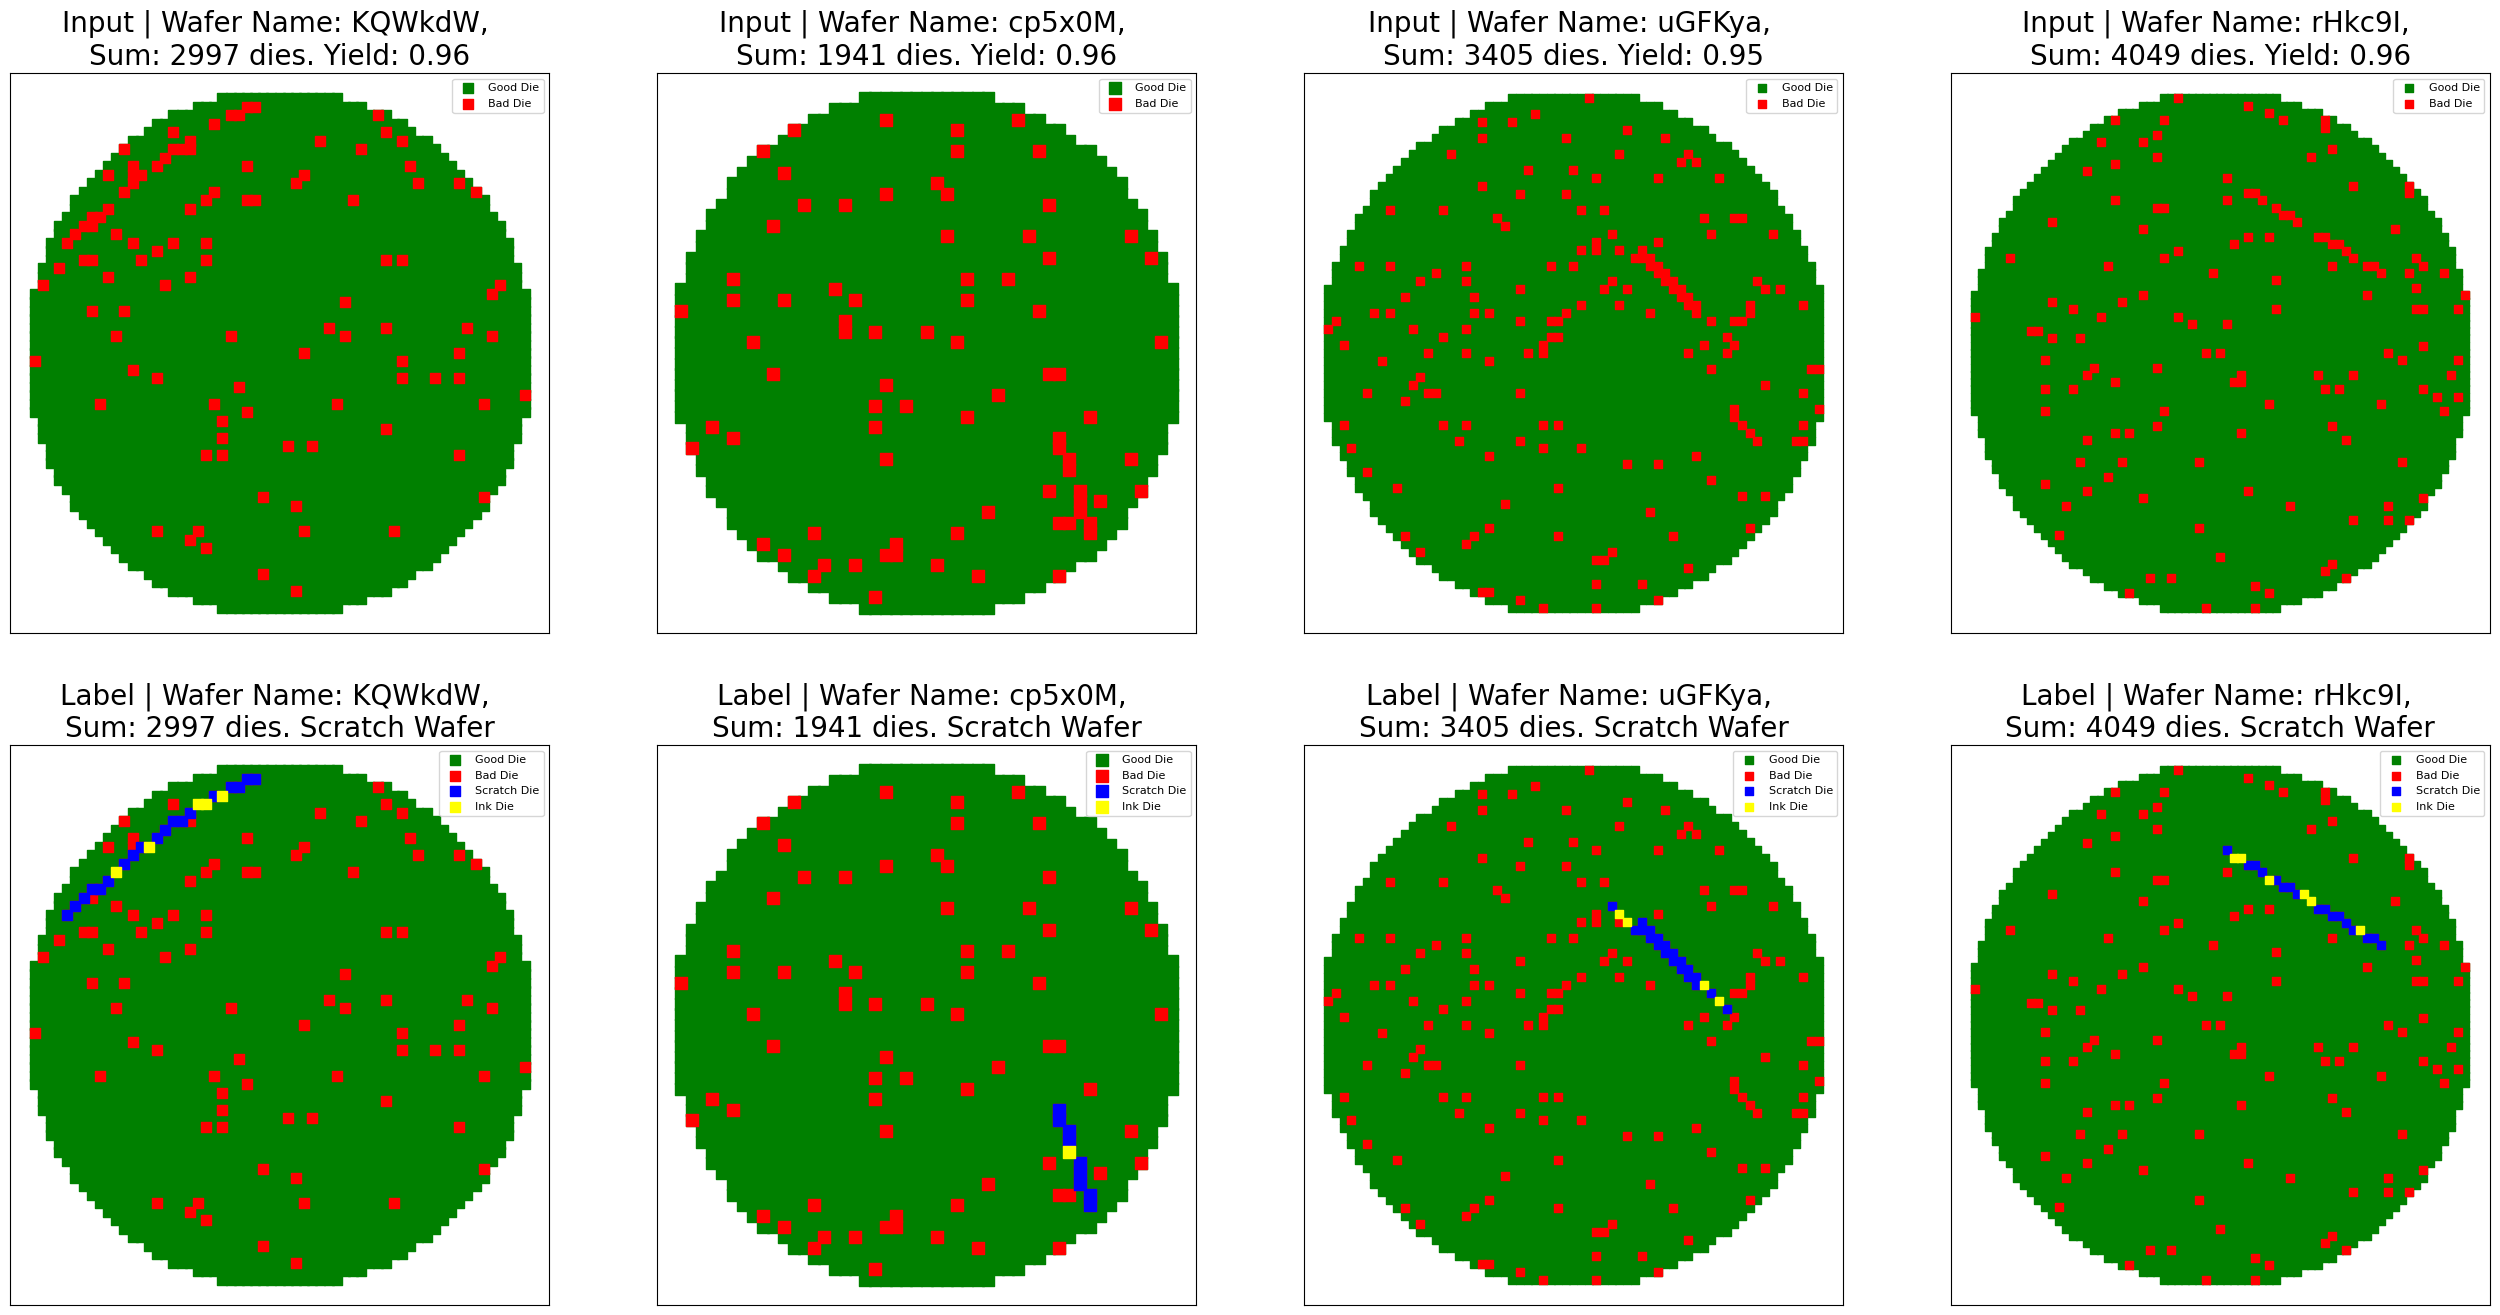

In [6]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

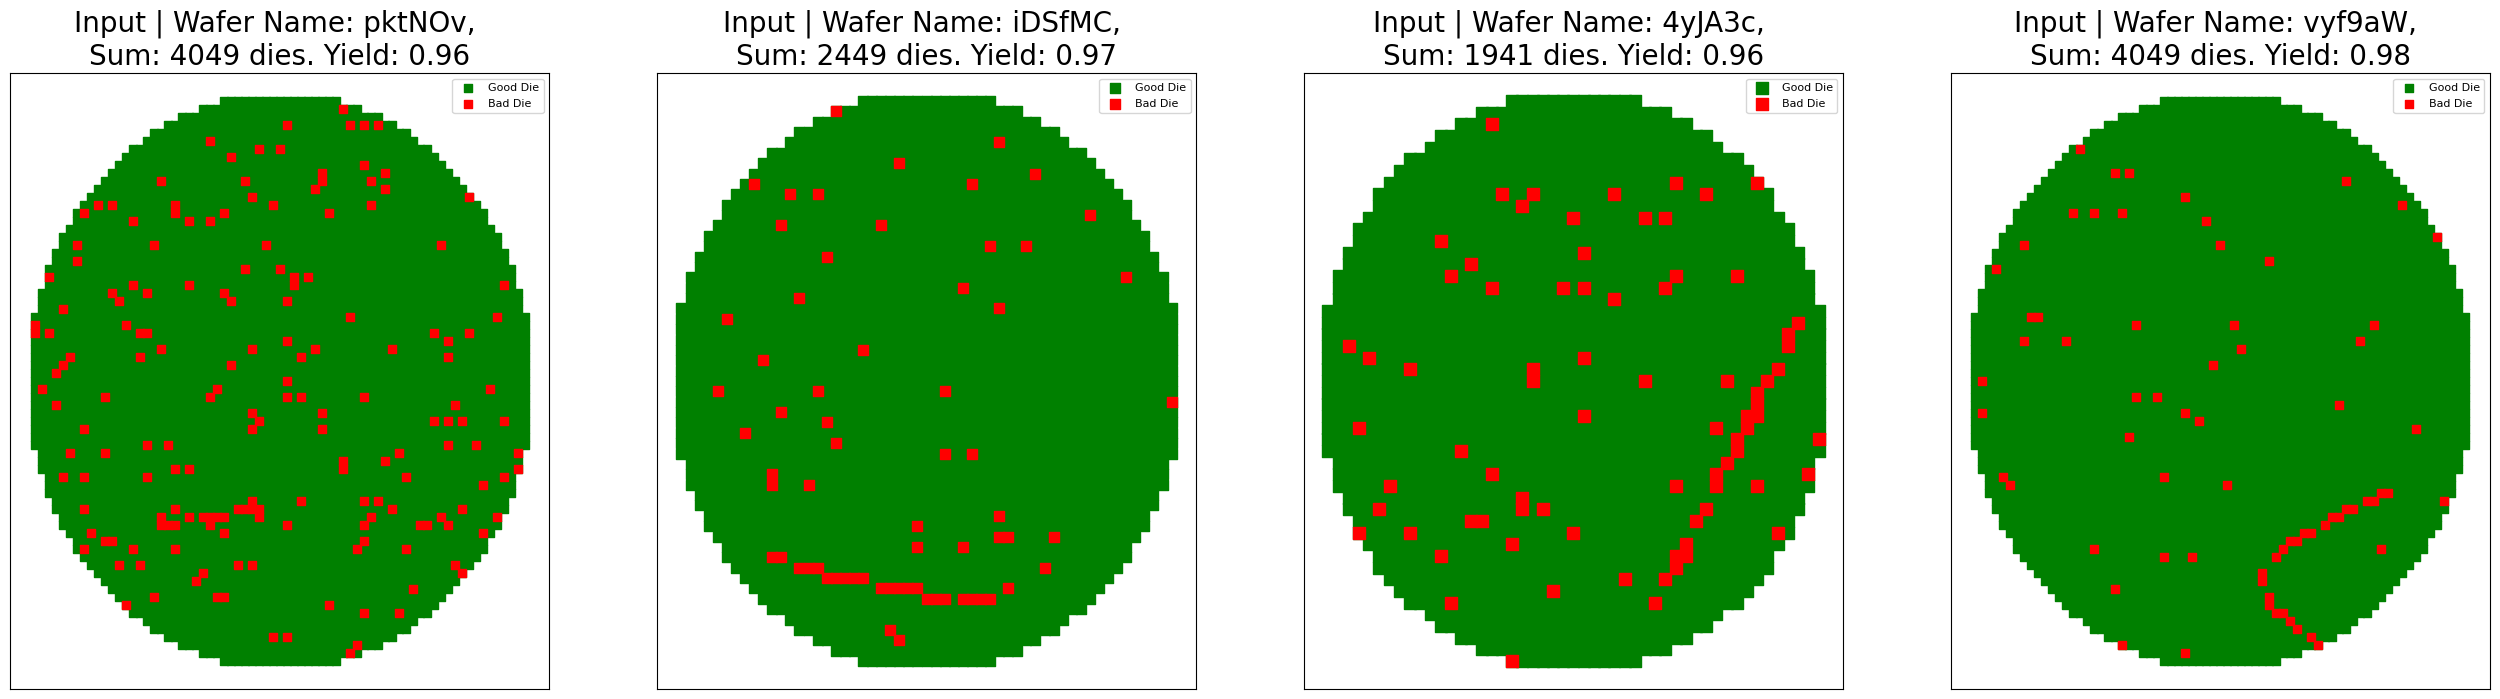

In [7]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

## EDA

The dataset consists of 4,655 wafers in total, with 4,200 wafers in the training set and 455 wafers in the test set.

There are 6 sizes of wafers from the smallest 1005 to the largest 4049, some types of wafer are more prone to scrathes (type A with 0.49% of scrached dies vs type f with 1.14% of scrached dies)

Both sets have no missing values or duplicates. In the training set, there are 10,036,478 good dies (96.28%) and 378,922 bad dies (3.72%), while the test set contains 1,038,877 good dies (92.07%) and 89,458 bad dies (7.93%).

The training set also includes 4,073 wafers with scratch dies, with 80,319 dies (0.77%) classified as scratch dies. 

The yield rate (percentage of good dies) in the training set averages 96.28%, with values ranging from 90.02% to 98.91%. 

The median yield is 96.30%. The test set shows a slightly lower average yield of 91.97%, with a wider range from 28.71% to 99.07%, suggesting more variability in the test set. 

The distribution graphs confirm these observations, showing that in the first dataset, 96.24% are good dies (non-ink), 2.99% are regular bad dies,
0.65% are scratch dies, and 0.12% are ink dies, while the second dataset has 92.07% good dies and 7.93% bad dies.

1229 wafers have less than 3 scratch dies - wich might indicate that there is an error with the lables ot the definition of a scratch.

There is a tendency of scracthed dies to be in a paricular area of the the die - from the heat map, this might be a sign of a machine out of tune. 

# Actions

* Added a WaferType feature to represent the differnt groups.

* Set therhold for low yield at 0.8 ~92.3% of the test wafer is above this critiria, and also from some reading it looks like 80 - 90 is the indusrty standrd - defends on the type of wafer.  (wafer with less then 0.8 yield will be predicted as false by the model, but will be used in the train data)

* Adressing the imblance of the problem - by trying to upsample the minority class. 

# Metrics

Precision = how many of the predicted scratches were actually correct

Recall = how many of the actual scratches we managed to find

F1 Score = the balance between precision and recall, calculated as:

F1 Score = 2 × (Precision × Recall / Precision + Recall)


F1 is especially helpful when our data is imbalanced—meaning there are far fewer scratches than non-scratches. In such cases, accuracy alone isn’t enough, and F1 helps us measure how well the model handles the rare but important cases.




In [8]:
# How many wafers are there in the train and test set?
print(f'Train set: {len(df_wafers["WaferName"].unique())} wafers')
print(f'Test set: {len(df_wafers_test["WaferName"].unique())} wafers')
# How many dies are there in the train and test set?
print(f'Total: {len(df_wafers["WaferName"].unique()) + len(df_wafers_test["WaferName"].unique())} wafers')

Train set: 4200 wafers
Test set: 455 wafers
Total: 4655 wafers


In [9]:
# Are there any missing values in the train and test set?
print(f'Train set: {df_wafers.isnull().sum().sum()} missing values')   
print(f'Test set: {df_wafers_test.isnull().sum().sum()} missing values')

Train set: 0 missing values
Test set: 0 missing values


In [10]:
# In how many unique wafers are the scratch dies located?
print(f'Train set: {df_wafers[df_wafers["IsScratchDie"] == True]["WaferName"].nunique()} wafers with scratch dies')


Train set: 4073 wafers with scratch dies


In [11]:
# Are there any duplicates in the train and test set?
print(f'Train set: {df_wafers.duplicated().sum()} duplicates')  
print(f'Test set: {df_wafers_test.duplicated().sum()} duplicates')
print("*"*35)
# How many good and bad dies are there in the train and test set?
print(f'Train set: {df_wafers["IsGoodDie"].value_counts()}')
print(f'Test set: {df_wafers_test["IsGoodDie"].value_counts()}')
print("*"*35)
# How many scratch and non-scratch dies are there in the train and test set?
print(f'Train set: {df_wafers["IsScratchDie"].value_counts()}')


Train set: 0 duplicates
Test set: 0 duplicates
***********************************
Train set: IsGoodDie
True     10036478
False      378922
Name: count, dtype: int64
Test set: IsGoodDie
True     1038877
False      89458
Name: count, dtype: int64
***********************************
Train set: IsScratchDie
False    10335081
True        80319
Name: count, dtype: int64


In [ ]:
# what is the distribution of the amount of total dies in each wafer in the train set?
df_wafers.groupby('WaferName').size().value_counts()


1941    600
1005    600
2449    600
2997    600
4049    600
1513    600
3405    600
Name: count, dtype: int64

In [ ]:
# what is the distribution of the amount of total dies in each wafer in the test set?
df_wafers_test.groupby('WaferName').size().value_counts()

3405    65
2997    65
4049    65
1005    65
2449    65
1513    65
1941    65
Name: count, dtype: int64

In [14]:
# lets create a new column with and give each size of wafer group a label by the amount of dies from a - f - with a bieng the largest wafer
def label_wafer_size(wafer_size):
    """
    Labels wafers based on their size into categories a-f
    a: largest wafers (>4000 dies)
    b: 3000-4000 dies
    c: 2400-3000 dies
    d: 1900-2400 dies
    e: 1500-1900 dies
    f: <1500 dies
    """
    if wafer_size > 4000:
        return 'A'
    elif wafer_size > 3000:
        return 'B'
    elif wafer_size > 2400:
        return 'C'
    elif wafer_size > 1900:
        return 'D'
    elif wafer_size > 1500:
        return 'E'
    else:
        return 'F'


In [ ]:
# Now we can apply this function to the train and test set
train_sizes = df_wafers.groupby('WaferName').size().apply(label_wafer_size)
test_sizes = df_wafers_test.groupby('WaferName').size().apply(label_wafer_size)\

# and add the labels to the original dataframes
df_wafers['WaferType'] = df_wafers['WaferName'].map(train_sizes)
df_wafers_test['WaferType'] = df_wafers_test['WaferName'].map(test_sizes)

df_wafers
df_wafers_test

WaferName  DieX  DieY  IsGoodDie WaferType
0          mZa9ls     0    23       True         C
1          mZa9ls     0    24       True         C
2          mZa9ls     0    25       True         C
3          mZa9ls     0    26       True         C
4          mZa9ls     0    27       True         C
...           ...   ...   ...        ...       ...
1128330    ghtNu6    42    23       True         E
1128331    ghtNu6    42    24       True         E
1128332    ghtNu6    42    25       True         E
1128333    ghtNu6    42    26       True         E
1128334    ghtNu6    42    27       True         E

[1128335 rows x 5 columns]

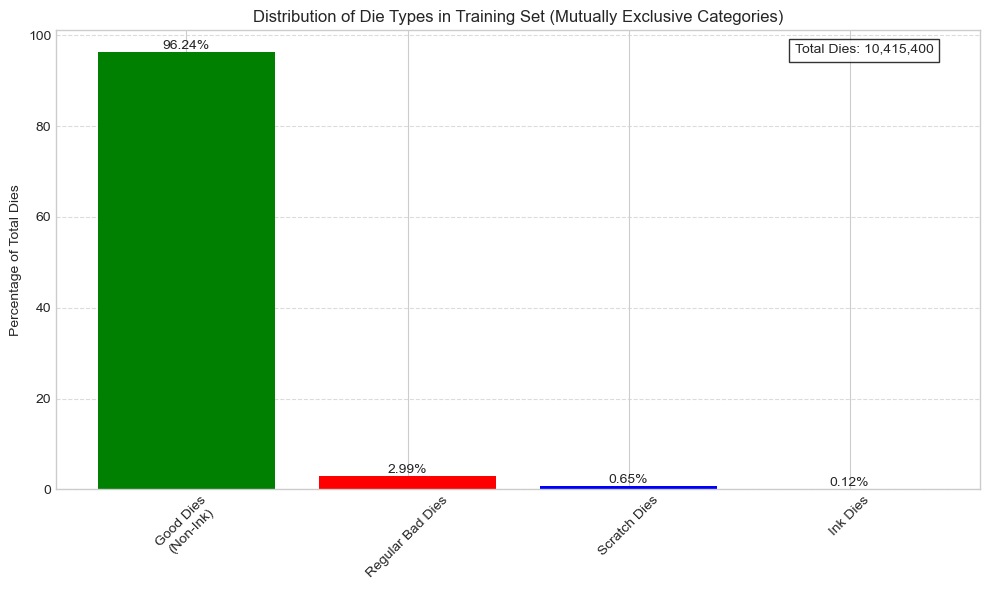

In [84]:
# PLot dies in the training set
total_dies = len(df_wafers)
good_dies_without_ink = ((df_wafers['IsGoodDie'] == True) & (df_wafers['IsScratchDie'] == False)).sum()
regular_bad_dies = ((df_wafers['IsGoodDie'] == False) & (df_wafers['IsScratchDie'] == False)).sum()
scratch_dies = ((df_wafers['IsGoodDie'] == False) & (df_wafers['IsScratchDie'] == True)).sum()
ink_dies = ((df_wafers['IsGoodDie'] == True) & (df_wafers['IsScratchDie'] == True)).sum()

# Create data for plotting
categories = ['Good Dies\n(Non-Ink)', 'Regular Bad Dies', 'Scratch Dies', 'Ink Dies']
values = [good_dies_without_ink, regular_bad_dies, scratch_dies, ink_dies]
percentages = [v/total_dies*100 for v in values]
colors = ['green', 'red', 'blue', 'yellow']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Customize the plot
plt.title('Distribution of Die Types in Training Set (Mutually Exclusive Categories)')
plt.ylabel('Percentage of Total Dies')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add total count as text
plt.text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
         transform=plt.gca().transAxes, 
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

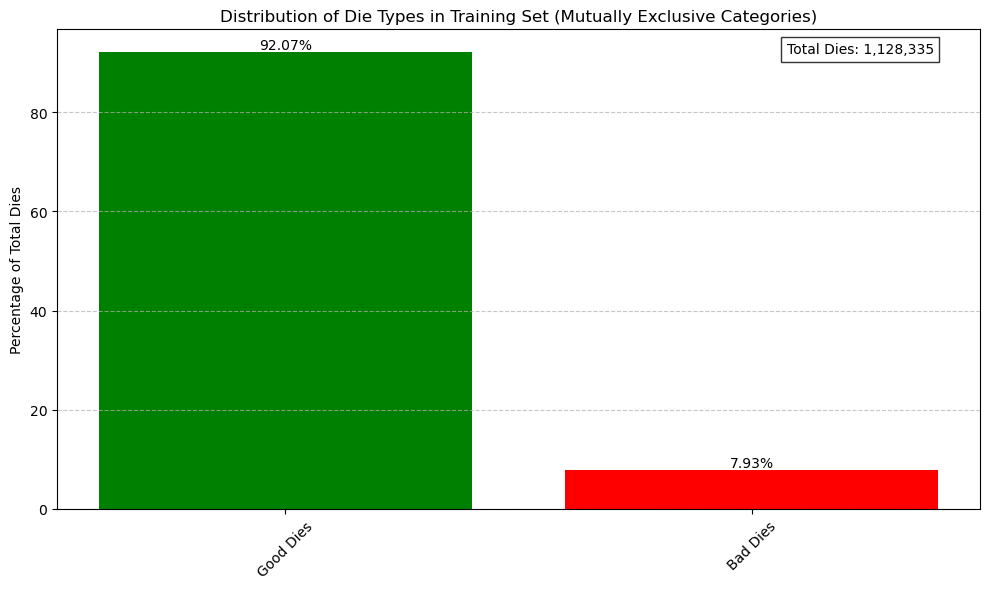

In [17]:
# Calculate all categories with corrected counting
total_dies = len(df_wafers_test)
good_dies_without_ink = ((df_wafers_test['IsGoodDie'] == True)).sum()
regular_bad_dies = ((df_wafers_test['IsGoodDie'] == False)).sum()


# Create data for plotting
categories = ['Good Dies', 'Bad Dies']
values = [good_dies_without_ink, regular_bad_dies]
percentages = [v/total_dies*100 for v in values]
colors = ['green', 'red', 'blue', 'yellow']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Customize the plot
plt.title('Distribution of Die Types in Training Set (Mutually Exclusive Categories)')
plt.ylabel('Percentage of Total Dies')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add total count as text
plt.text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
         transform=plt.gca().transAxes, 
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Training Set Distributions:


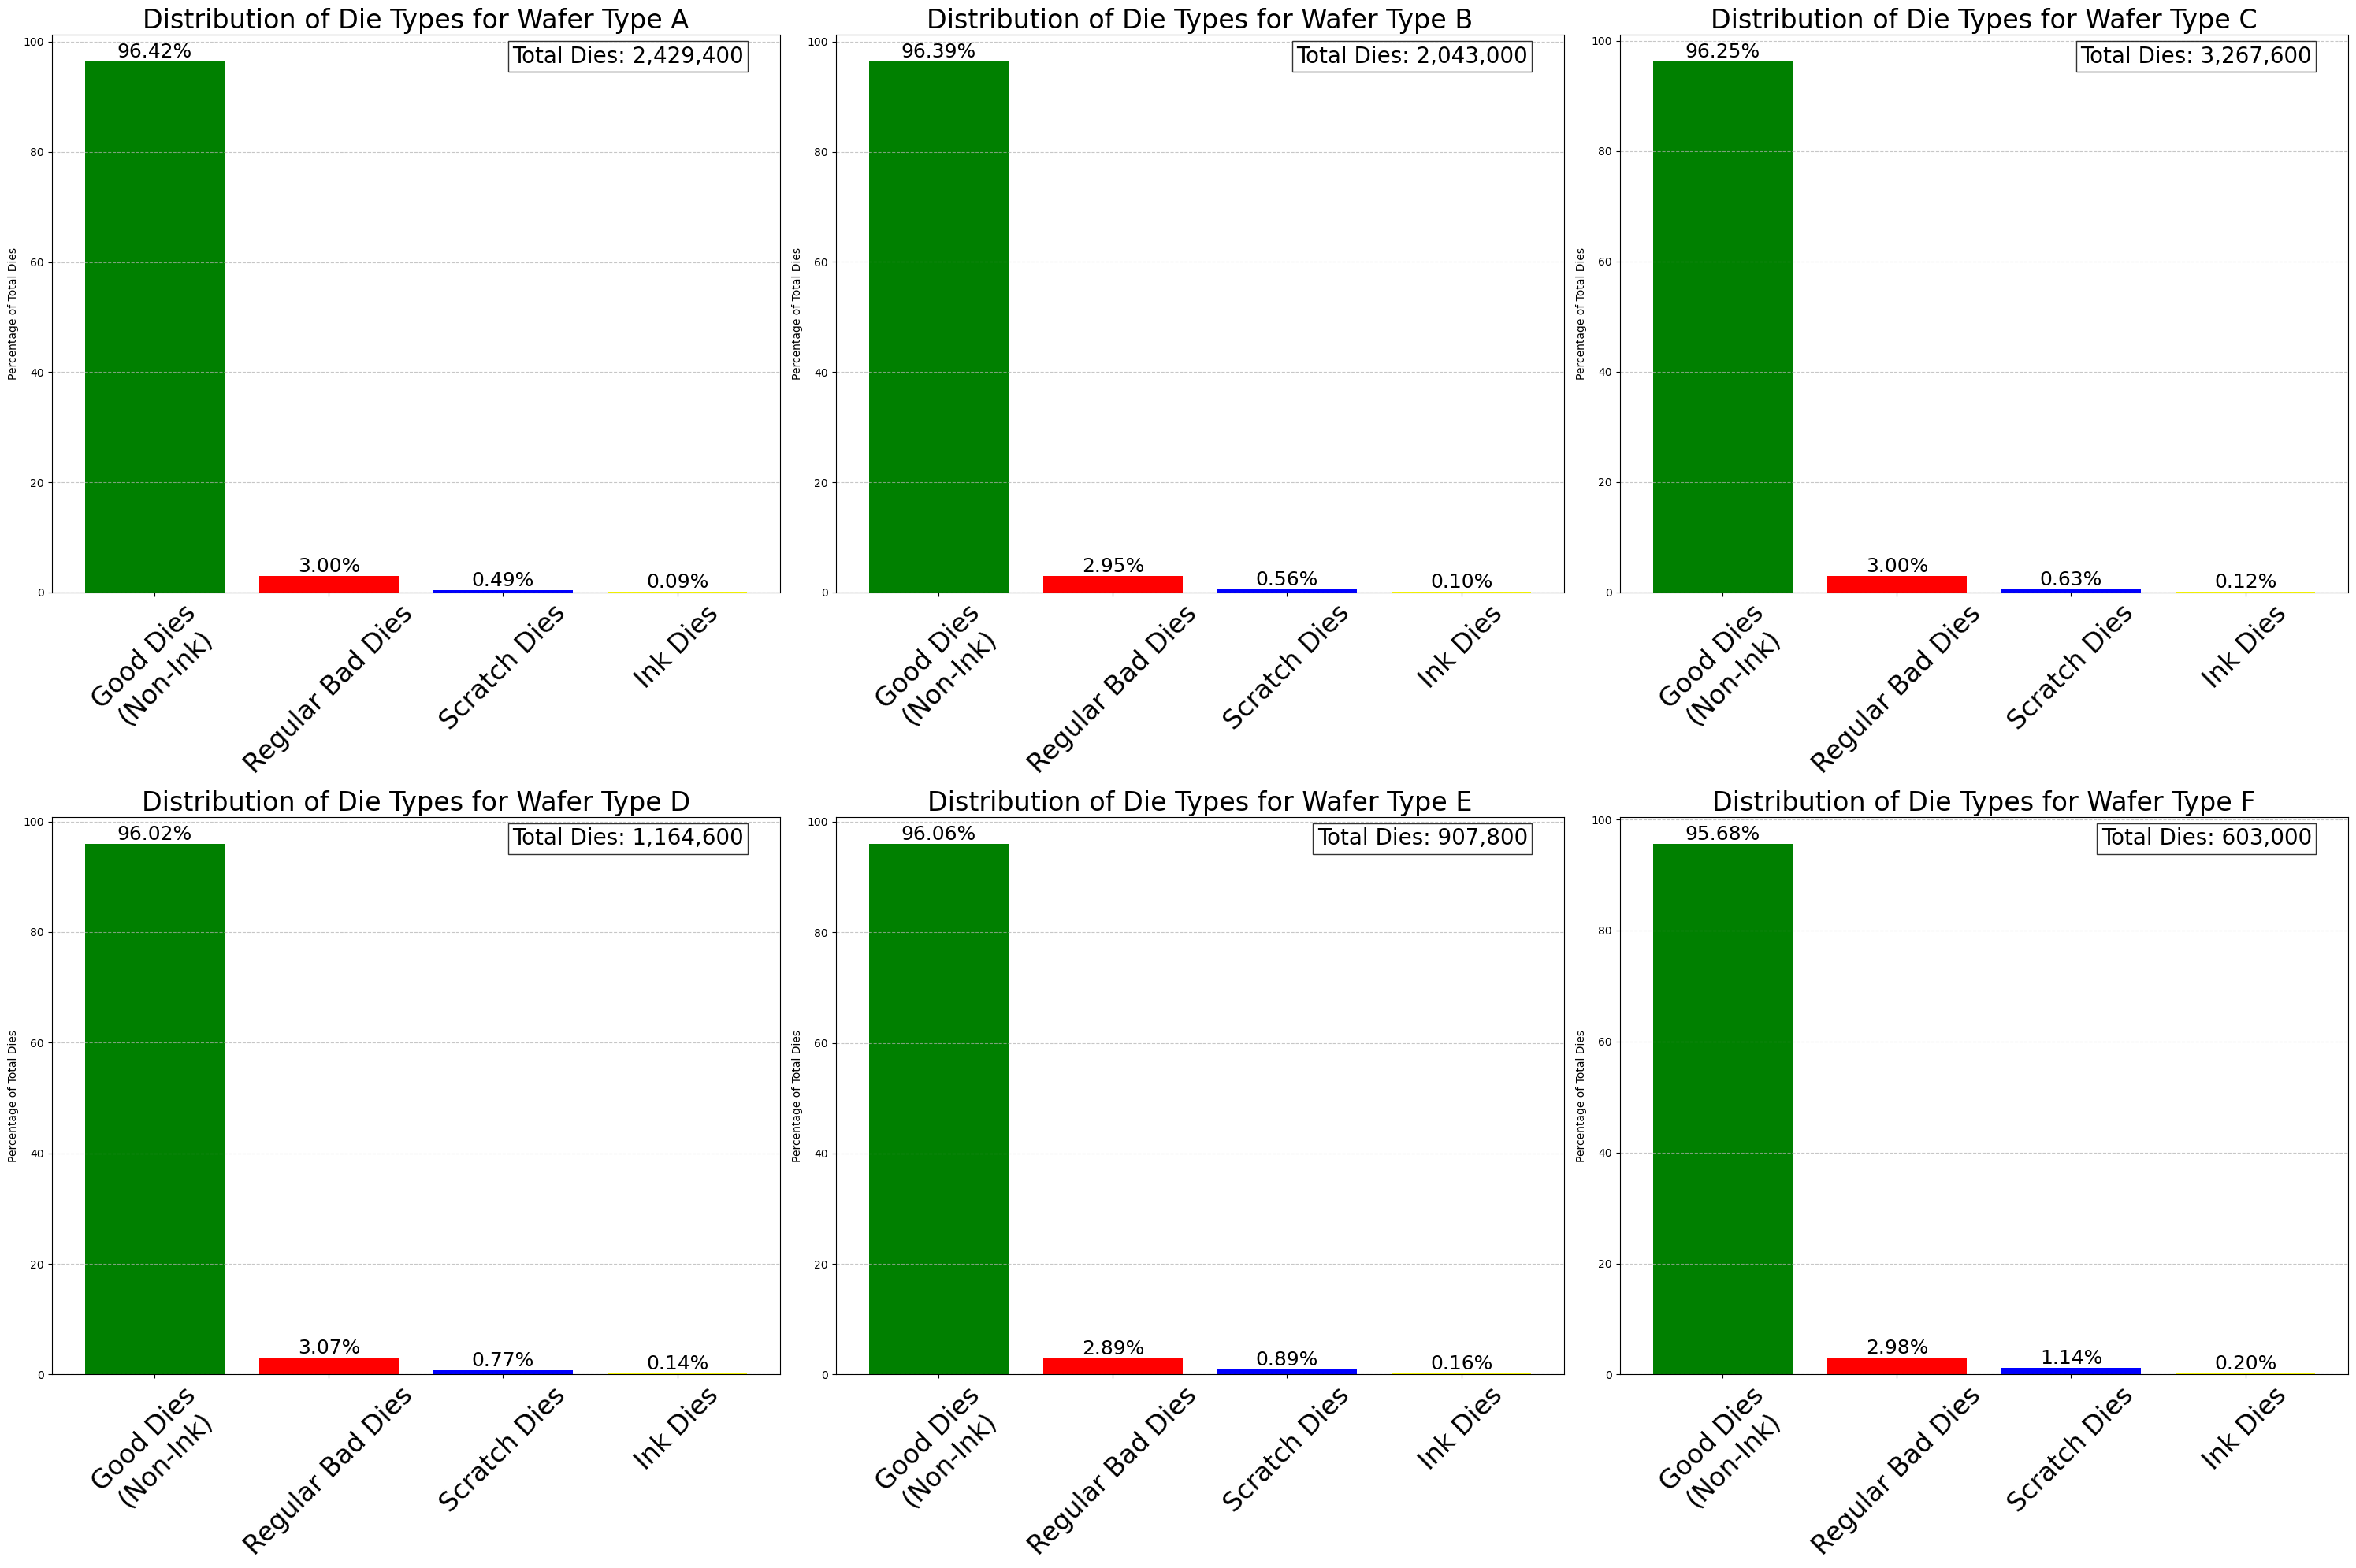

In [18]:
def plot_wafer_type_distributions_grid(df, wafer_types):
    """
    Plot the distribution of good, bad, scratch and ink dies for all wafer types in a 3x2 grid.
    
    :param df: DataFrame, The dataframe containing the wafer data
    :param wafer_types: list, List of wafer types to plot
    """
    # Create figure with 3x2 subplots
    fig, axes = plt.subplots(2, 3, figsize=(30, 20))
    axes = axes.ravel()  # Flatten axes array for easier indexing
    
    for idx, wafer_type in enumerate(wafer_types):
        # Filter the DataFrame for the specified wafer type
        df_filtered = df[df['WaferType'] == wafer_type]
        
        # Calculate all categories with corrected counting
        total_dies = len(df_filtered)
        good_dies_without_ink = ((df_filtered['IsGoodDie'] == True) & 
                                (df_filtered['IsScratchDie'] == False)).sum()
        regular_bad_dies = ((df_filtered['IsGoodDie'] == False) & 
                           (df_filtered['IsScratchDie'] == False)).sum()
        scratch_dies = ((df_filtered['IsGoodDie'] == False) & 
                       (df_filtered['IsScratchDie'] == True)).sum()
        ink_dies = ((df_filtered['IsGoodDie'] == True) & 
                    (df_filtered['IsScratchDie'] == True)).sum()
        
        # Create data for plotting
        categories = ['Good Dies\n(Non-Ink)', 'Regular Bad Dies', 'Scratch Dies', 'Ink Dies']
        values = [good_dies_without_ink, regular_bad_dies, scratch_dies, ink_dies]
        percentages = [v/total_dies*100 for v in values]
        colors = ['green', 'red', 'blue', 'yellow']
        
        # Create bar plot in the corresponding subplot
        bars = axes[idx].bar(categories, percentages, color=colors)

        # Add percentage labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', ha='center', va='bottom',fontsize=18)
                     
        # Customize the subplot
        axes[idx].set_title(f'Distribution of Die Types for Wafer Type {wafer_type}',fontsize=24)
        axes[idx].set_ylabel('Percentage of Total Dies')
        axes[idx].set_xticks(range(len(categories)))
        axes[idx].set_xticklabels(categories, rotation=45,fontsize=24)
        axes[idx].grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # Add total count as text
        axes[idx].text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
                 transform=axes[idx].transAxes, 
                 ha='right',
                 bbox=dict(facecolor='white', alpha=0.8),fontsize=20)
    
    # Remove any empty subplots
    for idx in range(len(wafer_types), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

# Plot distributions for training set
print("Training Set Distributions:")
wafer_types = sorted(df_wafers['WaferType'].unique())  # Sort wafer types alphabetically
plot_wafer_type_distributions_grid(df_wafers, wafer_types)



Test Set Distributions:


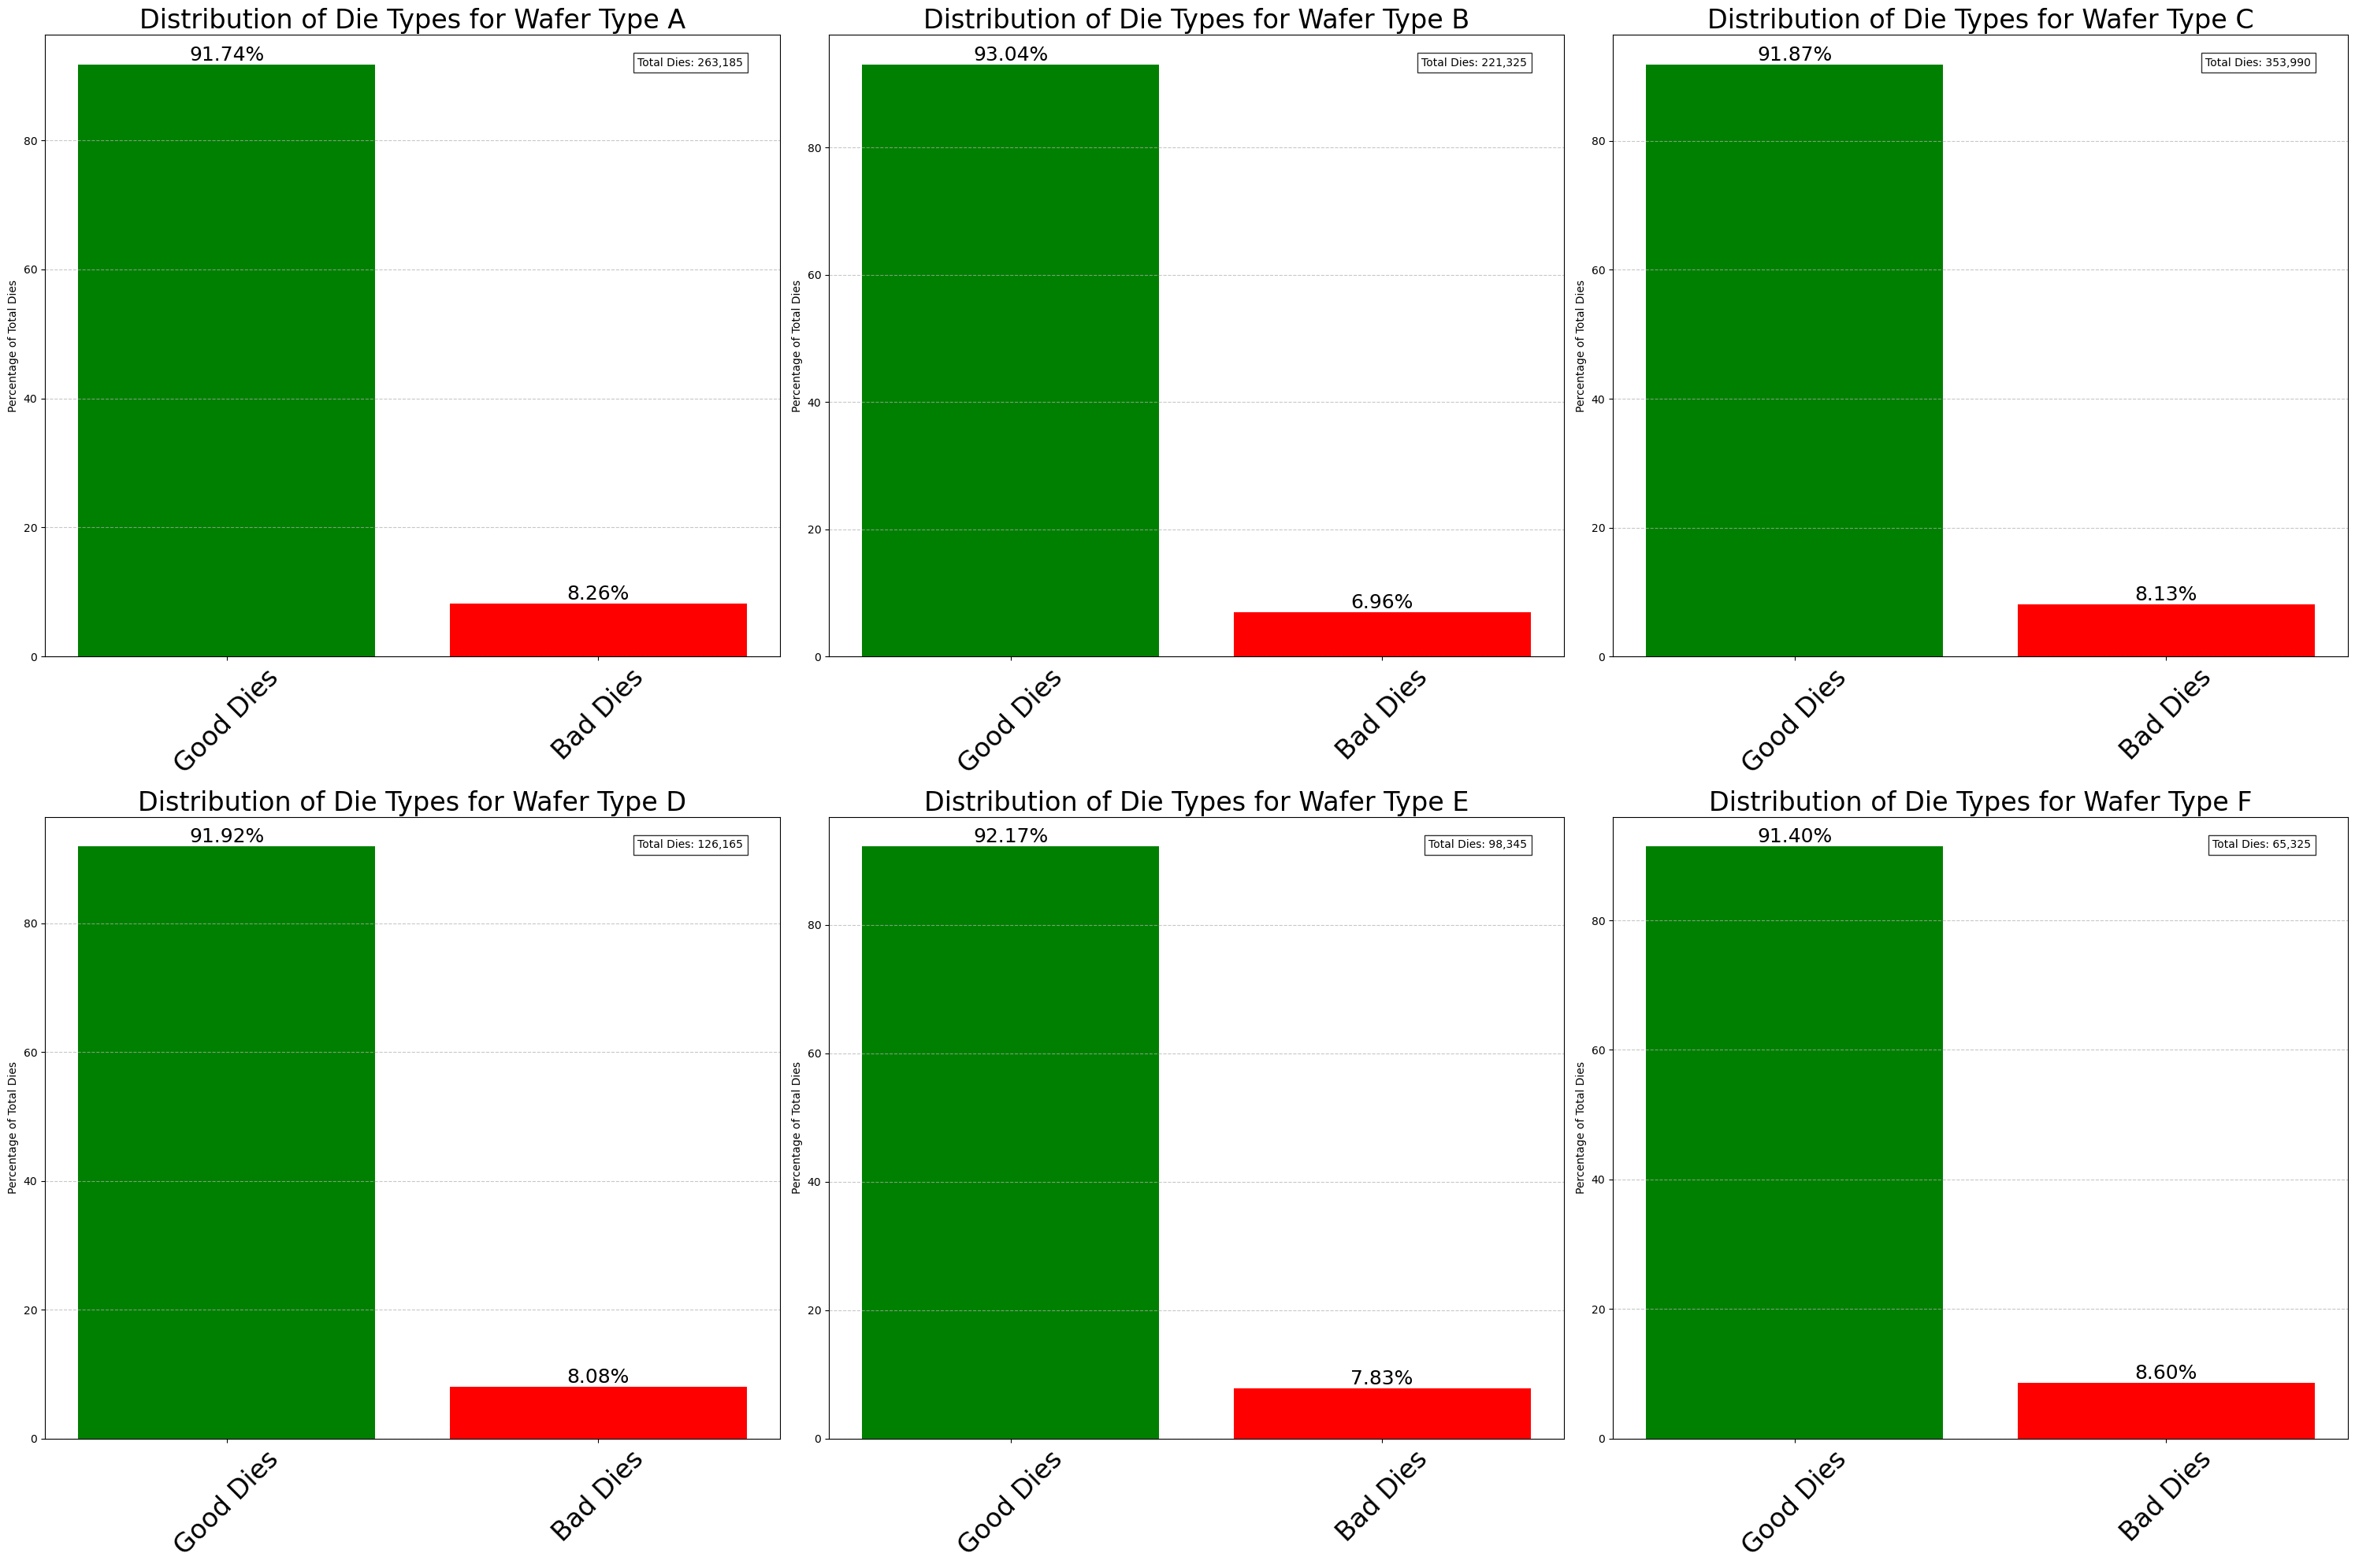

In [19]:
def plot_wafer_type_distributions_grid_test(df, wafer_types):
    """
    Plot the distribution of good and bad dies for all wafer types in a 3x2 grid for test data.
    
    :param df: DataFrame, The dataframe containing the wafer data
    :param wafer_types: list, List of wafer types to plot
    """
    # Create figure with 3x2 subplots
    fig, axes = plt.subplots(2, 3, figsize=(30, 20))
    axes = axes.ravel()  # Flatten axes array for easier indexing
    
    for idx, wafer_type in enumerate(wafer_types):
        # Filter the DataFrame for the specified wafer type
        df_filtered = df[df['WaferType'] == wafer_type]
        
        # Calculate categories
        total_dies = len(df_filtered)
        good_dies = (df_filtered['IsGoodDie'] == True).sum()
        bad_dies = (df_filtered['IsGoodDie'] == False).sum()
        
        # Create data for plotting
        categories = ['Good Dies', 'Bad Dies']
        values = [good_dies, bad_dies]
        percentages = [v/total_dies*100 for v in values]
        colors = ['green', 'red']
        
        # Create bar plot in the corresponding subplot
        bars = axes[idx].bar(categories, percentages, color=colors)

        # Add percentage labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', ha='center', va='bottom', fontsize=18)
                     
        # Customize the subplot
        axes[idx].set_title(f'Distribution of Die Types for Wafer Type {wafer_type}', fontsize=24)
        axes[idx].set_ylabel('Percentage of Total Dies')
        axes[idx].set_xticks(range(len(categories)))
        axes[idx].set_xticklabels(categories, rotation=45, fontsize=24)
        axes[idx].grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # Add total count as text
        axes[idx].text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
                 transform=axes[idx].transAxes, 
                 ha='right',
                 bbox=dict(facecolor='white', alpha=0.8))
    
    # Remove any empty subplots
    for idx in range(len(wafer_types), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

# Plot distributions for test set
print("Test Set Distributions:")
test_wafer_types = sorted(df_wafers_test['WaferType'].unique())  # Sort wafer types alphabetically
plot_wafer_type_distributions_grid_test(df_wafers_test, test_wafer_types)

In [20]:
# whats the yield of the wafers in the train set?
df_wafers.groupby('WaferName')['IsGoodDie'].mean().describe()

count    4200.000000
mean        0.962850
std         0.011008
min         0.900198
25%         0.955084
50%         0.962963
75%         0.971166
max         0.989055
Name: IsGoodDie, dtype: float64

In [21]:
# whats the yield of the wafers in the test set?
df_wafers_test.groupby('WaferName')['IsGoodDie'].mean().describe()


count    455.000000
mean       0.919741
std        0.122994
min        0.287056
25%        0.939255
50%        0.959984
75%        0.971664
max        0.990657
Name: IsGoodDie, dtype: float64

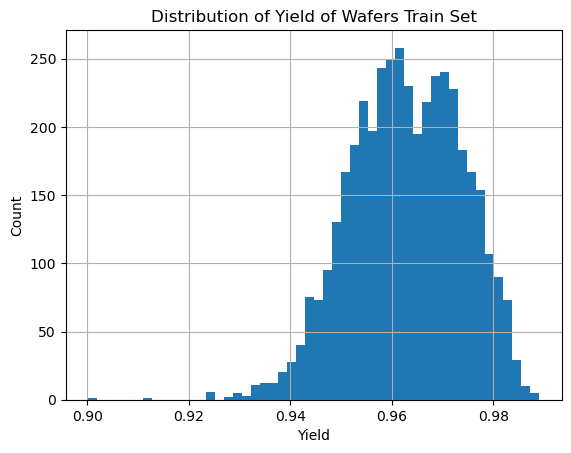

In [22]:
# lets see the distribution of the yield
df_wafers.groupby('WaferName')['IsGoodDie'].mean().hist(bins=50)
plt.title('Distribution of Yield of Wafers Train Set')
plt.xlabel('Yield')
plt.ylabel('Count')
plt.show()

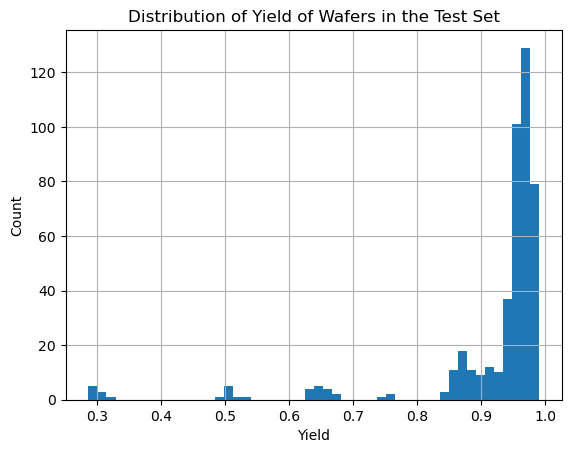

Train set: 4200 wafers with yield > 0.8
Test set: 420 wafers with yield > 0.8


In [23]:
# lets see the distribution of the yield
df_wafers_test.groupby('WaferName')['IsGoodDie'].mean().hist(bins=50)
plt.title('Distribution of Yield of Wafers in the Test Set')
plt.xlabel('Yield')
plt.ylabel('Count')
plt.show()


# how many wafers have yield > 0.8
print(f'Train set: {df_wafers[df_wafers.groupby("WaferName")["IsGoodDie"].transform("mean") > 0.8]["WaferName"].nunique()} wafers with yield > 0.8')
print(f'Test set: {df_wafers_test[df_wafers_test.groupby("WaferName")["IsGoodDie"].transform("mean") > 0.8]["WaferName"].nunique()} wafers with yield > 0.8')


Looks like the the two distributions are very differnt -The 0.8 yield threshold is set because most wafers have yields above this value, as shown in the histogram. Wafers below 0.8 are rare and likely considered low quality. Using only wafers with yield > 0.8 for testing aligns with the customer fear to find randomly generated scratches and perform unnecessary ink. 

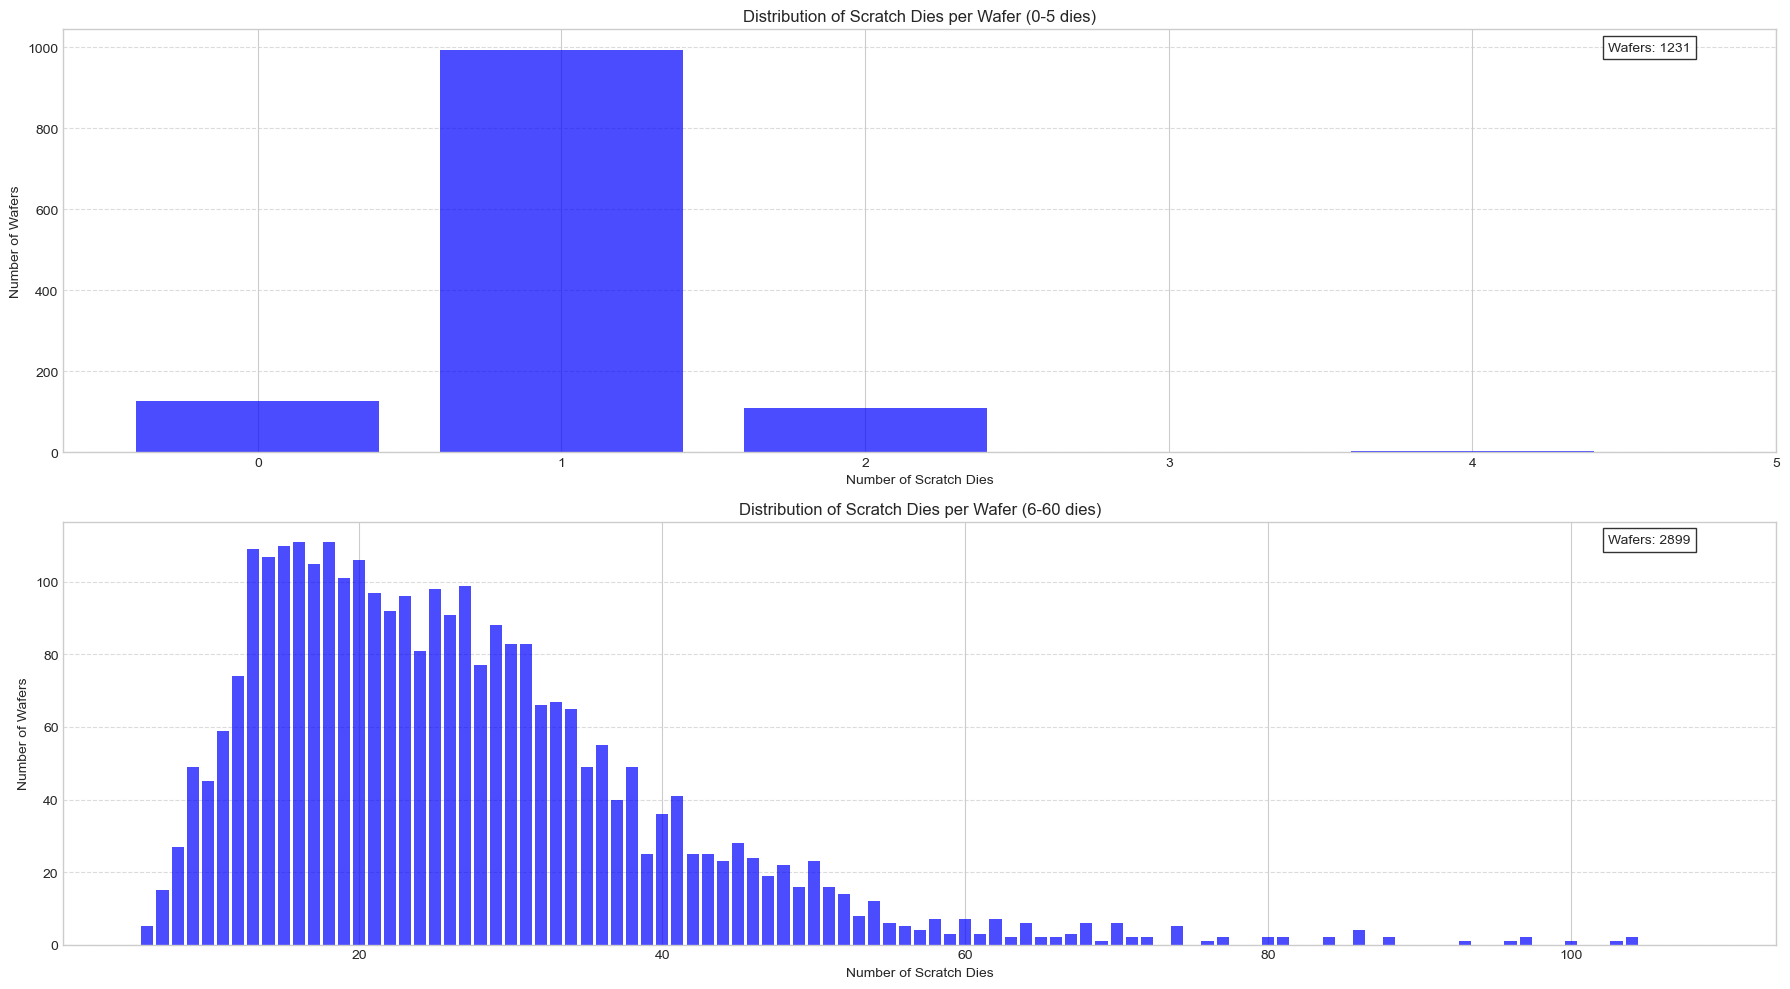


Scratch dies per wafer statistics:
       0-5 scratch dies  6-110 scratch dies
Count           1231.00             2969.00
Mean               0.99               26.64
Std                0.47               13.38
Min                0.00                6.00
25%                1.00               17.00
50%                1.00               24.00
75%                1.00               33.00
Max                5.00              104.00


In [90]:
# Count scratch dies per wafer
scratch_counts = df_wafers.groupby('WaferName')['IsScratchDie'].sum()

# Create figure and axes for 3x1 grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# First histogram (0-5 scratch dies)
ax1.hist(scratch_counts[scratch_counts <= 5], 
         bins=range(6), 
         align='left', 
         rwidth=0.8, 
         color='blue', 
         alpha=0.7)
ax1.set_title('Distribution of Scratch Dies per Wafer (0-5 dies)', fontsize=12)
ax1.set_xlabel('Number of Scratch Dies', fontsize=10)
ax1.set_ylabel('Number of Wafers', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(range(6))

# Second histogram (5-60 scratch dies)
ax2.hist(scratch_counts[(scratch_counts >= 5)],
         bins=range(6, 110,1), 
         align='left', 
         rwidth=0.8, 
         color='blue', 
         alpha=0.7)
ax2.set_title('Distribution of Scratch Dies per Wafer (6-60 dies)', fontsize=12)
ax2.set_xlabel('Number of Scratch Dies', fontsize=10)
ax2.set_ylabel('Number of Wafers', fontsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)


# Add text showing total number of wafers in each range
ax1.text(0.95, 0.95, f'Wafers: {len(scratch_counts[scratch_counts <= 5])}',
         transform=ax1.transAxes, ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

ax2.text(0.95, 0.95, f'Wafers: {len(scratch_counts[(scratch_counts > 5) & (scratch_counts <= 60)])}',
         transform=ax2.transAxes, ha='right',
         bbox=dict(facecolor='white', alpha=0.8))


plt.tight_layout()
plt.show()

# Print statistics for each range
print("\nScratch dies per wafer statistics:")
# Create separate Series for each range
stats_0_5 = scratch_counts[scratch_counts <= 5].describe()
stats_6_110 = scratch_counts[(scratch_counts > 5)].describe()


# Combine into a DataFrame with clear column names
stats_df = pd.DataFrame({
    '0-5 scratch dies': stats_0_5,
    '6-110 scratch dies': stats_6_110,
})

# Round to 2 decimal places for cleaner display
stats_df = stats_df.round(2)

# Rename the index for better clarity
stats_df.index = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Display the DataFrame
print(stats_df)



1231 wafers have what i suspect to be a problem with either the data itself or the definition of what is a scracth.
The data is split into two groups based on scratch die count, and a bit more then a qurter of the wafers fall into the first two: 0–5  scratched dies. Even though some wafers in the 0–5 group may still be slightly damaged, they are kept in the training set because they make up a large, realistic portion of the production. Using them helps the model learn from common cases and generalize better, rather than focusing only on rare, perfect wafers which are the one with 0 scratched die.

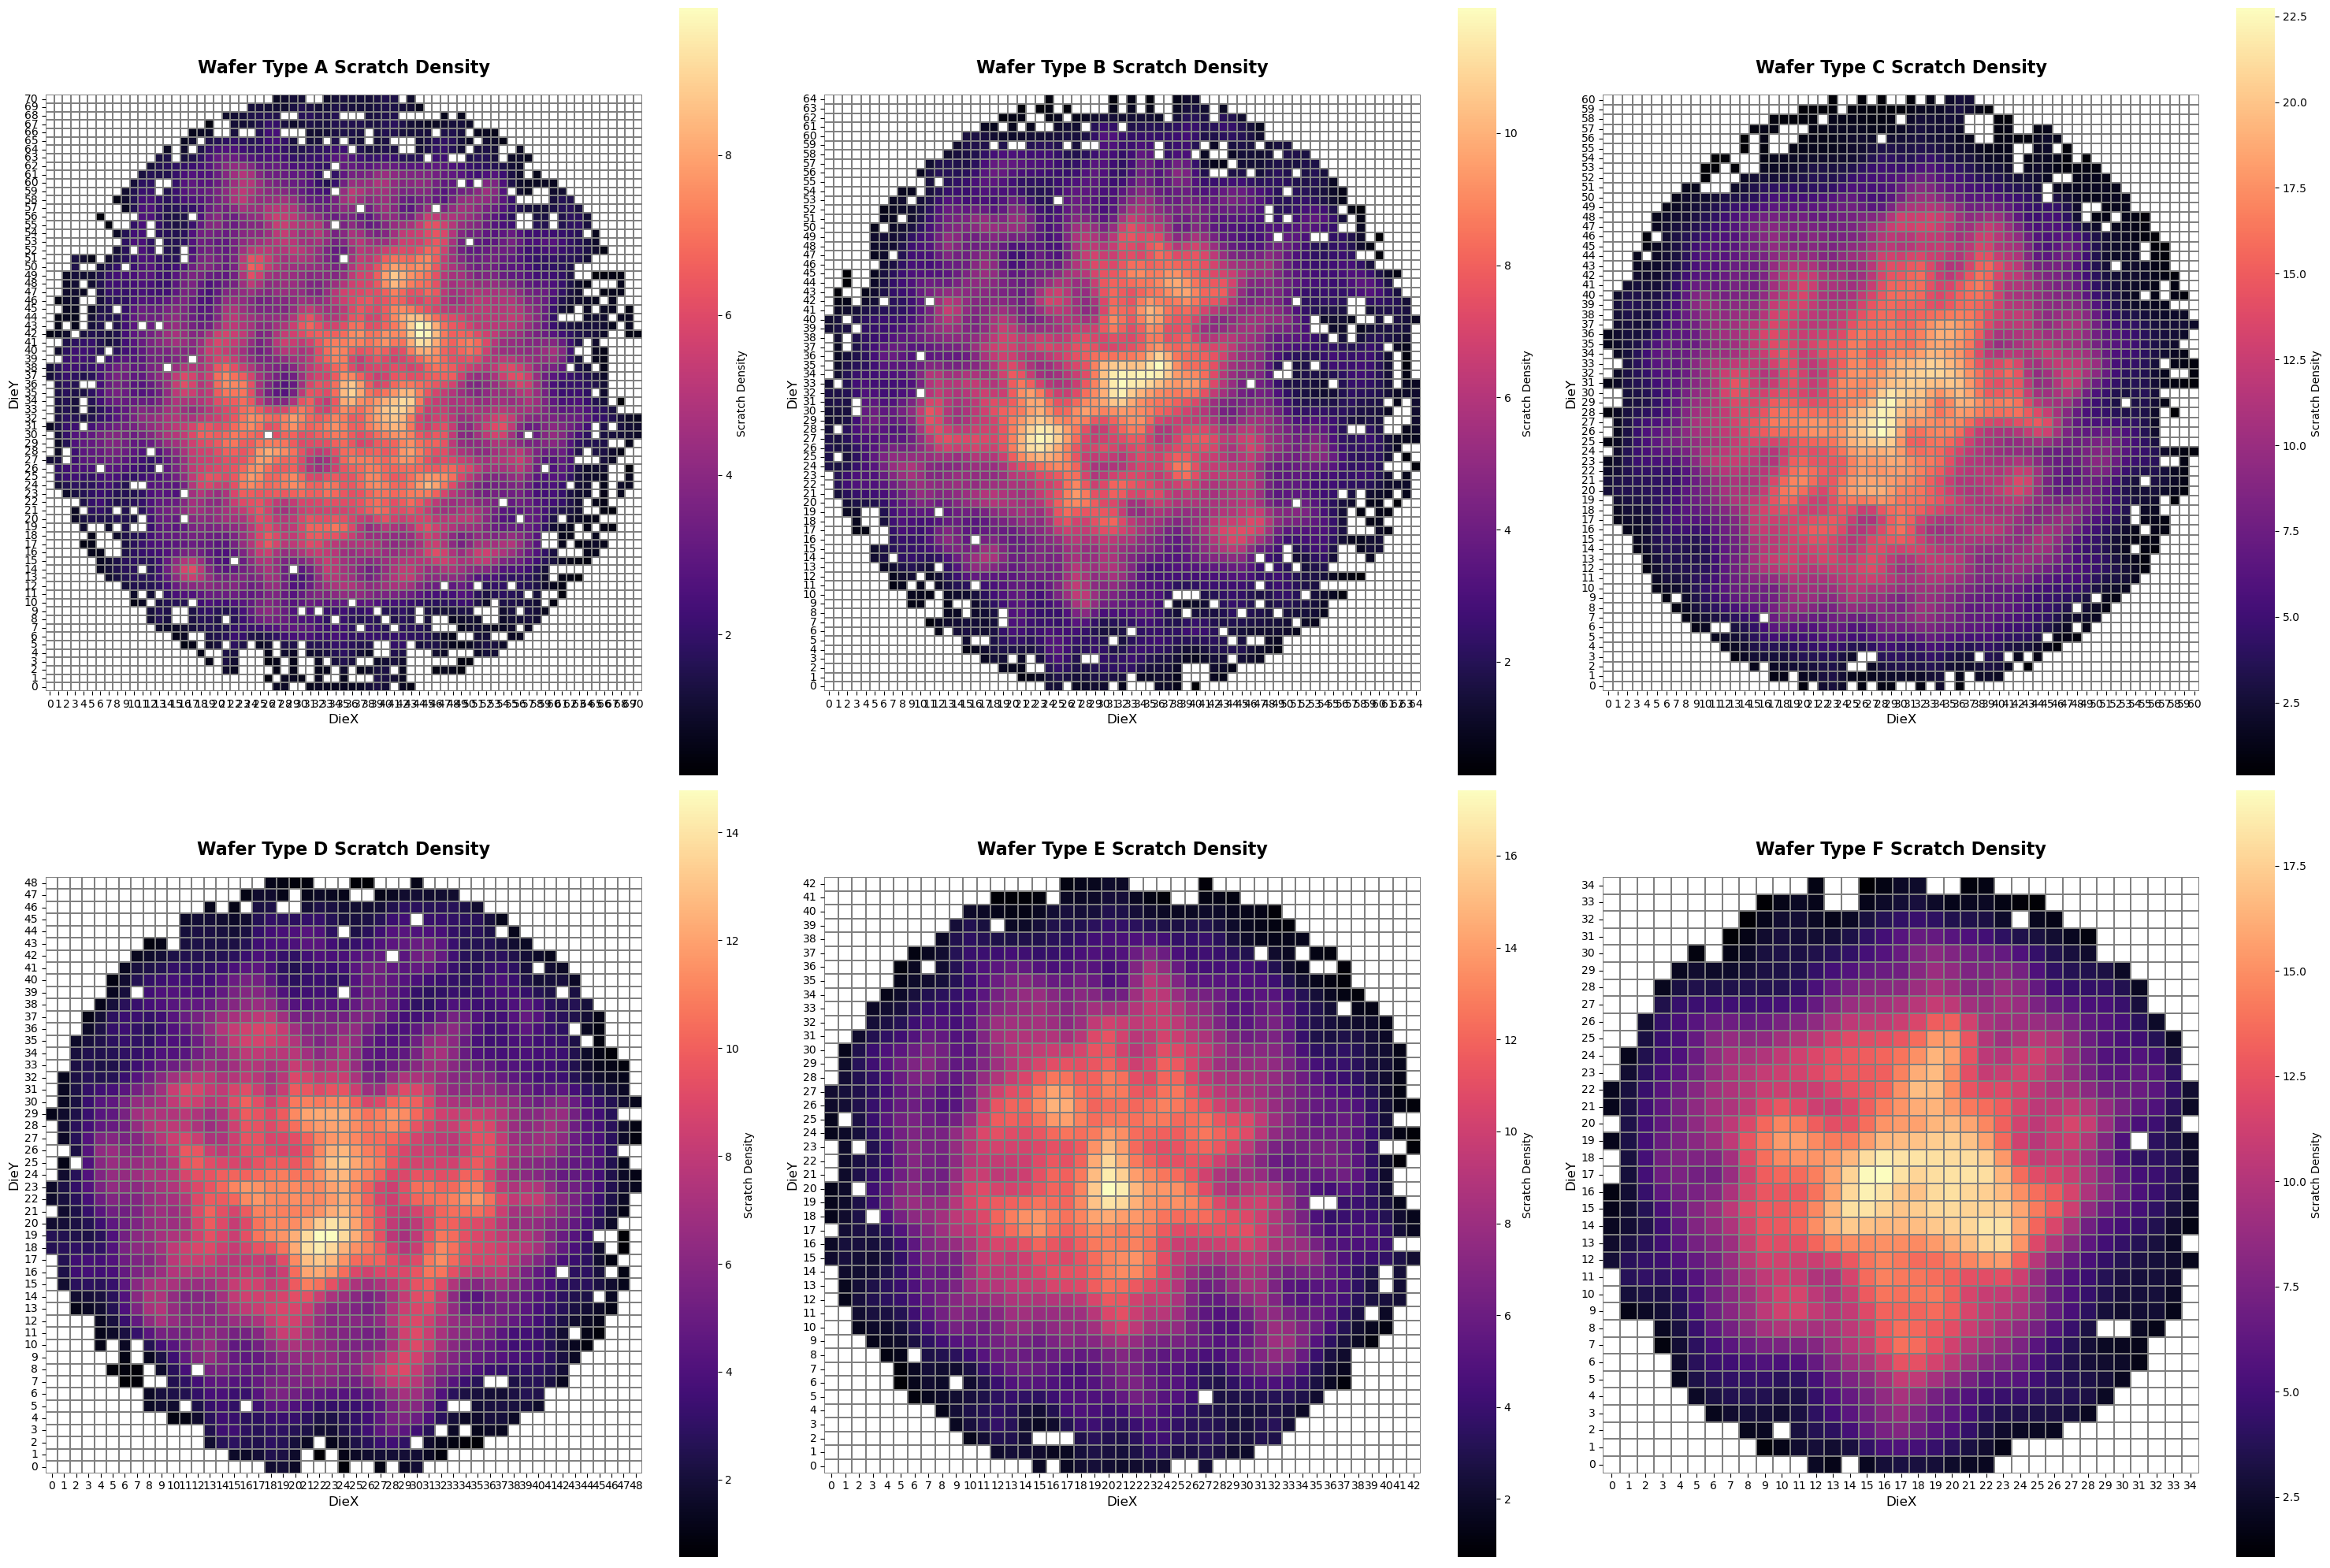


Wafer Type A:
Total Dies: 2,429,400
Scratch Dies: 14,009
Scratch Percentage: 0.58%

Wafer Type B:
Total Dies: 2,043,000
Scratch Dies: 13,568
Scratch Percentage: 0.66%

Wafer Type C:
Total Dies: 3,267,600
Scratch Dies: 24,485
Scratch Percentage: 0.75%

Wafer Type D:
Total Dies: 1,164,600
Scratch Dies: 10,647
Scratch Percentage: 0.91%

Wafer Type E:
Total Dies: 907,800
Scratch Dies: 9,497
Scratch Percentage: 1.05%

Wafer Type F:
Total Dies: 603,000
Scratch Dies: 8,113
Scratch Percentage: 1.35%


In [25]:
# ploting scratch density for each wafer type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.ravel()  # Flatten axes array for easier indexing

# Create custom colormap
original_cmap = sns.color_palette("magma", as_cmap=True)
colors = original_cmap(np.linspace(0, 1, 256))
colors[0] = np.array([1, 1, 1, 1])  # White for zero
custom_cmap = ListedColormap(colors)

# Process each wafer type
for idx, wafer_type in enumerate(['A', 'B', 'C', 'D', 'E', 'F']):
    # Filter data for current wafer type
    wafer_type_data = df_wafers[df_wafers['WaferType'] == wafer_type]
    
    # Count scratches for this wafer type
    scratch_counts = wafer_type_data[wafer_type_data['IsScratchDie']].groupby(['DieX', 'DieY']).size().reset_index(name='ScratchCount')
    heatmap_data = scratch_counts.pivot(index='DieY', columns='DieX', values='ScratchCount').fillna(0)
    
    # Smooth the data
    blurred_data = gaussian_filter(heatmap_data, sigma=1)
    
    # Mask zeros
    mask = heatmap_data == 0
    
    # Create heatmap in corresponding subplot
    sns.heatmap(
        blurred_data,
        cmap=custom_cmap,
        mask=mask,
        linewidths=0.2,
        linecolor='gray',
        square=True,
        cbar_kws={'label': 'Scratch Density'},
        xticklabels=True,
        yticklabels=True,
        ax=axes[idx]
    )
    
    # Customize subplot
    axes[idx].set_title(f'Wafer Type {wafer_type} Scratch Density', fontsize=16, weight='bold', pad=20)
    axes[idx].set_xlabel('DieX', fontsize=12)
    axes[idx].set_ylabel('DieY', fontsize=12)
    axes[idx].tick_params(rotation=0)
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

# Print statistics for each wafer type
for wafer_type in ['A', 'B', 'C', 'D', 'E', 'F']:
    wafer_type_data = df_wafers[df_wafers['WaferType'] == wafer_type]
    total_dies = len(wafer_type_data)
    scratch_dies = wafer_type_data['IsScratchDie'].sum()
    scratch_percentage = (scratch_dies/total_dies) * 100
    print(f"\nWafer Type {wafer_type}:")
    print(f"Total Dies: {total_dies:,}")
    print(f"Scratch Dies: {scratch_dies:,}")
    print(f"Scratch Percentage: {scratch_percentage:.2f}%")

It looks like scratches tend to appear more often in a specific area of the wafer. This spatial concentration suggests that physical location matters—and forms the basis for our first model. The assumption is that nearby dies may share similar conditions, so a die’s position can help us estimate its likelihood of being scratched.



## First approach - XGBoost

I diveied that dataset into training 80% and holdout 20% sets - the holdout set will be use to validate the resluts of the model, the models will be traind on the training data that will be split to train 80%  and test 20% sets acording to each task.

In [27]:
# cretae holdout set and train set so that the upsampled model can be tesetd on the holdout set
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

df_wafers_train, df_holdout = train_test_split(df_wafers, test_size=0.2, random_state=42)

# One-hot encode WaferType
df_wafers_train = pd.get_dummies(df_wafers_train, columns=['WaferType'], prefix=['WaferType'])
df_holdout = pd.get_dummies(df_holdout, columns=['WaferType'], prefix=['WaferType'])

X = df_wafers_train.drop(columns=['IsScratchDie','WaferName'])
y = df_wafers_train['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# lets use an xgboost classifier to predict the scratch dies
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on the data:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

Accuracy on the data: 0.9922920627148262


c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   1653619
        True       0.00      0.00      0.00     12845

    accuracy                           0.99   1666464
   macro avg       0.50      0.50      0.50   1666464
weighted avg       0.98      0.99      0.99   1666464

Confusion Matrix:
 [[1653619       0]
 [  12845       0]]
Accuracy on holdout set : 0.9923061044222977


c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for holdout set:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   2067053
        True       0.00      0.00      0.00     16027

    accuracy                           0.99   2083080
   macro avg       0.50      0.50      0.50   2083080
weighted avg       0.98      0.99      0.99   2083080

Confusion Matrix holdout set:
 [[2067053       0]
 [  16027       0]]


c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Looks like the model cant learn anything due to the inbalance between the lables - non scrached dies dies are 128 times more present here.

### With minority class upsampling.


In [29]:
# upsampling the minority class
# Check the distribution of the target variable in the training set
print(df_wafers_train['IsScratchDie'].value_counts(normalize=True))
print(df_holdout['IsScratchDie'].value_counts(normalize=True))

# Separate majority and minority classes
majority = df_wafers_train[df_wafers_train.IsScratchDie == False]
minority = df_wafers_train[df_wafers_train.IsScratchDie == True]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority, minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42)  # shuffle the dataset

# Split the data into features and target variable
X = df_upsampled.drop(columns=['IsScratchDie','WaferName'])
y = df_upsampled['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


IsScratchDie
False    0.992284
True     0.007716
Name: proportion, dtype: float64
IsScratchDie
False    0.992306
True     0.007694
Name: proportion, dtype: float64


In [30]:
# how many true and flase are there in y
print(f'True: {y_train.sum()}')
print(f'False: {len(y_train) - y_train.sum()}')

True: 6613901
False: 6614943


In [31]:
# lets use an xgboost classifier to predict the scratch dies
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:38:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9069397425989021
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.86      0.97      0.91   1653085
        True       0.97      0.84      0.90   1654127

    accuracy                           0.91   3307212
   macro avg       0.91      0.91      0.91   3307212
weighted avg       0.91      0.91      0.91   3307212

Confusion Matrix upsampled data:
 [[1603871   49214]
 [ 258556 1395571]]
Accuracy on holdout set : 0.9693545135088427
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      0.97      0.98   2067053
        True       0.18      0.84      0.30     16027

    accuracy                           0.97   2083080
   macro avg       0.59      0.91      0.64   2083080
weighted avg       0.99      0.97      0.98   2083080

Confusion Matrix holdout set:
 [[2005771   61282]
 [   2555   13472]]


### With majorty class downsampled 

In [32]:
# Upsample minority class
majority_upsampled = resample(majority, 
                              replace=True,     # sample with replacement
                              n_samples=len(minority),    # to match majority class
                              random_state=42) # reproducible results

# Combine minority class with downsampled majority class
df_upsampled = pd.concat([minority, majority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42)  # shuffle the dataset

# Split the data into features and target variable
X = df_upsampled.drop(columns=['IsScratchDie','WaferName'])
y = df_upsampled['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# how many true and flase are there in y
print(f'True: {y_train.sum()}')
print(f'False: {len(y_train) - y_train.sum()}')

True: 51507
False: 51360


In [34]:
# Train the model
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.908931834972975
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.86      0.97      0.91     12932
        True       0.97      0.85      0.90     12785

    accuracy                           0.91     25717
   macro avg       0.92      0.91      0.91     25717
weighted avg       0.92      0.91      0.91     25717

Confusion Matrix upsampled data:
 [[12552   380]
 [ 1962 10823]]
Accuracy on holdout set : 0.9690597576665323
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      0.97      0.98   2067053
        True       0.18      0.84      0.30     16027

    accuracy                           0.97   2083080
   macro avg       0.59      0.91      0.64   2083080
weighted avg       0.99      0.97      0.98   2083080

Confusion Matrix holdout set:
 [[2005108   61945]
 [   2506   13521]]


The current model's low precision (0.18) shows it's frequently mislabeling good dies as scratched, which is costly since preserving good dies is likely more profitable than correctly catching scratched ones. The consistent results across both models at the same ratio demonstrates how crucial class balance is to performance.
This leads to me to try to find the optimal upsample ratio.

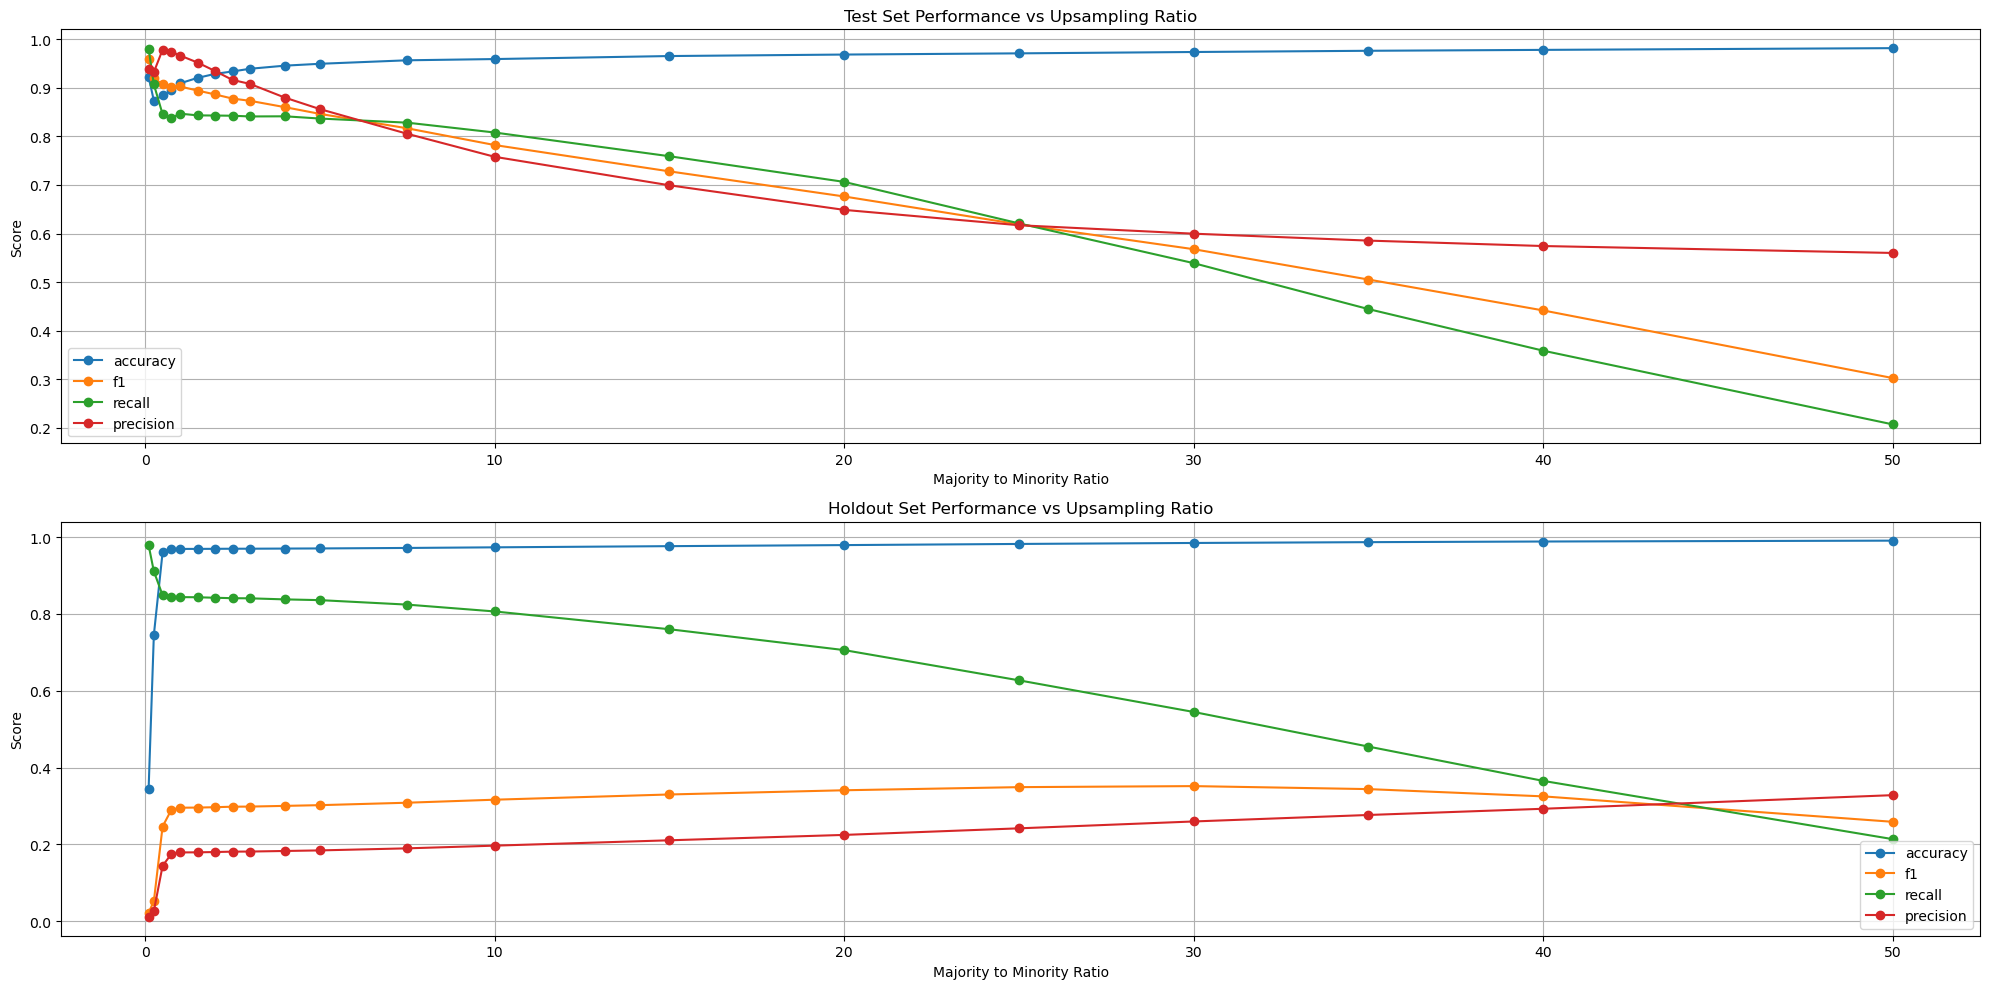


Best ratio: 30.0
Best holdout F1 score: 0.352
Best holdout recall score: 0.545
Best holdout precision score: 0.260

Confusion Matrix for best ratio (Holdout Set):
[[2042174   24879]
 [   7297    8730]]


In [35]:
# By itarion over the ratios we can see how the model performs with different upsampling ratios
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

def train_and_evaluate_model(X_train, X_test, y_train, y_test, X_holdout, y_holdout):
    """
    Train XGBoost model and evaluate on test and holdout sets
    """
    clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    clf.fit(X_train, y_train)
    
    # Test set predictions and metrics
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    
    # Holdout set predictions and metrics
    y_holdout_pred = clf.predict(X_holdout)
    holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)
    holdout_f1 = f1_score(y_holdout, y_holdout_pred)
    holdout_recall = recall_score(y_holdout, y_holdout_pred)
    holdout_precision = precision_score(y_holdout, y_holdout_pred)
    
    return {
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'holdout_accuracy': holdout_accuracy,
        'holdout_f1': holdout_f1,
        'test_confusion_matrix': confusion_matrix(y_test, y_pred),
        'holdout_confusion_matrix': confusion_matrix(y_holdout, y_holdout_pred),
        'test_recall': test_recall,
        'test_precision': test_precision,
        'holdout_recall': holdout_recall,
        'holdout_precision': holdout_precision
    }

def experiment_upsampling_ratios(majority, minority, X_holdout, y_holdout, ratios):
    """
    Test different upsampling ratios and collect results
    """
    results = []
    
    for ratio in ratios:
        # Calculate number of samples for majority class
        n_samples = int(len(minority) * ratio)
        
        # Resample majority class
        majority_downsampled = resample(majority,
                                      replace=True,
                                      n_samples=n_samples,
                                      random_state=42)
        
        # Combine classes
        df_balanced = pd.concat([minority, majority_downsampled])
        df_balanced = df_balanced.sample(frac=1, random_state=42)
        
        # Prepare features and target
        X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
        y = df_balanced['IsScratchDie']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train and evaluate
        metrics = train_and_evaluate_model(X_train, X_test, y_train, y_test, X_holdout, y_holdout)
        metrics['ratio'] = ratio
        results.append(metrics)
        
        # print(f"\nResults for ratio {ratio}:")
        # print(f"Test Set - Accuracy: {metrics['test_accuracy']:.3f}, F1: {metrics['test_f1']:.3f}")
        # print(f"Holdout Set - Accuracy: {metrics['holdout_accuracy']:.3f}, F1: {metrics['holdout_f1']:.3f}")
    
    return results

# Define ratios to test (ratio of majority samples to minority samples)
ratios = [0.1, 0.25, 0.5, 0.75,  # Very low ratios
          1.0, 1.5, 2.0, 2.5,     # Around balanced
          3.0, 4.0, 5.0, 7.5,     # Moderate imbalance
          10.0, 15.0, 20.0, 25.0,       # High imbalance
          30.0, 35.0 , 40.0, 50.0]       # Very high imbalance

# Run experiment
results = experiment_upsampling_ratios(majority, minority, X_holdout, y_holdout, ratios)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Test metrics
test_metrics = ['test_accuracy', 'test_f1', 'test_recall', 'test_precision']
for metric in test_metrics:
    ax1.plot([r['ratio'] for r in results], 
             [r[metric] for r in results],
             marker='o',
             label=metric.replace('test_', ''))

ax1.set_xlabel('Majority to Minority Ratio')
ax1.set_ylabel('Score')
ax1.set_title('Test Set Performance vs Upsampling Ratio')
ax1.legend()
ax1.grid(True)

# Holdout metrics
holdout_metrics = ['holdout_accuracy', 'holdout_f1', 'holdout_recall', 'holdout_precision']
for metric in holdout_metrics:
    ax2.plot([r['ratio'] for r in results], 
             [r[metric] for r in results],
             marker='o',
             label=metric.replace('holdout_', ''))

ax2.set_xlabel('Majority to Minority Ratio')
ax2.set_ylabel('Score')
ax2.set_title('Holdout Set Performance vs Upsampling Ratio')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Find best ratio based on holdout F1 score
best_result = max(results, key=lambda x: x['holdout_f1'])
print("\nBest ratio:", best_result['ratio'])
print(f"Best holdout F1 score: {best_result['holdout_f1']:.3f}")
print(f"Best holdout recall score: {best_result['holdout_recall']:.3f}")
print(f"Best holdout precision score: {best_result['holdout_precision']:.3f}")
print("\nConfusion Matrix for best ratio (Holdout Set):")
print(best_result['holdout_confusion_matrix'])



Based on the graphs and metrics shown, the 30:1 majority-to-minority ratio appears to be selected as the best because it represents an optimal trade-off between different performance metrics:
Looking at the holdout set (bottom graph), which is more important for evaluating true model performance:

F1 score (orange line) reaches close to its maximum value around ratio 30. The F1 score (0.352) balances precision and recall, making it a good overall performance metric.
Recall (green line) is still reasonably high at ratio 30 (0.545), indicating the model is still identifying a good portion of the positive cases. After ratio 30, recall drops significantly.
Precision (red line) continues to increase gradually past ratio 30, but not enough to offset the sharp decline in recall.
Accuracy (blue line) remains consistently high across all ratios, so it's not a distinguishing factor.

The upper test set graph shows similar trends, with metrics beginning to stabilize or showing diminishing returns around ratio 30.
This appears to be a classic imbalanced classification problem. As the upsampling ratio increases (reducing class imbalance), the model's ability to detect minority class examples (recall) improves initially but eventually declines, while precision fluctuates. Ratio 30 represents the sweet spot where the F1 score, which balances these competing objectives, reaches its optimal value.
The confusion matrix at the bottom confirms this is a highly imbalanced dataset (many more negative than positive cases), making the F1 score a more appropriate optimization target than accuracy.

In [36]:
# Calculate number of samples for majority class
n_samples = int(len(minority) * 30)

# Resample majority class
majority_downsampled = resample(majority,
                                replace=True,
                                n_samples=n_samples,
                                random_state=42)

# Combine classes
df_balanced = pd.concat([minority, majority_downsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Prepare features and target
X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
y = df_balanced['IsScratchDie']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Full results for the best model
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

Accuracy on upsampled data : 0.9733173444787023
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.98      0.99      0.99    385654
        True       0.60      0.54      0.57     12957

    accuracy                           0.97    398611
   macro avg       0.79      0.76      0.78    398611
weighted avg       0.97      0.97      0.97    398611

Confusion Matrix upsampled data:
 [[380991   4663]
 [  5973   6984]]
Accuracy on holdout set : 0.9845536417228336
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      0.99      0.99   2067053
        True       0.26      0.54      0.35     16027

    accuracy                           0.98   2083080
   macro avg       0.63      0.77      0.67   2083080
weighted avg       0.99      0.98      0.99   2083080

Confusion Matrix holdout set:
 [[2042174   24879]
 [   7297    8730]]


<Figure size 1000x800 with 0 Axes>

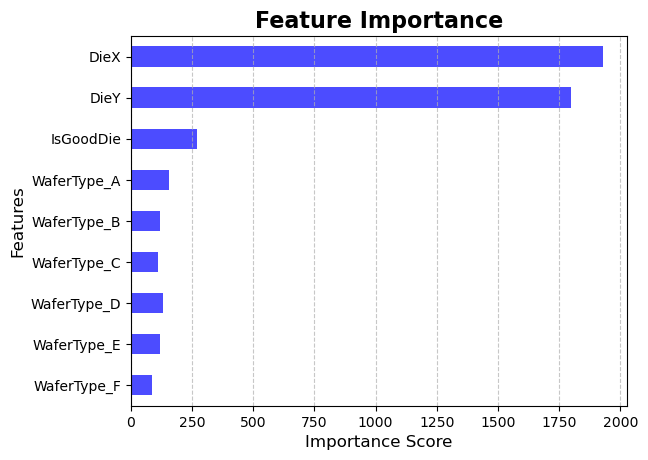

In [38]:
# Get feature importance from the model
importance = clf.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

importance_df = importance_df.set_index('Feature')
importance_df = importance_df.sort_index(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
importance_df.plot(kind='barh', legend=False, color='blue', alpha=0.7)
plt.title('Feature Importance', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Second approach - adding a feature that describes neighbors 

In [39]:
# Counting for each die their adjacent bad dies
def count_adjacent_bad_dies(df):
    # Create a copy of the dataframe to avoid modifying the original
    result_df = df.copy()
    
    # Initialize the new column with zeros
    result_df['AdjacentBadDieCount'] = 0
    
    # Group by wafer name as we need to process each wafer separately
    for wafer_name, wafer_df in df.groupby('WaferName'):
        print(f"Processing wafer: {wafer_name}")
        
        # Create a set of bad die positions (IsGoodDie == False)
        bad_die_positions = set(
            zip(wafer_df[~wafer_df['IsGoodDie']]['DieX'], 
                wafer_df[~wafer_df['IsGoodDie']]['DieY'])
        )
        
        # Define the 8 adjacent offsets
        adjacent_offsets = [
            (-1, -1), (-1, 0), (-1, 1),
            (0, -1),           (0, 1),
            (1, -1),  (1, 0),  (1, 1)
        ]
        
        # Process all dies at once
        for idx, row in wafer_df.iterrows():
            x, y = row.DieX, row.DieY
            
            # Count adjacent bad dies
            count = sum(1 for dx, dy in adjacent_offsets if (x+dx, y+dy) in bad_die_positions)
            
            # Update the result dataframe
            result_df.loc[idx, 'AdjacentBadDieCount'] = count
    
    return result_df

In [92]:
# Count adjacent bad dies for training and holdout sets
df_wafers_adj = count_adjacent_bad_dies(df_wafers_train)
df_holdout_adj = count_adjacent_bad_dies(df_holdout)

Processing wafer: 00Q792
Processing wafer: 01hHtd
Processing wafer: 042xYr
Processing wafer: 04XRmn
Processing wafer: 04kats
Processing wafer: 04m8dM
Processing wafer: 05OItq
Processing wafer: 05OOTD
Processing wafer: 061shK
Processing wafer: 062tv2
Processing wafer: 06s0Nk
Processing wafer: 06yPzs
Processing wafer: 07bYYB
Processing wafer: 07jCOP
Processing wafer: 0CUjW7
Processing wafer: 0F1nQ1
Processing wafer: 0Fbgb0
Processing wafer: 0FqZXx
Processing wafer: 0GBQq4
Processing wafer: 0GpSh2
Processing wafer: 0HHJ3o
Processing wafer: 0HiO2r
Processing wafer: 0JqNsU
Processing wafer: 0KW3Y7
Processing wafer: 0MlIpA
Processing wafer: 0OtGpm
Processing wafer: 0PzJB1
Processing wafer: 0Q5ePO
Processing wafer: 0QcTwn
Processing wafer: 0RGYQG
Processing wafer: 0TWVNe
Processing wafer: 0TdiMn
Processing wafer: 0UCmuk
Processing wafer: 0V0u5w
Processing wafer: 0a3M7q
Processing wafer: 0aVwco
Processing wafer: 0b4Mao
Processing wafer: 0bHb3N
Processing wafer: 0c9XYt
Processing wafer: 0eOMyR


Train Set Distribution of Adjacent Scratch Dies


AdjacentBadDieCount
0    6722308
1    1371919
2     196522
3      35483
4       4852
5       1006
6        194
7         33
8          3
Name: count, dtype: int64

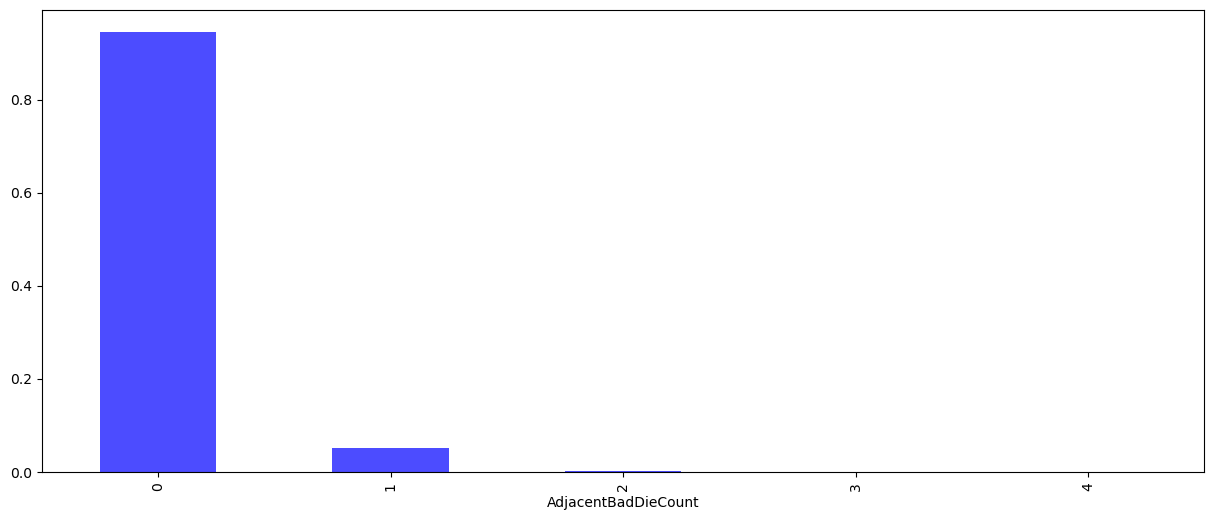

In [41]:
# what is the distribution of the amount of neighbours dies in each wafer

print("Train Set Distribution of Adjacent Scratch Dies")
df_holdout_adj.AdjacentBadDieCount.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(15, 6), color='blue', alpha=0.7)
df_wafers_adj.AdjacentBadDieCount.value_counts()

In [42]:
# train test split the data
X = df_wafers_adj.drop(columns=['IsScratchDie','WaferName'])
y = df_wafers_adj['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,stratify=y, random_state=42)


In [43]:
# Train the model
from sklearn.metrics import average_precision_score
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout_adj['IsScratchDie']
X_holdout = df_holdout_adj.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))


c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9947589626898631
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   2480408
        True       0.76      0.47      0.58     19288

    accuracy                           0.99   2499696
   macro avg       0.88      0.73      0.79   2499696
weighted avg       0.99      0.99      0.99   2499696

Confusion Matrix upsampled data:
 [[2477528    2880]
 [  10221    9067]]
Accuracy on holdout set : 0.9927487182441385
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   2067053
        True       0.78      0.08      0.14     16027

    accuracy                           0.99   2083080
   macro avg       0.89      0.54      0.57   2083080
weighted avg       0.99      0.99      0.99   2083080

Confusion Matrix holdout set:
 [[2066699     354]
 [  14751    1276]]


<Figure size 1000x800 with 0 Axes>

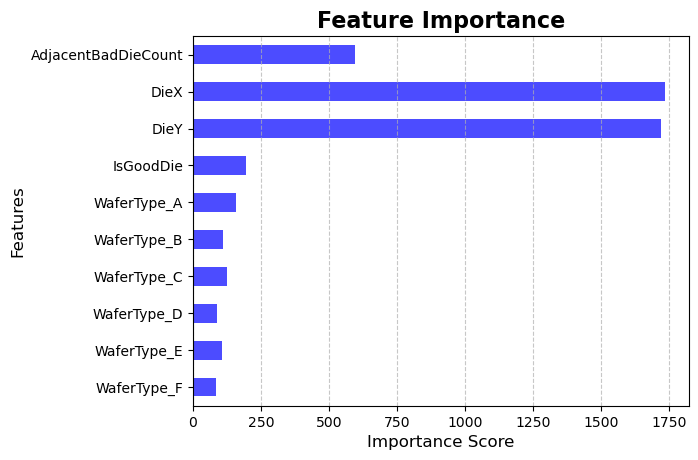

In [44]:
# show the feature importance
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance from the model
importance = clf.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

importance_df = importance_df.set_index('Feature')
importance_df = importance_df.sort_index(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
importance_df.plot(kind='barh', legend=False, color='blue', alpha=0.7)
plt.title('Feature Importance', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

## Adjacency + Upsampling

In [45]:
# upsampling the minority class
# Check the distribution of the target variable in the training set
print(df_wafers_adj['IsScratchDie'].value_counts(normalize=True))
print(df_holdout['IsScratchDie'].value_counts(normalize=True))

# Separate majority and minority classes
majority = df_wafers_adj[df_wafers_adj.IsScratchDie == False]
minority = df_wafers_adj[df_wafers_adj.IsScratchDie == True]

# Calculate number of samples for majority class
n_samples = int(len(minority) * 30)

# Resample majority class
majority_downsampled = resample(majority,
                                replace=True,
                                n_samples=n_samples,
                                random_state=42)

# Combine classes
df_balanced = pd.concat([minority, majority_downsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Prepare features and target
X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
y = df_balanced['IsScratchDie']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

IsScratchDie
False    0.992284
True     0.007716
Name: proportion, dtype: float64
IsScratchDie
False    0.992306
True     0.007694
Name: proportion, dtype: float64


In [46]:
# Train the model
from sklearn.metrics import average_precision_score
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout_adj['IsScratchDie']
X_holdout = df_holdout_adj.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))


c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9860716337481906
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.99      0.99      0.99    385654
        True       0.83      0.72      0.77     12957

    accuracy                           0.99    398611
   macro avg       0.91      0.86      0.88    398611
weighted avg       0.99      0.99      0.99    398611

Confusion Matrix upsampled data:
 [[383692   1962]
 [  3590   9367]]
Accuracy on holdout set : 0.9930770781727059
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   2067053
        True       0.61      0.27      0.37     16027

    accuracy                           0.99   2083080
   macro avg       0.80      0.63      0.69   2083080
weighted avg       0.99      0.99      0.99   2083080

Confusion Matrix holdout set:
 [[2064358    2695]
 [  11726    4301]]


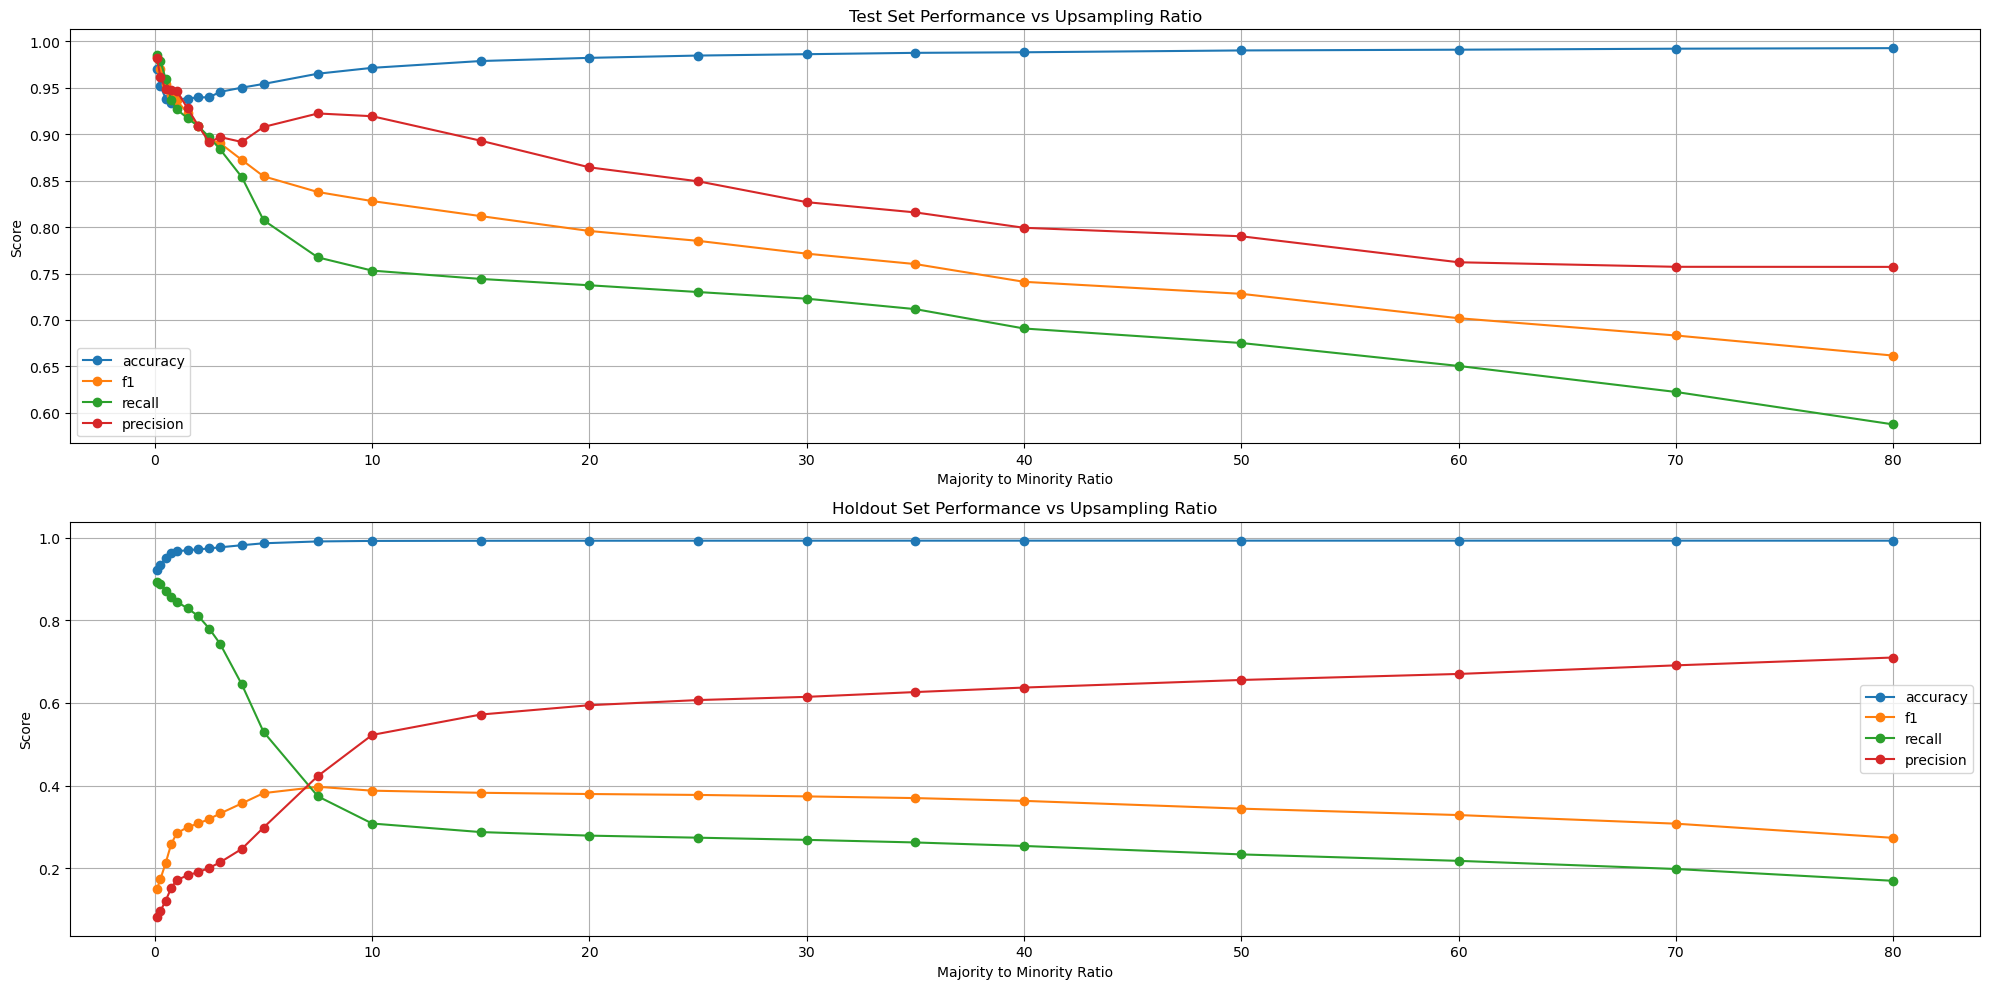


Best ratio: 7.5
Best holdout F1 score: 0.397
Best holdout recall score: 0.374
Best holdout precision score: 0.423

Confusion Matrix for best ratio (Holdout Set):
[[2058884    8169]
 [  10037    5990]]


In [47]:
# By itarion over the ratios we can see how the model performs with different upsampling ratios
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

# Separate majority and minority classes
majority = df_wafers_adj[df_wafers_adj.IsScratchDie == False]
minority = df_wafers_adj[df_wafers_adj.IsScratchDie == True]

def train_and_evaluate_model(X_train, X_test, y_train, y_test, X_holdout, y_holdout):
    """
    Train XGBoost model and evaluate on test and holdout sets
    """
    clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    clf.fit(X_train, y_train)
    
    # Test set predictions and metrics
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    
    # Holdout set predictions and metrics
    y_holdout_pred = clf.predict(X_holdout)
    holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)
    holdout_f1 = f1_score(y_holdout, y_holdout_pred)
    holdout_recall = recall_score(y_holdout, y_holdout_pred)
    holdout_precision = precision_score(y_holdout, y_holdout_pred)
    
    return {
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'holdout_accuracy': holdout_accuracy,
        'holdout_f1': holdout_f1,
        'test_confusion_matrix': confusion_matrix(y_test, y_pred),
        'holdout_confusion_matrix': confusion_matrix(y_holdout, y_holdout_pred),
        'test_recall': test_recall,
        'test_precision': test_precision,
        'holdout_recall': holdout_recall,
        'holdout_precision': holdout_precision
    }

def experiment_upsampling_ratios(majority, minority, X_holdout, y_holdout, ratios):
    """
    Test different upsampling ratios and collect results
    """
    results = []
    
    for ratio in ratios:
        # Calculate number of samples for majority class
        n_samples = int(len(minority) * ratio)
        
        # Resample majority class
        majority_downsampled = resample(majority,
                                      replace=True,
                                      n_samples=n_samples,
                                      random_state=42)
        
        # Combine classes
        df_balanced = pd.concat([minority, majority_downsampled])
        df_balanced = df_balanced.sample(frac=1, random_state=42)
        
        # Prepare features and target
        X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
        y = df_balanced['IsScratchDie']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train and evaluate
        metrics = train_and_evaluate_model(X_train, X_test, y_train, y_test, X_holdout, y_holdout)
        metrics['ratio'] = ratio
        results.append(metrics)
        
        # print(f"\nResults for ratio {ratio}:")
        # print(f"Test Set - Accuracy: {metrics['test_accuracy']:.3f}, F1: {metrics['test_f1']:.3f}")
        # print(f"Holdout Set - Accuracy: {metrics['holdout_accuracy']:.3f}, F1: {metrics['holdout_f1']:.3f}")
    
    return results

# Define ratios to test (ratio of majority samples to minority samples)
ratios = [0.1, 0.25, 0.5, 0.75,  # Very low ratios
          1.0, 1.5, 2.0, 2.5,     # Around balanced
          3.0, 4.0, 5.0, 7.5,     # Moderate imbalance
          10.0, 15.0, 20.0, 25.0,       # High imbalance
          30.0, 35.0 , 40.0, 50.0, 60.0, 70.0,80]       # Very high imbalance

# Run experiment
results = experiment_upsampling_ratios(majority, minority, X_holdout, y_holdout, ratios)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Test metrics
test_metrics = ['test_accuracy', 'test_f1', 'test_recall', 'test_precision']
for metric in test_metrics:
    ax1.plot([r['ratio'] for r in results], 
             [r[metric] for r in results],
             marker='o',
             label=metric.replace('test_', ''))

ax1.set_xlabel('Majority to Minority Ratio')
ax1.set_ylabel('Score')
ax1.set_title('Test Set Performance vs Upsampling Ratio')
ax1.legend()
ax1.grid(True)

# Holdout metrics
holdout_metrics = ['holdout_accuracy', 'holdout_f1', 'holdout_recall', 'holdout_precision']
for metric in holdout_metrics:
    ax2.plot([r['ratio'] for r in results], 
             [r[metric] for r in results],
             marker='o',
             label=metric.replace('holdout_', ''))

ax2.set_xlabel('Majority to Minority Ratio')
ax2.set_ylabel('Score')
ax2.set_title('Holdout Set Performance vs Upsampling Ratio')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Find best ratio based on holdout F1 score
best_result = max(results, key=lambda x: x['holdout_f1'])
print("\nBest ratio:", best_result['ratio'])
print(f"Best holdout F1 score: {best_result['holdout_f1']:.3f}")
print(f"Best holdout recall score: {best_result['holdout_recall']:.3f}")
print(f"Best holdout precision score: {best_result['holdout_precision']:.3f}")
print("\nConfusion Matrix for best ratio (Holdout Set):")
print(best_result['holdout_confusion_matrix'])



For the XGBoost part we reached several model - which one is the best of them is depeneded on the costs of the errors, how much it cost us to say a die a scrached and it not and how much it cost to say a die is not scrached but it is. 
From the instructions - balnace is whats required that is why the f1 metric which takes into acount the percsion and the recall is chousen to be the leading metric.
We can move around this grafh to selects other model if we will have more context - lets say the cost of not detecting a scratch becomes much bigger we could move to model with lower ratio of upsampled.

The best model for this part is the model with both adjacency and with a 7.5 ratio upsampling rate.

In [48]:
# BEST MODEL
# Check the distribution of the target variable in the training set
print(df_wafers_adj['IsScratchDie'].value_counts(normalize=True))
print(df_holdout['IsScratchDie'].value_counts(normalize=True))

# Separate majority and minority classes
majority = df_wafers_adj[df_wafers_adj.IsScratchDie == False]
minority = df_wafers_adj[df_wafers_adj.IsScratchDie == True]

# Calculate number of samples for majority class
n_samples = int(len(minority) * 7.5)

# Resample majority class
majority_downsampled = resample(majority,
                                replace=True,
                                n_samples=n_samples,
                                random_state=42)

# Combine classes
df_balanced = pd.concat([minority, majority_downsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Prepare features and target
X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
y = df_balanced['IsScratchDie']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

IsScratchDie
False    0.992284
True     0.007716
Name: proportion, dtype: float64
IsScratchDie
False    0.992306
True     0.007694
Name: proportion, dtype: float64


In [49]:
# Train the model
from sklearn.metrics import average_precision_score
best_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)
# Make predictions
y_pred = best_xgb.predict(X_test)
# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout_adj['IsScratchDie']
X_holdout = df_holdout_adj.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = best_xgb.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))


c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:02:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9650859584435071
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.97      0.99      0.98     96461
        True       0.92      0.77      0.84     12836

    accuracy                           0.97    109297
   macro avg       0.95      0.88      0.91    109297
weighted avg       0.96      0.97      0.96    109297

Confusion Matrix upsampled data:
 [[95631   830]
 [ 2986  9850]]
Accuracy on holdout set : 0.9912600572229583
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   2067053
        True       0.42      0.37      0.40     16027

    accuracy                           0.99   2083080
   macro avg       0.71      0.68      0.70   2083080
weighted avg       0.99      0.99      0.99   2083080

Confusion Matrix holdout set:
 [[2058884    8169]
 [  10037    5990]]


## Second approch - connected components in graphs 

This solution is more computationally intensive but has greater potential to accurately detect scratches and inked dies.
By relaying on the on the assumption that scraches are elongated clusters of bad dies that have a high aspect ratio, this makes them connected commponents - meaning by selecting the all the bad dies - we can travers there grafhs, leaving only subgrafhs with a more then X dies (reasonable amount from the plot with the two histograms regading the amount of dies in a wafer).

This can lead to an increse in the idetification of bad dies as scratched when there are just bad, but i assume that in that case the cost of this action is not high - no good dies go to waste.


In [50]:
# Code to find connected components of bad dies
import numpy as np
import pandas as pd
from collections import defaultdict, deque
from numba import jit, prange
import time

# Configuration
DEFAULT_MIN_COMPONENT_SIZE = 3
DEFAULT_MIN_YIELD_THRESHOLD = 0.8

@jit(nopython=True, parallel=True)
def create_adjacency_matrix(coords_x, coords_y):
    """
    Efficiently create adjacency matrix using Numba parallel acceleration
    """
    n = len(coords_x)
    adj_matrix = np.zeros((n, n), dtype=np.int8)
    
    for i in prange(n):
        x1, y1 = coords_x[i], coords_y[i]
        for j in range(n):
            if i != j:
                x2, y2 = coords_x[j], coords_y[j]
                if abs(x1-x2) <= 1 and abs(y1-y2) <= 1:
                    adj_matrix[i, j] = 1
    
    return adj_matrix

@jit(nopython=True)
def find_connected_components_numba(adjacency_matrix):
    """
    Find connected components using BFS, optimized with Numba
    """
    n = adjacency_matrix.shape[0]
    visited = np.zeros(n, dtype=np.bool_)
    components = []
    
    for i in range(n):
        if not visited[i]:
            # BFS to find connected component
            component = []
            queue = [i]
            visited[i] = True
            
            while queue:
                node = queue.pop(0)
                component.append(node)
                
                # Check neighbors
                for j in range(n):
                    if adjacency_matrix[node, j] == 1 and not visited[j]:
                        visited[j] = True
                        queue.append(j)
            
            components.append(component)
    
    return components

def find_connected_components(coords_x, coords_y, min_size=DEFAULT_MIN_COMPONENT_SIZE):
    """
    Find connected components of bad dies using optimized CPU implementation
    """
    if len(coords_x) == 0:
        return []
    
    # Create adjacency matrix
    adj_matrix = create_adjacency_matrix(coords_x, coords_y)
    
    # Find components
    components = find_connected_components_numba(adj_matrix)
    
    # Filter by size
    large_components = [comp for comp in components if len(comp) >= min_size]
    
    # Convert to coordinate sets
    coord_components = []
    for component in large_components:
        coords = set()
        for node_idx in component:
            coords.add((coords_x[node_idx], coords_y[node_idx]))
        coord_components.append(coords)
    
    return coord_components

@jit(nopython=True)
def apply_scratch_predictions_numba(die_x, die_y, scratch_x, scratch_y, n_dies, n_scratches):
    """
    Numba-optimized function to match dies with scratch coordinates
    """
    results = np.zeros(n_dies, dtype=np.bool_)
    
    # For each die
    for i in range(n_dies):
        x, y = die_x[i], die_y[i]
        
        # Check if it's in any scratch
        for j in range(n_scratches):
            if x == scratch_x[j] and y == scratch_y[j]:
                results[i] = True
                break
    
    return results

def apply_scratch_predictions(wafer_df, scratch_components):
    """
    Add a column to the DataFrame indicating whether each die is part of a detected scratch
    """
    # Create a new column initialized to False
    wafer_df['IsScratchDie_Predicted'] = False
    
    # If no scratch components, return the DataFrame as is
    if not scratch_components:
        return wafer_df
    
    # Combine all scratch coordinates
    all_scratch_coords = set().union(*scratch_components)
    
    # Convert coordinates to arrays for Numba
    scratch_x = np.array([x for x, y in all_scratch_coords], dtype=np.int32)
    scratch_y = np.array([y for x, y in all_scratch_coords], dtype=np.int32)
    
    die_x = wafer_df['DieX'].values.astype(np.int32)
    die_y = wafer_df['DieY'].values.astype(np.int32)
    
    # Apply predictions with Numba
    results = apply_scratch_predictions_numba(
        die_x, die_y, scratch_x, scratch_y, len(die_x), len(scratch_x)
    )
    
    # Update DataFrame
    wafer_df['IsScratchDie_Predicted'] = results
    
    return wafer_df

@jit(nopython=True)
def evaluate_scratch_detection_numba(actual_scratch, predicted_scratch):
    """
    Numba-accelerated function to evaluate scratch detection results
    """
    true_positives = np.sum(actual_scratch & predicted_scratch)
    false_positives = np.sum((~actual_scratch) & predicted_scratch)
    false_negatives = np.sum(actual_scratch & (~predicted_scratch))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1, true_positives, false_positives, false_negatives

def evaluate_scratch_detection(wafer_df):
    """
    Compare detected scratch candidates with actual scratch dies
    """
    # Make sure both columns exist
    if 'IsScratchDie' not in wafer_df.columns or 'IsScratchDie_Predicted' not in wafer_df.columns:
        return {}
    
    # Get actual and predicted scratch flags
    actual_scratch = wafer_df['IsScratchDie'].values
    predicted_scratch = wafer_df['IsScratchDie_Predicted'].values
    
    # Calculate metrics using Numba
    precision, recall, f1, tp, fp, fn = evaluate_scratch_detection_numba(actual_scratch, predicted_scratch)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'true_positives': tp,
        'false_positives': fp,
        'false_negatives': fn
    }

def process_single_wafer(wafer_df, min_size=DEFAULT_MIN_COMPONENT_SIZE):
    """
    Process a single wafer with optimized CPU code
    """
    # Get bad dies coordinates
    bad_dies = wafer_df[~wafer_df['IsGoodDie']][['DieX', 'DieY']]
    bad_die_x = bad_dies['DieX'].values.astype(np.int32)
    bad_die_y = bad_dies['DieY'].values.astype(np.int32)
    
    # Find connected components
    scratch_components = find_connected_components(bad_die_x, bad_die_y, min_size)
    
    # Apply predictions
    wafer_df = apply_scratch_predictions(wafer_df, scratch_components)
    
    # Evaluate if ground truth is available
    metrics = evaluate_scratch_detection(wafer_df)
    
    return wafer_df, metrics, scratch_components

def analyze_all_wafers(df_wafers, min_size=DEFAULT_MIN_COMPONENT_SIZE, min_yield_threshold=DEFAULT_MIN_YIELD_THRESHOLD):
    """
    Analyze all wafers using optimized CPU implementation
    """
    start_time = time.time()
    total_metrics = defaultdict(float)
    wafer_results = {}
    scratch_stats = {}
    
    # Make a copy for predictions
    df_wafers_with_predictions = df_wafers.copy()
    df_wafers_with_predictions['IsScratchDie_Predicted'] = False
    
    wafer_names = df_wafers['WaferName'].unique()
    total_wafers = len(wafer_names)
    processed_wafers = 0
    
    print(f"Starting analysis of {total_wafers} wafers with min_size={min_size}")
    
    # Process each wafer
    for idx, wafer_name in enumerate(wafer_names):
        wafer_df = df_wafers[df_wafers['WaferName'] == wafer_name].copy()
        
        # Skip wafers with very low yield
        yield_rate = wafer_df['IsGoodDie'].mean()
        if yield_rate < min_yield_threshold:
            print(f'Skipping wafer: {wafer_name} | Low yield rate: {yield_rate:.2f}')
            continue
        
        # Process wafer
        wafer_start_time = time.time()
        wafer_df, metrics, scratch_components = process_single_wafer(wafer_df, min_size)
        wafer_process_time = time.time() - wafer_start_time
        
        # Update predictions in the complete DataFrame
        mask = df_wafers_with_predictions['WaferName'] == wafer_name
        df_wafers_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
        
        # Store results
        if metrics:
            wafer_results[wafer_name] = metrics
            # Aggregate metrics
            for k, v in metrics.items():
                total_metrics[k] += v
        
        # Store scratch statistics
        scratch_stats[wafer_name] = {
            'num_components': len(scratch_components),
            'avg_size': np.mean([len(comp) for comp in scratch_components]) if scratch_components else 0,
            'process_time': wafer_process_time
        }
        
        processed_wafers += 1
        
        # Print progress
        if (idx + 1) % 10 == 0 or idx == len(wafer_names) - 1:
            elapsed = time.time() - start_time
            avg_time_per_wafer = elapsed / (idx + 1)
            print(f'Processed: {idx+1}/{total_wafers} wafers | Elapsed: {elapsed:.2f}s | '
                 f'Avg time: {avg_time_per_wafer:.4f}s per wafer')
            
            # Print some stats if we have them
            if metrics:
                print(f'Last wafer metrics: Precision={metrics["precision"]:.4f}, '
                      f'Recall={metrics["recall"]:.4f}, F1={metrics["f1"]:.4f}')
    
    # Calculate average metrics
    n_wafers = len(wafer_results)
    avg_metrics = {k: v/n_wafers for k, v in total_metrics.items()} if n_wafers > 0 else {}
    
    # Overall performance stats
    total_time = time.time() - start_time
    print(f"\nAnalysis completed in {total_time:.2f} seconds")
    print(f"Average metrics across {processed_wafers} wafers (excluding low yield):")
    for k, v in avg_metrics.items():
        print(f"  {k}: {v:.4f}")
    
    return avg_metrics, wafer_results, df_wafers_with_predictions, scratch_stats

def predict_scratches(df_wafers_test, min_size=DEFAULT_MIN_COMPONENT_SIZE):
    """
    Apply scratch detection to test data using optimized CPU implementation
    """
    # Make a copy for predictions
    df_wafers_test_with_predictions = df_wafers_test.copy()
    df_wafers_test_with_predictions['IsScratchDie_Predicted'] = False
    
    for wafer_name in df_wafers_test['WaferName'].unique():
        wafer_df = df_wafers_test[df_wafers_test['WaferName'] == wafer_name].copy()
        
        # Process wafer
        wafer_df, _, _ = process_single_wafer(wafer_df, min_size)
        
        # Update predictions in the complete DataFrame
        mask = df_wafers_test_with_predictions['WaferName'] == wafer_name
        df_wafers_test_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
    
    return df_wafers_test_with_predictions['IsScratchDie_Predicted'].values

def analyze_min_size_impact(df_wafers, min_sizes=[3,  5, 7], min_yield_threshold=DEFAULT_MIN_YIELD_THRESHOLD):
    """
    Analyze the impact of different minimum component sizes on scratch detection performance
    """
    results = {}
    
    for min_size in min_sizes:
        print(f"\nAnalyzing with min_size = {min_size}")
        avg_metrics, _, _, scratch_stats = analyze_all_wafers(
            df_wafers, min_size=min_size, min_yield_threshold=min_yield_threshold
        )
        
        # Collect performance metrics
        results[min_size] = {
            'avg_metrics': avg_metrics,
            'avg_components_per_wafer': np.mean([stats['num_components'] for stats in scratch_stats.values()]),
            'avg_component_size': np.mean([stats['avg_size'] for stats in scratch_stats.values() if stats['avg_size'] > 0]),

            # total metrics can be added here if needed
            'total_scratch_dies': np.sum([stats['num_components'] * stats['avg_size'] for stats in scratch_stats.values()]),
            'total_process_time': np.sum([stats['process_time'] for stats in scratch_stats.values()])   

        }
    
    # Create a summary DataFrame
    summary = []
    for min_size, data in results.items():
        summary.append({
            'min_size': min_size,
            'precision': data['avg_metrics'].get('precision', 0),
            'recall': data['avg_metrics'].get('recall', 0),
            'f1': data['avg_metrics'].get('f1', 0),
            'avg_components': data['avg_components_per_wafer'],
            'avg_component_size': data['avg_component_size'],
            'total_scratch_dies': data['total_scratch_dies'],
            'total_process_time': data['total_process_time']
        })
    
    summary_df = pd.DataFrame(summary)
    
    # Print summary
    print("\nPerformance comparison across different min_size values:")
    print(summary_df)
    
    # Find the best min_size based on F1 score
    best_min_size = summary_df.loc[summary_df['f1'].idxmax()]['min_size']
    print(f"\nBest min_size value based on F1 score: {best_min_size}")
    
    return summary_df, results


    


In [ ]:
# compare the performance of different min_size values
avg_metrics_3, wafer_results_3, df_predictions_3, scratch_stats_3 = analyze_all_wafers(df_wafers , min_size = 3)
avg_metrics_4, wafer_results_4, df_predictions_4, scratch_stats_4 = analyze_all_wafers(df_wafers , min_size = 4)
avg_metrics_5, wafer_results_5, df_predictions_5, scratch_stats_5 = analyze_all_wafers(df_wafers , min_size = 5)


Starting analysis of 4200 wafers with min_size=3
Processed: 10/4200 wafers | Elapsed: 7.61s | Avg time: 0.7611s per wafer
Last wafer metrics: Precision=0.6316, Recall=0.7500, F1=0.6857
Processed: 20/4200 wafers | Elapsed: 13.65s | Avg time: 0.6826s per wafer
Last wafer metrics: Precision=0.0000, Recall=0.0000, F1=0.0000
Processed: 30/4200 wafers | Elapsed: 19.67s | Avg time: 0.6557s per wafer
Last wafer metrics: Precision=0.6154, Recall=0.9412, F1=0.7442
Processed: 40/4200 wafers | Elapsed: 25.70s | Avg time: 0.6425s per wafer
Last wafer metrics: Precision=0.9091, Recall=0.6522, F1=0.7595
Processed: 50/4200 wafers | Elapsed: 31.71s | Avg time: 0.6342s per wafer
Last wafer metrics: Precision=0.7000, Recall=0.5000, F1=0.5833
Processed: 60/4200 wafers | Elapsed: 37.73s | Avg time: 0.6288s per wafer
Last wafer metrics: Precision=0.0000, Recall=0.0000, F1=0.0000
Processed: 70/4200 wafers | Elapsed: 43.89s | Avg time: 0.6270s per wafer
Last wafer metrics: Precision=0.8864, Recall=0.8125, F1=

In [52]:
# Function to show resluts of the model
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def results(df_wafers_with_predictions): 
    # Ensure both columns exist and contain valid boolean values
    if 'IsScratchDie' in df_wafers_with_predictions.columns and 'IsScratchDie_Predicted' in df_wafers_with_predictions.columns:
        # Convert to boolean if needed
        y_true = df_wafers_with_predictions['IsScratchDie'].astype(bool)
        y_pred = df_wafers_with_predictions['IsScratchDie_Predicted'].astype(bool)
        
        # Calculate metrics
        try:
            precision = precision_score(y_true, y_pred)
            recall = recall_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred)
            accuracy = accuracy_score(y_true, y_pred)
            
            # Print results
            print("\nMetrics Summary:")
            print(f"Precision: {precision:.3f}")
            print(f"Recall: {recall:.3f}")
            print(f"F1 Score: {f1:.3f}")
            print(f"Accuracy: {accuracy:.3f}")
            
            print("\nConfusion Matrix:")
            print(confusion_matrix(y_true, y_pred))
            
            print("\nDetailed Classification Report:")
            print(classification_report(y_true, y_pred))
            
        except Exception as e:
            print(f"Error calculating metrics: {str(e)}")
    else:
        print("Required columns 'IsScratchDie' and/or 'IsScratchDie_Predicted' not found in the DataFrame")

In [ ]:
# Show results for min_size = 3
results(df_predictions_3)


Metrics Summary:
Precision: 0.737
Recall: 0.762
F1 Score: 0.749
Accuracy: 0.996

Confusion Matrix:
[[10313282    21799]
 [   19116    61203]]

Detailed Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00  10335081
        True       0.74      0.76      0.75     80319

    accuracy                           1.00  10415400
   macro avg       0.87      0.88      0.87  10415400
weighted avg       1.00      1.00      1.00  10415400



In [ ]:
# Show results for min_size = 4
results(df_predictions_4)


Metrics Summary:
Precision: 0.850
Recall: 0.704
F1 Score: 0.770
Accuracy: 0.997

Confusion Matrix:
[[10325137     9944]
 [   23761    56558]]

Detailed Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00  10335081
        True       0.85      0.70      0.77     80319

    accuracy                           1.00  10415400
   macro avg       0.92      0.85      0.88  10415400
weighted avg       1.00      1.00      1.00  10415400



In [ ]:
# Show results for min_size = 5
results(df_predictions_5)


Metrics Summary:
Precision: 0.884
Recall: 0.638
F1 Score: 0.741
Accuracy: 0.997

Confusion Matrix:
[[10328386     6695]
 [   29056    51263]]

Detailed Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00  10335081
        True       0.88      0.64      0.74     80319

    accuracy                           1.00  10415400
   macro avg       0.94      0.82      0.87  10415400
weighted avg       1.00      1.00      1.00  10415400



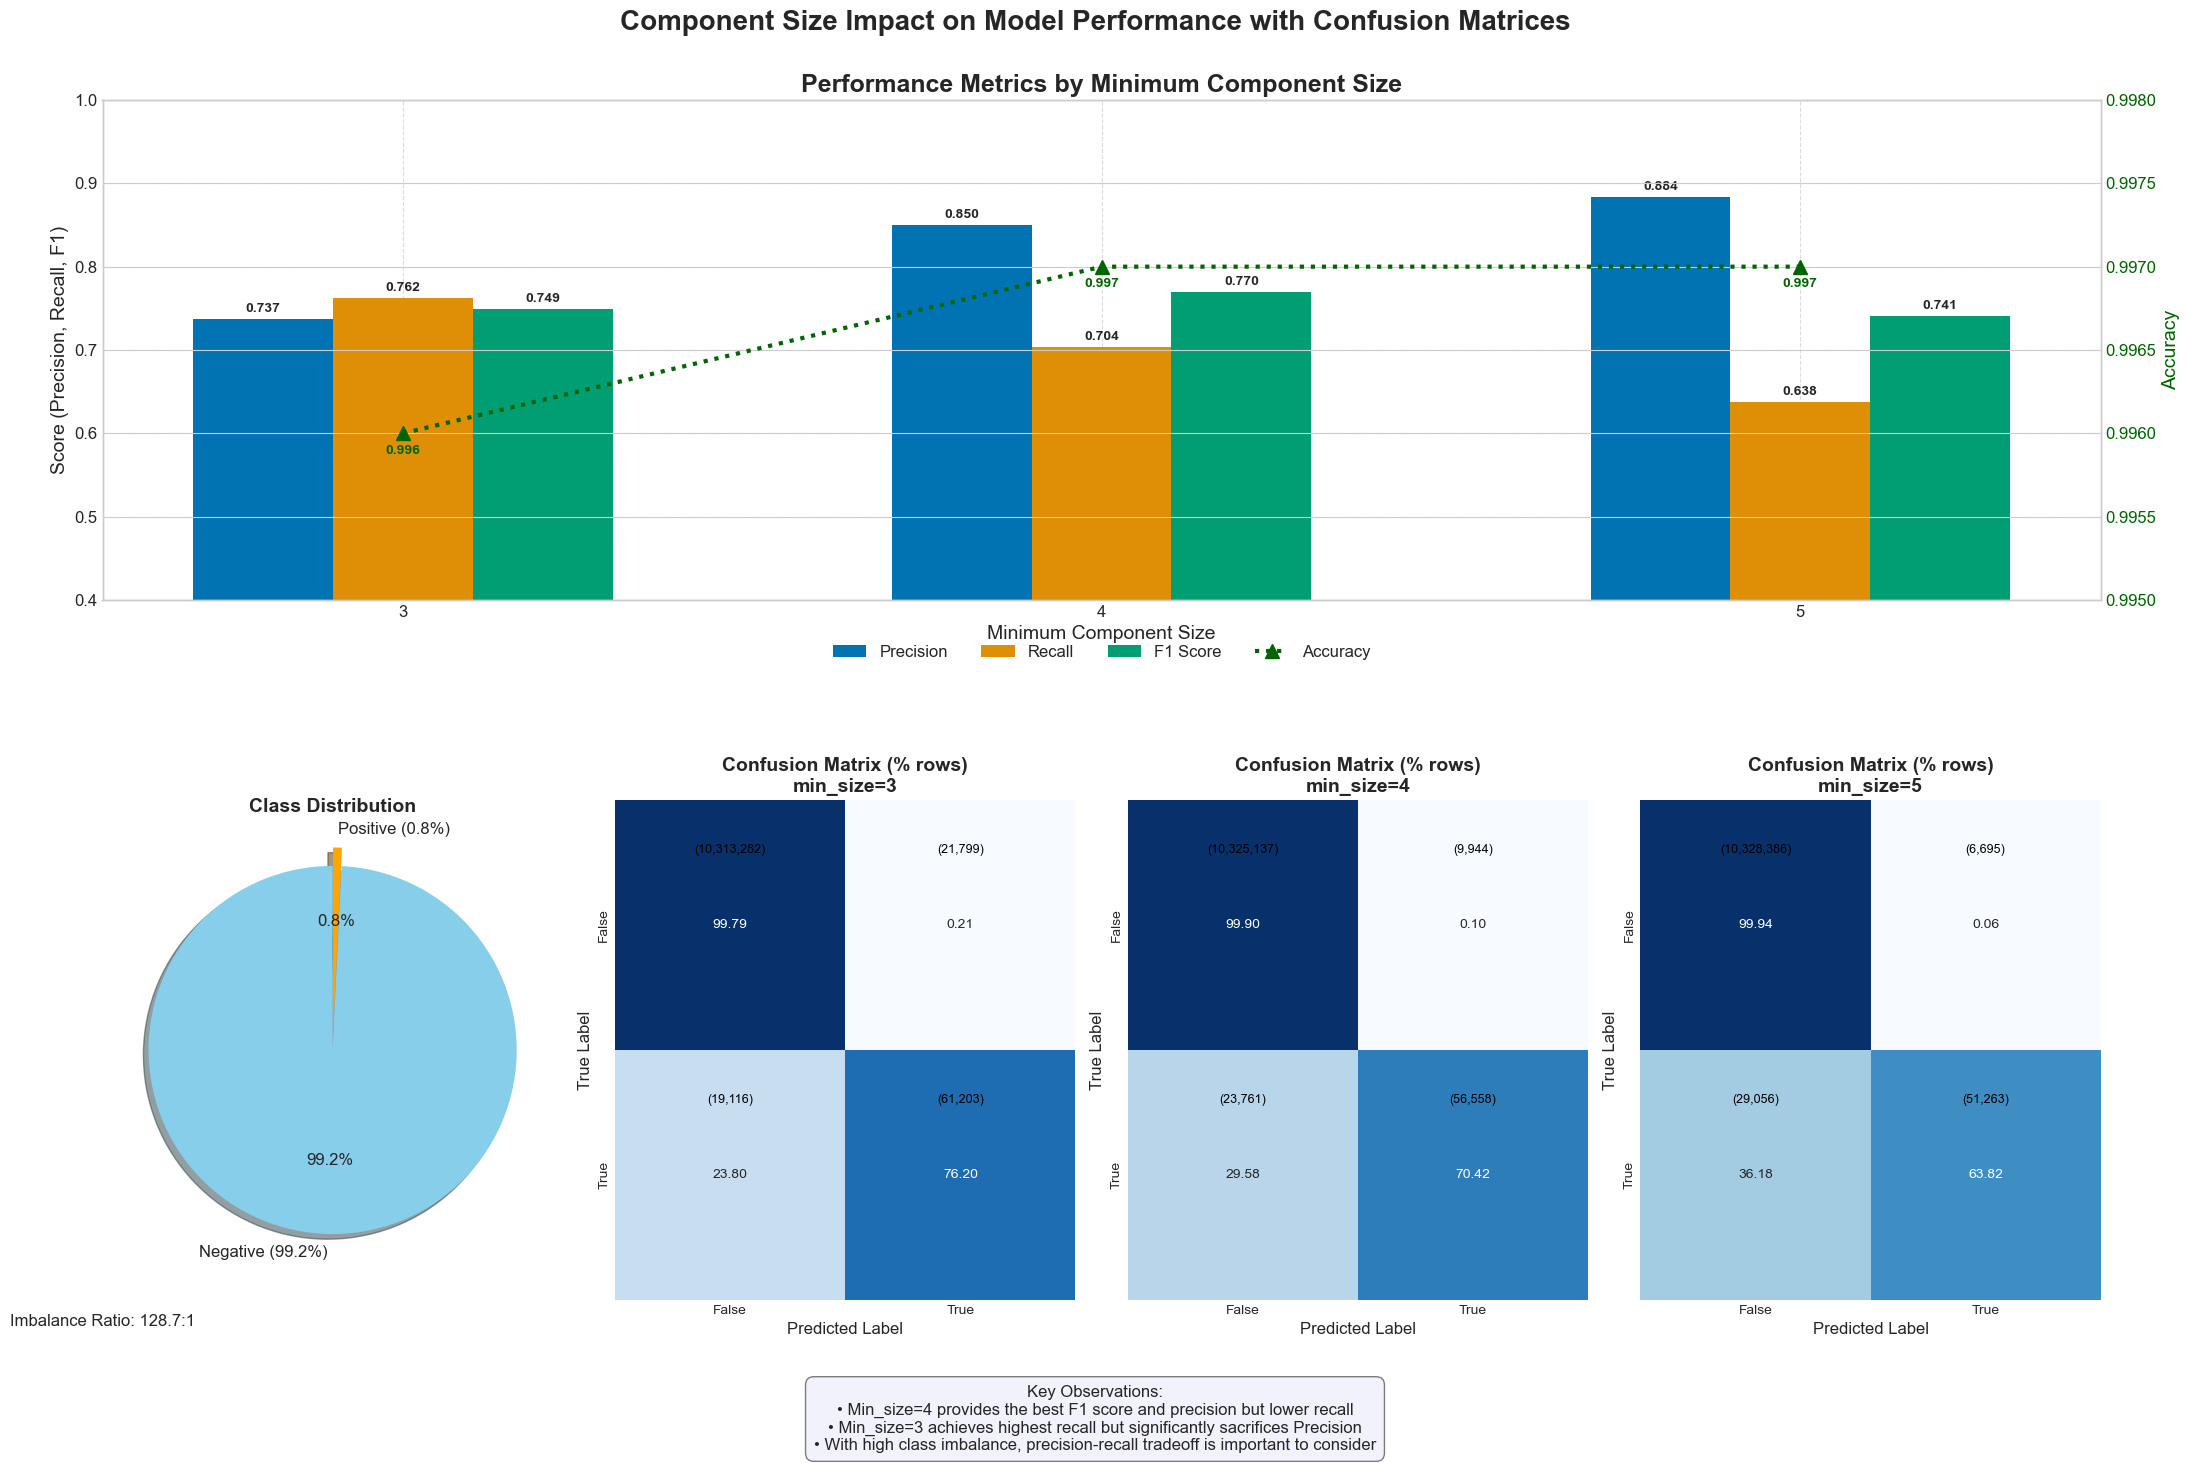

In [10]:
# comapring the model
# Actual metrics from the results
metrics_data = {
    'min_size': [3, 4, 5],
    'Precision': [0.737, 0.850, 0.884],
    'Recall': [0.762, 0.704 ,0.638],
    'F1 Score': [0.749, 0.770 ,0.741],
    'Accuracy': [0.996, 0.997, 0.997]
}
metrics_df = pd.DataFrame(metrics_data)

# Confusion matrices data
confusion_matrices = [
    [[10313282, 21799], [19116, 61203]],  # min_size=3
    [[10325137, 9944], [23761, 56558]],  # min_size=4
    [[10328386, 6695], [29056, 51263]]  # min_size=5

]

# Set up the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': ['Arial']})

# Create a figure with subplots - one for metrics, three for confusion matrices
fig = plt.figure(figsize=(22, 15))
gs = fig.add_gridspec(2, 4)

# Main metrics plot (grouped bar chart)
ax_metrics = fig.add_subplot(gs[0, :])

# Prepare data for bar plot
metrics_to_plot = ['Precision', 'Recall', 'F1 Score']
colors = sns.color_palette("colorblind")[:3]
bar_width = 0.2
x = np.arange(len(metrics_df['min_size']))  # positions for groups

# Plot bars for each metric
for i, metric in enumerate(metrics_to_plot):
    ax_metrics.bar(x + i * bar_width, metrics_df[metric], width=bar_width,
                   label=metric, color=colors[i])

# Plot Accuracy on a secondary axis
ax_accuracy = ax_metrics.twinx()
ax_accuracy.plot(x + bar_width, metrics_df['Accuracy'], 
                 marker='^', markersize=10, linewidth=3, 
                 color='darkgreen', label='Accuracy', linestyle=':')

# Add data labels for each bar
for i, metric in enumerate(metrics_to_plot):
    for xi, yi in zip(x + i * bar_width, metrics_df[metric]):
        ax_metrics.annotate(f'{yi:.3f}', (xi, yi), textcoords="offset points", 
                            xytext=(0, 5), ha='center', fontweight='bold', fontsize=10)

# Add data labels for Accuracy
for xi, yi in zip(x + bar_width, metrics_df['Accuracy']):
    ax_accuracy.annotate(f'{yi:.3f}', (xi, yi), textcoords="offset points", 
                         xytext=(0, -15), ha='center', fontweight='bold', fontsize=10, color='darkgreen')

# Styling
ax_metrics.set_title('Performance Metrics by Minimum Component Size', fontsize=18, fontweight='bold')
ax_metrics.set_xlabel('Minimum Component Size', fontsize=14)
ax_metrics.set_ylabel('Score (Precision, Recall, F1)', fontsize=14)
ax_metrics.set_xticks(x + bar_width)
ax_metrics.set_xticklabels(metrics_df['min_size'])
ax_metrics.set_ylim(0.4, 1.0)
ax_metrics.tick_params(axis='both', which='major', labelsize=12)
ax_metrics.grid(True, linestyle='--', alpha=0.7)

ax_accuracy.set_ylabel('Accuracy', fontsize=14, color='darkgreen')
ax_accuracy.set_ylim(0.995, 0.998)
ax_accuracy.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)

# Combine legends
lines1, labels1 = ax_metrics.get_legend_handles_labels()
lines2, labels2 = ax_accuracy.get_legend_handles_labels()
ax_metrics.legend(lines1 + lines2, labels1 + labels2, loc='lower center', 
                  bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)


# Create confusion matrix plots
titles = ['min_size=3', 'min_size=4', 'min_size=5']
for i, cm in enumerate(confusion_matrices):
    ax_cm = fig.add_subplot(gs[1, i+1])
    
    # Convert to percentages for better visualization since the numbers are large
    cm_percent = np.zeros((2, 2))
    # Calculate row percentages
    cm_percent[0, 0] = cm[0][0] / (cm[0][0] + cm[0][1]) * 100
    cm_percent[0, 1] = cm[0][1] / (cm[0][0] + cm[0][1]) * 100
    cm_percent[1, 0] = cm[1][0] / (cm[1][0] + cm[1][1]) * 100
    cm_percent[1, 1] = cm[1][1] / (cm[1][0] + cm[1][1]) * 100
    
    # Plot the confusion matrix
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=ax_cm)
    
    # Add actual counts as second labels
    for j in range(2):
        for k in range(2):
            ax_cm.text(k+0.5, j+0.2, f'({cm[j][k]:,})', 
                       ha='center', va='center', fontsize=9, color='black')
    
    ax_cm.set_title(f'Confusion Matrix (% rows)\n{titles[i]}', fontsize=14, fontweight='bold')
    ax_cm.set_xlabel('Predicted Label', fontsize=12)
    ax_cm.set_ylabel('True Label', fontsize=12)
    ax_cm.set_xticklabels(['False', 'True'])
    ax_cm.set_yticklabels(['False', 'True'])

# Add class distribution information
ax_dist = fig.add_subplot(gs[1, 0])
# Extract class distribution from the first confusion matrix (same for all)
total_samples = sum(sum(cm) for cm in confusion_matrices[0])
negative_samples = confusion_matrices[0][0][0] + confusion_matrices[0][0][1]
positive_samples = confusion_matrices[0][1][0] + confusion_matrices[0][1][1]

# Create a pie chart for class distribution
class_dist = [negative_samples, positive_samples]
class_labels = ['Negative (99.2%)', 'Positive (0.8%)']
ax_dist.pie(class_dist, labels=class_labels, autopct='%1.1f%%', startangle=90, 
            colors=['skyblue', 'orange'], explode=(0, 0.1), shadow=True, textprops={'fontsize': 12})
ax_dist.set_title('Class Distribution', fontsize=14, fontweight='bold')

# Add annotation about class imbalance
class_ratio = negative_samples / positive_samples
ax_dist.annotate(f'Imbalance Ratio: {class_ratio:.1f}:1', xy=(0, -0.1), 
                 xycoords='axes fraction', fontsize=12, ha='center')

# Add general observations
plt.figtext(0.5, 0.02, 
            'Key Observations:\n'
            '• Min_size=4 provides the best F1 score and precision but lower recall\n'
            '• Min_size=3 achieves highest recall but significantly sacrifices Precision\n'
            '• With high class imbalance, precision-recall tradeoff is important to consider',
            ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", facecolor='lavender', alpha=0.5))

plt.suptitle('Component Size Impact on Model Performance with Confusion Matrices', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.12, hspace=0.4)

plt.savefig('comprehensive_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

The trade-off between precision, recall, and F1-score directly reflects the challenges of detecting scratched dies in wafers. In this case, the variation across different minimum component sizes shows how model behavior shifts depending on how aggressively we try to catch defects. A smaller min_size (e.g., 3) achieves higher recall, meaning the model successfully identifies more scratched dies, but at the cost of lower precision — leading to more good dies being incorrectly classified as scratched. A larger min_size (e.g., 5) greatly improves precision, reducing false alarms, but sacrifices recall by missing more actual scratches. Because of these opposing risks, I selected the F1-score as the primary evaluation metric — it balances precision and recall, ensuring the model is effective in minimizing both types of costly errors. However, precision and recall are still monitored separately, since the final model choice must align with business priorities: if missing a scratched die (false negative) carries a higher cost due to potential wafer failures, higher recall is preferred; if falsely classifying a good die as scratched (false positive) leads to unacceptable yield loss, higher precision becomes more critical. This framework ensures that model selection is not based purely on metrics but is directly informed by the real-world impact on manufacturing quality and yield.

Based on the F1-score, the model with a minimum size of 4 performs best, offering the best balance between precision and recall. However, model selection can shift depending on the cost of errors: if missing scratched dies is worse, min_size=3 is preferred; if wasting good dies is more critical, a model with higher precision, like min_size=5, might be better. This ensures alignment with real-world manufacturing priorities.

In [59]:
# Load the test set again 
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))

In [60]:
# predict on the test set using the best model from the training set
avg_metrics_test, wafer_results_test, df_predictions_test, scratch_stats_test = analyze_all_wafers(df_wafers_test ,min_size= 4 )

Starting analysis of 455 wafers with min_size=4
Skipping wafer: WpfSfc | Low yield rate: 0.29
Skipping wafer: RGKRdQ | Low yield rate: 0.64
Processed: 10/455 wafers | Elapsed: 0.65s | Avg time: 0.0649s per wafer
Skipping wafer: GAX02p | Low yield rate: 0.66
Processed: 20/455 wafers | Elapsed: 1.29s | Avg time: 0.0645s per wafer
Skipping wafer: cgiCXI | Low yield rate: 0.50
Skipping wafer: GxicUQ | Low yield rate: 0.63
Processed: 30/455 wafers | Elapsed: 1.88s | Avg time: 0.0628s per wafer
Skipping wafer: DBmOko | Low yield rate: 0.64
Processed: 40/455 wafers | Elapsed: 2.53s | Avg time: 0.0632s per wafer
Processed: 50/455 wafers | Elapsed: 3.20s | Avg time: 0.0640s per wafer
Skipping wafer: xGsI7M | Low yield rate: 0.65
Processed: 70/455 wafers | Elapsed: 4.52s | Avg time: 0.0645s per wafer
Skipping wafer: ehuVJC | Low yield rate: 0.65
Processed: 80/455 wafers | Elapsed: 5.16s | Avg time: 0.0645s per wafer
Skipping wafer: aDCCUu | Low yield rate: 0.65
Skipping wafer: 5NR3zw | Low yield

In [61]:
# A function to get the predicted level of scratches on the wafer and clasiifiy them as scratched or not scratched
def predicted_level_wafers(df_wafers_test):
    """
    This function is used to sum the level of scratches on the wafer 
    if the there more then 5 dies makred by the model as scracthed then the whole wafer is marked as scratched
    :param df_wafers_test: pd.DataFrame, The DataFrame of the test wafers
    :return: pd.DataFrame, The DataFrame of the test wafers with the predicted level of scratches
    """
    # Get the amount of scrached wafers
    scratched_wafers = df_wafers_test[df_wafers_test['IsScratchDie_Predicted'] == True]['WaferName'].unique()
    # Get the amount of scrached dies per wafer
    scratched_dies_per_wafer = df_wafers_test[df_wafers_test['IsScratchDie_Predicted'] == True].groupby('WaferName').size()
    # keep al wafers with more then 5 scratched dies
    scratched_dies_per_wafer = scratched_dies_per_wafer[scratched_dies_per_wafer > 5].index.tolist()

    # return the scratched wafers as a list
    return scratched_dies_per_wafer

In [62]:
scratched_wafers = predicted_level_wafers(df_predictions_test)
print("Scratched Wafers: ", len(scratched_wafers))
print("Scratched Wafers: ", scratched_wafers)

Scratched Wafers:  412
Scratched Wafers:  ['06svz3', '0PCkQf', '0fDCmN', '0jmA2q', '0o5c0L', '0qgt3q', '16OK7s', '16sCcR', '1AXz5R', '1BDZNP', '1EhccD', '1JTz8t', '1KPqfJ', '1KhWYe', '1KrD6F', '1LDga4', '1c84J1', '1ceVie', '1g2TIM', '22gX1d', '2JpLgv', '2LXVf2', '2ZTxuS', '2sNGME', '2zVJCj', '31CJAL', '33Fw03', '3Ry4pL', '3XmG5o', '43wjEZ', '44xbDs', '4VaKyd', '4gftEv', '4ssHWU', '4yJA3c', '50cVJB', '53gxaq', '5ISkdX', '5LJb0H', '5QecwG', '64y2Et', '6AomAC', '6Dhk2G', '6XM8Xw', '6fKKvG', '6fbvIA', '6hisjd', '6pescL', '7WvcMi', '7afZOf', '7eF5Rb', '7kJeN6', '7mwmQq', '8K1EEO', '8OWx6j', '8hrqw5', '8sGvtk', '90hIaz', '9M54Jm', '9NNLF1', '9UHUb5', '9WdNvE', 'A3ghU9', 'Ad6y7N', 'AftLL3', 'AkNVOK', 'AydcPr', 'B9ekYV', 'BJzSV7', 'Bvhpfd', 'C4QKbT', 'C9YhJr', 'CMBHhF', 'Cqpfwb', 'DEuoPf', 'DFw871', 'DKg1Qz', 'DWOIO8', 'DYLjbE', 'DjejpX', 'DqGjEm', 'EG5bjs', 'ELLNkq', 'ETMVH5', 'EXURh3', 'EhesLq', 'EkIuEm', 'Enj6VJ', 'Ery20w', 'F3xesh', 'F7tPRn', 'F99Mi8', 'FRYRG7', 'FX0bWo', 'G2K56s', 'G3ABkP

In [63]:
# A function to get all the low yeild wafers
def low_yield_wafers_list(df_wafers_test, threshold=0.8):
    """
    This function is used to get all the low yeild wafers
    :param df_wafers_test: pd.DataFrame, The DataFrame of the test wafers
    :param threshold: float, The threshold for the yield rate
    :return: pd.DataFrame, The DataFrame of the test wafers with the low yeild wafers
    """
    # Get the yield rate per wafer
    yield_rate_per_wafer = df_wafers_test.groupby('WaferName')['IsGoodDie'].mean()
    # keep al wafers with a yield rate lower then the threshold
    low_yield_wafers = yield_rate_per_wafer[yield_rate_per_wafer < threshold].index.tolist()

    # return the low yeild wafers as a list
    return low_yield_wafers

In [64]:
low_yield_wafers = low_yield_wafers_list(df_wafers_test, threshold=0.8)
print("Low Yield Wafers: ", len(low_yield_wafers))
print("Low Yield Wafers: ", low_yield_wafers)

Low Yield Wafers:  35
Low Yield Wafers:  ['5NR3zw', '5cA62c', 'Ar9QwZ', 'DBmOko', 'Es48B6', 'GAX02p', 'GxicUQ', 'H0bs7X', 'IGl4nY', 'IKRzN5', 'IvjzQj', 'JuTYZ0', 'KN4X6r', 'KnR98o', 'LwRFIp', 'MBaqy9', 'Nz9Kjn', 'RGKRdQ', 'RcWOWN', 'WpfSfc', 'Ys4eLt', 'Z3IMrI', 'ZW3dC7', 'aDCCUu', 'ayTMJl', 'cgiCXI', 'eI5Ck4', 'ehuVJC', 'juWHR9', 'tFN9Im', 'tezOWv', 'vkkKkN', 'xGsI7M', 'zRBzSf', 'zRVg2P']


## Taking a look at the perdictions 

In [65]:
# Adapted from the original code to plot wafer maps for the test set
def plot_wafer_maps_test(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie_Predicted')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie_Predicted'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie_Predicted'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie_Predicted'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

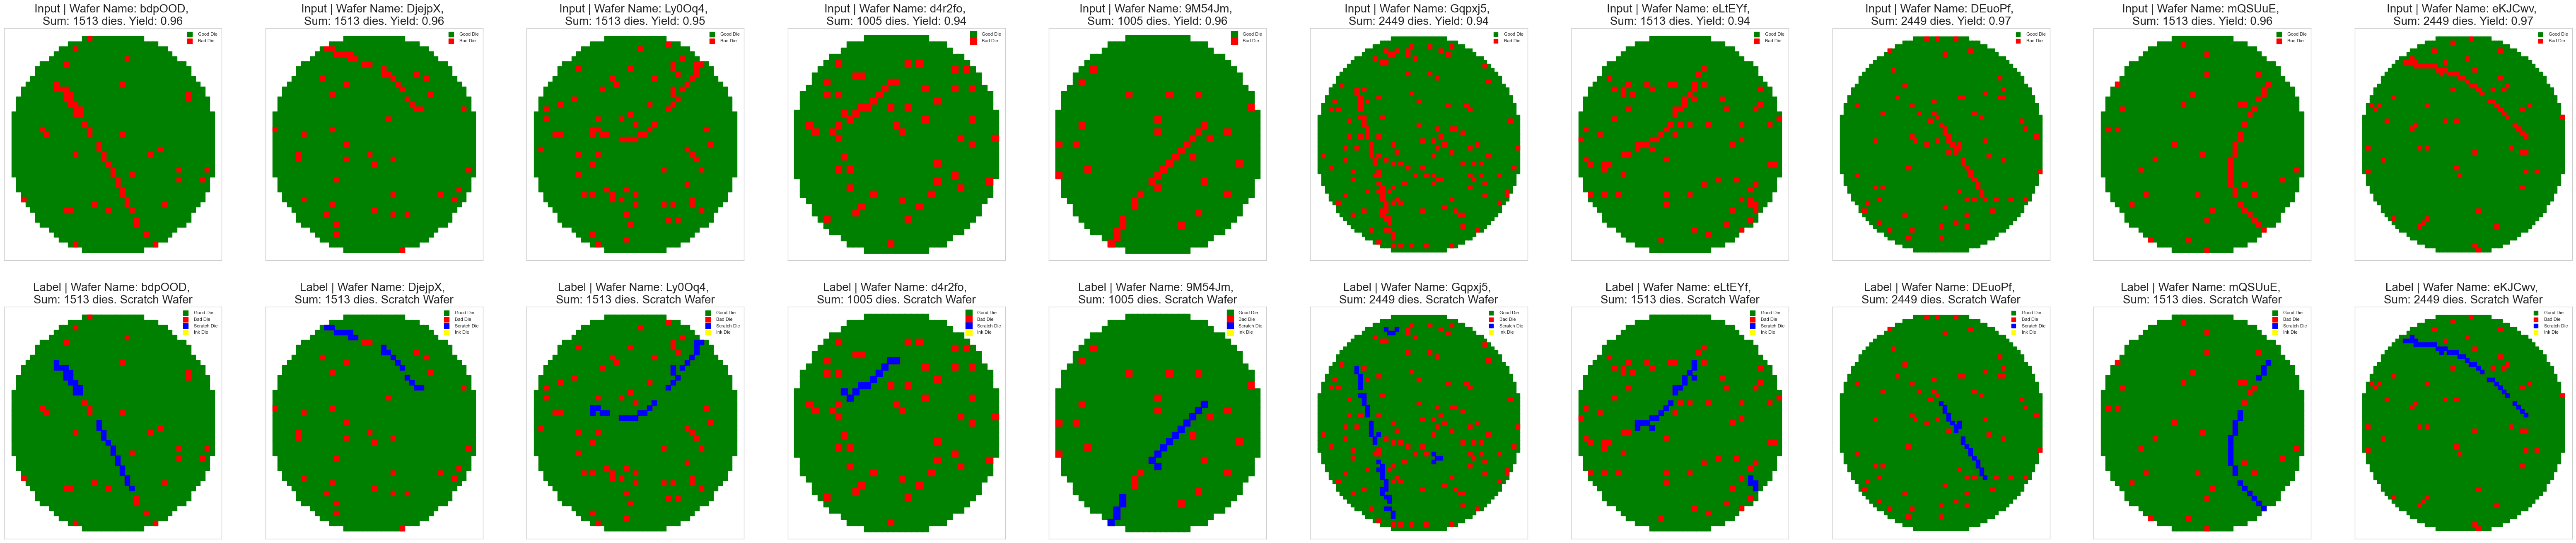

In [ ]:
# plot 10 wafers from the test set 
df_wafers_sam = df_predictions_test[df_predictions_test['WaferName'].isin(predicted_level_wafers(df_predictions_test))]
list_sample_test = [df_wafers_sam.groupby('WaferName').get_group(group) for group in df_wafers_sam['WaferName'].value_counts().sample(10).index]
plot_wafer_maps_test(list_sample_test, figsize = 8, labels = True)


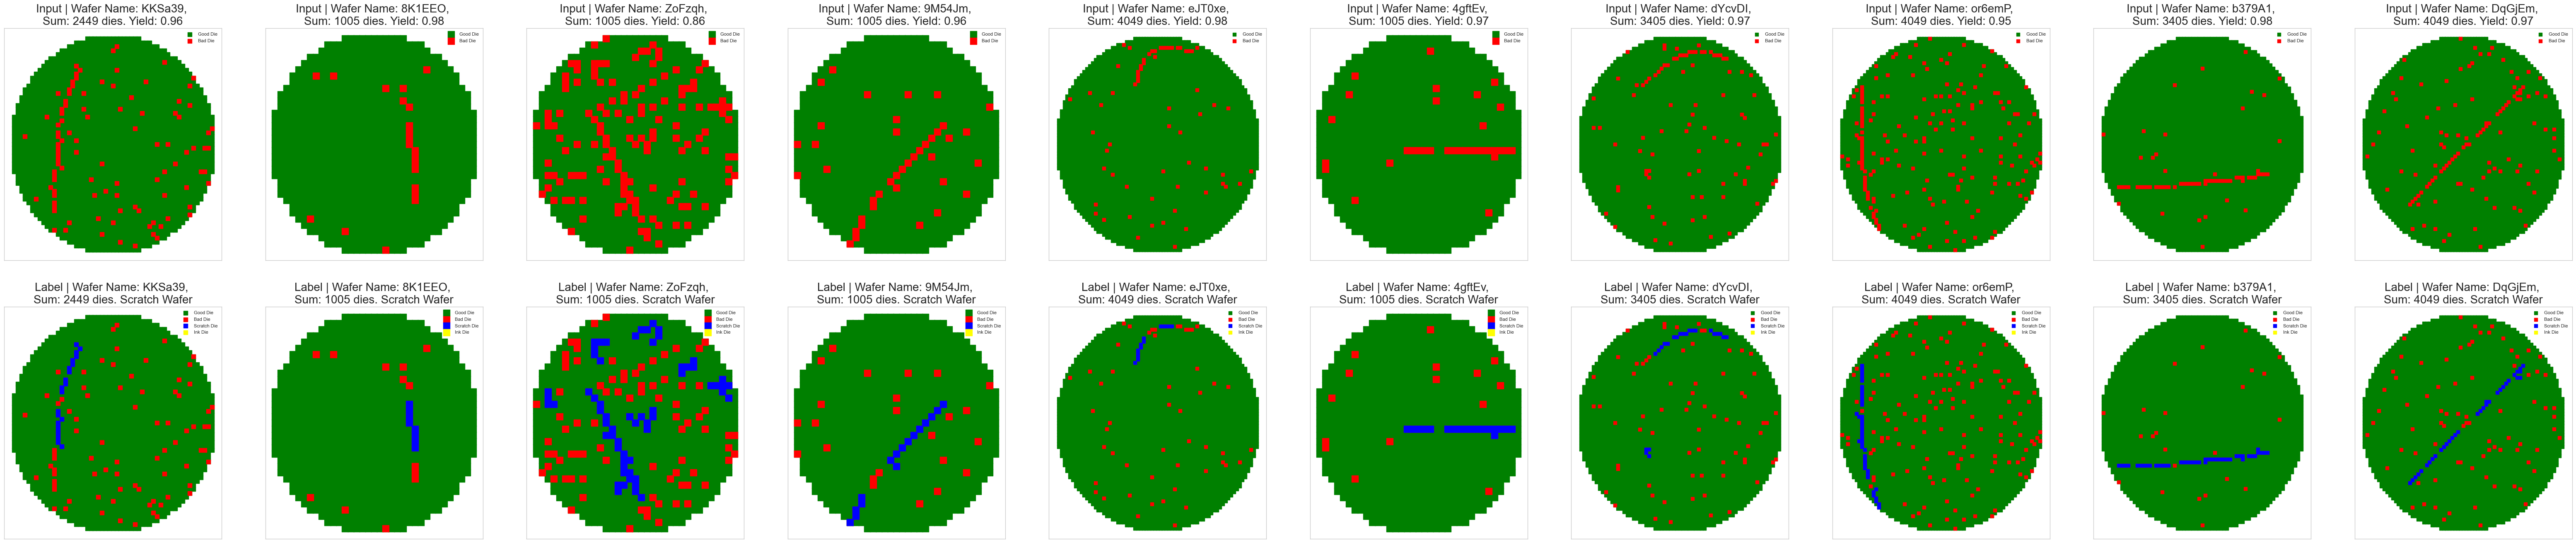

In [ ]:
# plot 10 wafers from the test set 
df_wafers_sam = df_predictions_test[df_predictions_test['WaferName'].isin(predicted_level_wafers(df_predictions_test))]
list_sample_test = [df_wafers_sam.groupby('WaferName').get_group(group) for group in df_wafers_sam['WaferName'].value_counts().sample(10).index]
plot_wafer_maps_test(list_sample_test, figsize = 8, labels = True)


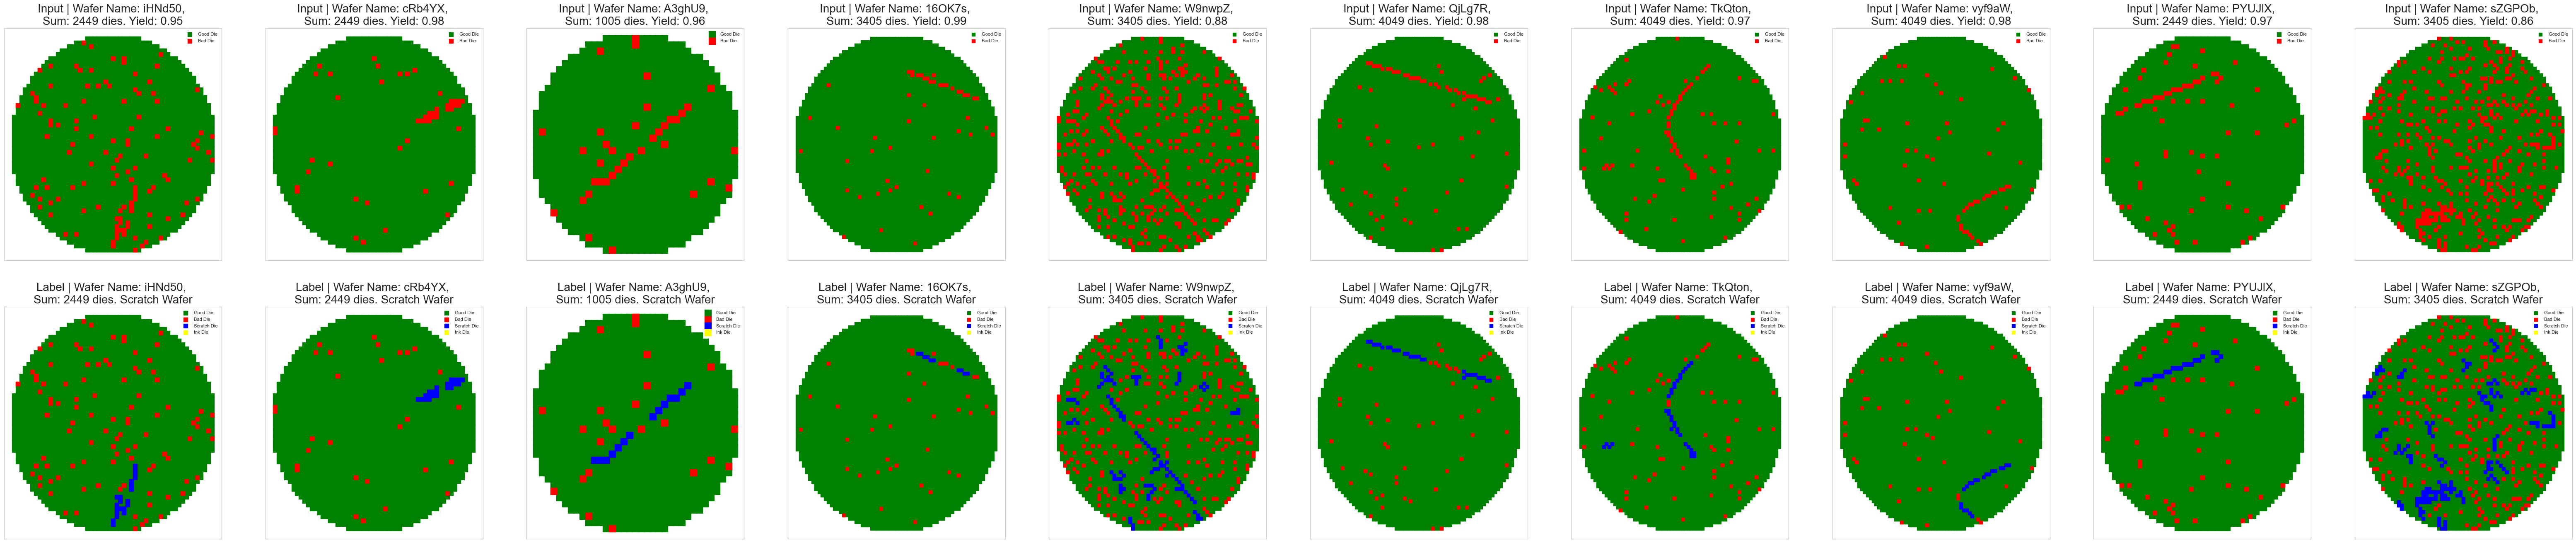

In [ ]:
# plot 10 wafers from the test set 
df_wafers_sam = df_predictions_test[df_predictions_test['WaferName'].isin(predicted_level_wafers(df_predictions_test))]
list_sample_test = [df_wafers_sam.groupby('WaferName').get_group(group) for group in df_wafers_sam['WaferName'].value_counts().sample(10).index]
plot_wafer_maps_test(list_sample_test, figsize = 8, labels = True)


In [97]:
# lets check that for all wafer with low yeild there are no scratches
df_predictions_test[df_predictions_test['WaferName'].isin(low_yield_wafers)]['IsScratchDie_Predicted'].value_counts()

IsScratchDie_Predicted
False    86795
Name: count, dtype: int64

# Comaparing the results on the test set 

In [71]:
# load the test set again and perform the feature generation
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
# now we can apply this function to the train and test set
test_sizes = df_wafers_test.groupby('WaferName').size().apply(label_wafer_size)

# and add the labels to the original dataframes
df_wafers_test['WaferType'] = df_wafers_test['WaferName'].map(test_sizes)
df_wafers_test = pd.get_dummies(df_wafers_test, columns=['WaferType'], prefix=['WaferType'])
df_wafers_test = count_adjacent_bad_dies(df_wafers_test)

# predict on the test set using the xgboost model
df_wafers_test['IsScratchDie_Predicted'] = best_xgb.predict(df_wafers_test.drop(columns=['WaferName']))

# go over df_wafers_test and for every wafer that has a yeild rate bellow 0.8 cahge all predictions to false 
# Calculate yield rate for each wafer
yield_rates = df_wafers_test.groupby('WaferName')['IsGoodDie'].mean()

# Get list of low yield wafers (yield < 0.8)
low_yield_wafers = yield_rates[yield_rates < 0.8].index

# Set IsScratchDie_Predicted to False for all dies in low yield wafers
df_wafers_test.loc[df_wafers_test['WaferName'].isin(low_yield_wafers), 'IsScratchDie_Predicted'] = False

print(f"Modified predictions for {len(low_yield_wafers)} wafers with yield rate below 0.8")

# Verify no scratches are predicted in low yield wafers
verification = df_wafers_test[df_wafers_test['WaferName'].isin(low_yield_wafers)]['IsScratchDie_Predicted'].sum()
print(f"Number of scratches predicted in low yield wafers: {verification} (should be 0)")

Processing wafer: 06svz3
Processing wafer: 0PCkQf
Processing wafer: 0fDCmN
Processing wafer: 0jmA2q
Processing wafer: 0o5c0L
Processing wafer: 0qgt3q
Processing wafer: 16OK7s
Processing wafer: 16sCcR
Processing wafer: 1AXz5R
Processing wafer: 1BDZNP
Processing wafer: 1EhccD
Processing wafer: 1JTz8t
Processing wafer: 1KPqfJ
Processing wafer: 1KhWYe
Processing wafer: 1KrD6F
Processing wafer: 1LDga4
Processing wafer: 1c84J1
Processing wafer: 1ceVie
Processing wafer: 1g2TIM
Processing wafer: 22gX1d
Processing wafer: 2A8THI
Processing wafer: 2JpLgv
Processing wafer: 2LXVf2
Processing wafer: 2ZTxuS
Processing wafer: 2sNGME
Processing wafer: 2zVJCj
Processing wafer: 31CJAL
Processing wafer: 33Fw03
Processing wafer: 3Ry4pL
Processing wafer: 3XmG5o
Processing wafer: 43wjEZ
Processing wafer: 44xbDs
Processing wafer: 4VaKyd
Processing wafer: 4gftEv
Processing wafer: 4ssHWU
Processing wafer: 4yJA3c
Processing wafer: 50cVJB
Processing wafer: 53gxaq
Processing wafer: 5ISkdX
Processing wafer: 5LJb0H


C:\Users\Alon\AppData\Local\Temp\ipykernel_28504\3643119361.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_wafers_test.loc[df_wafers_test['WaferName'].isin(low_yield_wafers), 'IsScratchDie_Predicted'] = False


In [72]:
# chaeck how many df_wafers_test_preds and df_predictions_test['IsScratchDie_Predicted'] the same
(df_wafers_test['IsScratchDie_Predicted'] == df_predictions_test['IsScratchDie_Predicted']).value_counts()

IsScratchDie_Predicted
True     1112701
False      15634
Name: count, dtype: int64

In [98]:
def rank_wafers_by_prediction_agreement(df_wafers_test, df_predictions_test):
    """
    Ranks wafers based on true prediction agreement between two models.
    
    Parameters:
    df_wafers_test: DataFrame containing predictions from first model
    df_predictions_test: DataFrame containing predictions from second model
    
    Returns:
    DataFrame with wafer agreement statistics, sorted by shared true predictions
    """
    
    agreement_stats = []
    
    # Iterate through each unique wafer
    for wafer_name in df_wafers_test['WaferName'].unique():
        # Get predictions for current wafer from both models
        wafer_pred1 = df_wafers_test[df_wafers_test['WaferName'] == wafer_name]['IsScratchDie_Predicted']
        wafer_pred2 = df_predictions_test[df_predictions_test['WaferName'] == wafer_name]['IsScratchDie_Predicted']
        
        # Ensure we're comparing the same dies (match indices)
        combined = pd.DataFrame({
            'pred1': wafer_pred1.reset_index(drop=True),
            'pred2': wafer_pred2.reset_index(drop=True)
        })
        
        # Calculate total dies
        total_dies = len(combined)
        
        # Calculate true predictions (scratched) by each model
        scratched_pred1 = combined['pred1'].sum()
        scratched_pred2 = combined['pred2'].sum()
        
        # Calculate shared true predictions (both models predicted the die as scratched)
        shared_true_predictions = ((combined['pred1'] == True) & (combined['pred2'] == True)).sum()
        
        # Calculate maximum possible shared predictions
        max_possible_shared = min(scratched_pred1, scratched_pred2)
        
        # Calculate agreement percentage (relative to the maximum possible shared predictions)
        # Avoiding division by zero
        if max_possible_shared > 0:
            agreement_percentage = (shared_true_predictions / max_possible_shared) * 100
        else:
            agreement_percentage = 0 if scratched_pred1 + scratched_pred2 > 0 else 100
        
        agreement_stats.append({
            'WaferName': wafer_name,
            'Total_Dies': total_dies,
            'Scratched_XGBoost': scratched_pred1,
            'Scratched_Connected_components': scratched_pred2,
            'Shared_True_Predictions': shared_true_predictions,
            'Max_Possible_Shared': max_possible_shared,
            'Agreement_Percentage': agreement_percentage,
            'Difference_in_Scratched': abs(scratched_pred1 - scratched_pred2)
        })
    
    # Convert to DataFrame and sort by shared true predictions (descending)
    agreement_df = pd.DataFrame(agreement_stats)
    agreement_df = agreement_df.sort_values('Shared_True_Predictions', ascending=False)
    agreement_df = agreement_df.reset_index(drop=True)
    
    # Add rank column
    agreement_df['Rank'] = agreement_df.index + 1
    
    # Reorder columns to put rank first
    cols = ['Rank'] + [col for col in agreement_df.columns if col != 'Rank']
    agreement_df = agreement_df[cols]
    
    return agreement_df

# Use the function
wafer_rankings = rank_wafers_by_prediction_agreement(df_wafers_test, df_predictions_test)

# Display summary statistics
print("\nSummary of model agreement:")
print(f"Average shared true predictions across all wafers: {wafer_rankings['Shared_True_Predictions'].mean():.2f}")
print(f"Highest shared true predictions: {wafer_rankings['Shared_True_Predictions'].max()}")
print(f"Lowest shared true predictions: {wafer_rankings['Shared_True_Predictions'].min()}")

# # Display top 10 and bottom 10 wafers
# print("\nTop 10 wafers with highest agreement:")
# print(wafer_rankings.head(10))
# print("\nBottom 10 wafers with lowest agreement:")
# print(wafer_rankings.tail(10))


Summary of model agreement:
Average shared true predictions across all wafers: 29.38
Highest shared true predictions: 232
Lowest shared true predictions: 0


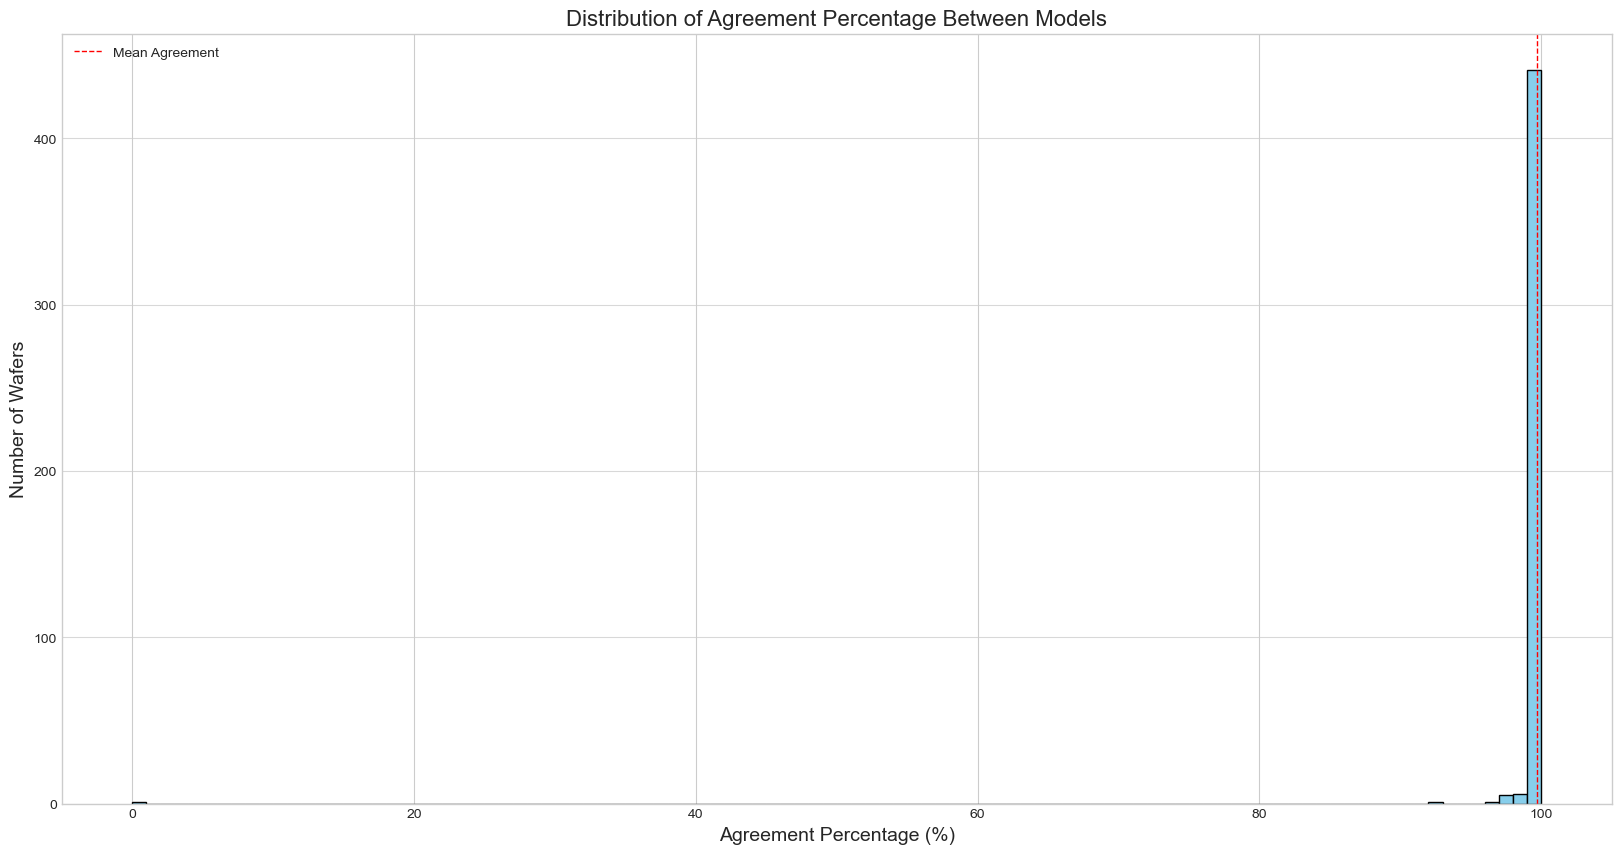

In [80]:
# plot a histogram of agreement percentage

plt.figure(figsize=(20, 10))
plt.hist(wafer_rankings['Agreement_Percentage'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Agreement Percentage Between Models', fontsize=16)
plt.xlabel('Agreement Percentage (%)', fontsize=14)
plt.ylabel('Number of Wafers', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.axvline(wafer_rankings['Agreement_Percentage'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Agreement')
plt.legend()
plt.show()


Wafers with Highest Shared True Predictions:


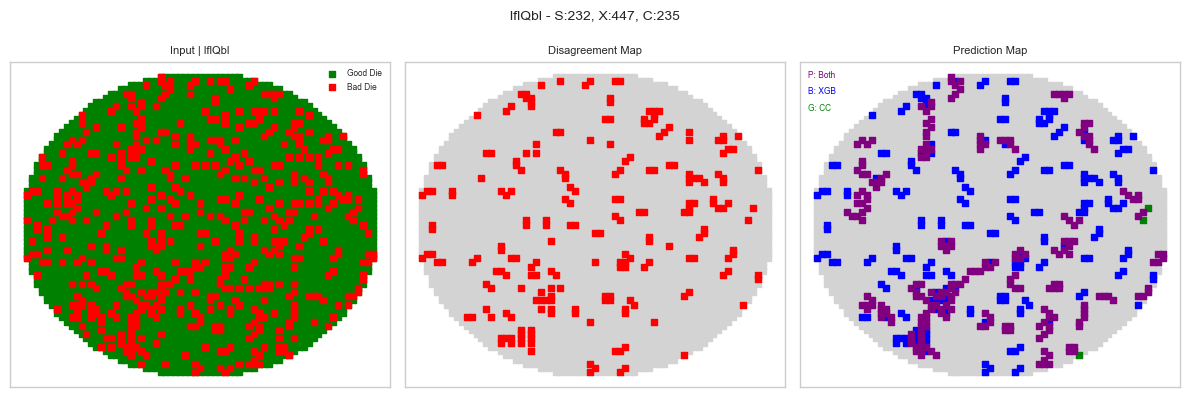

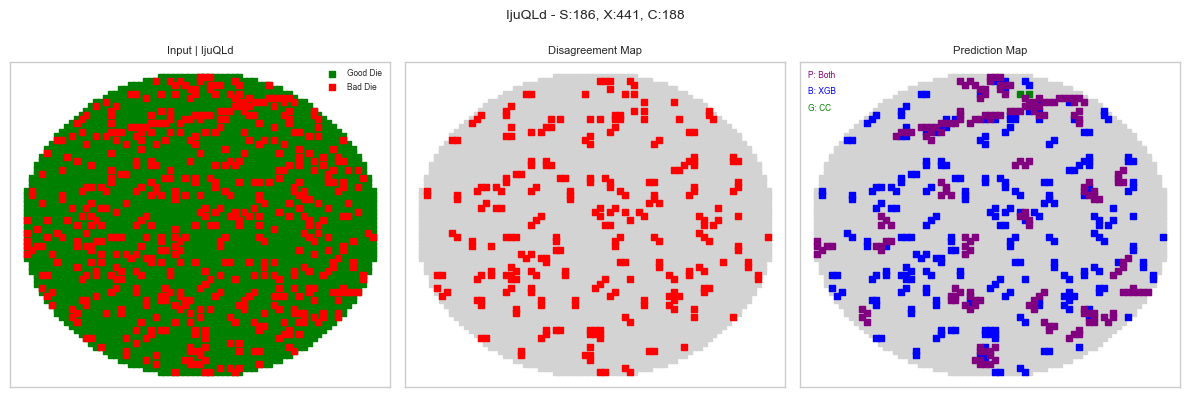

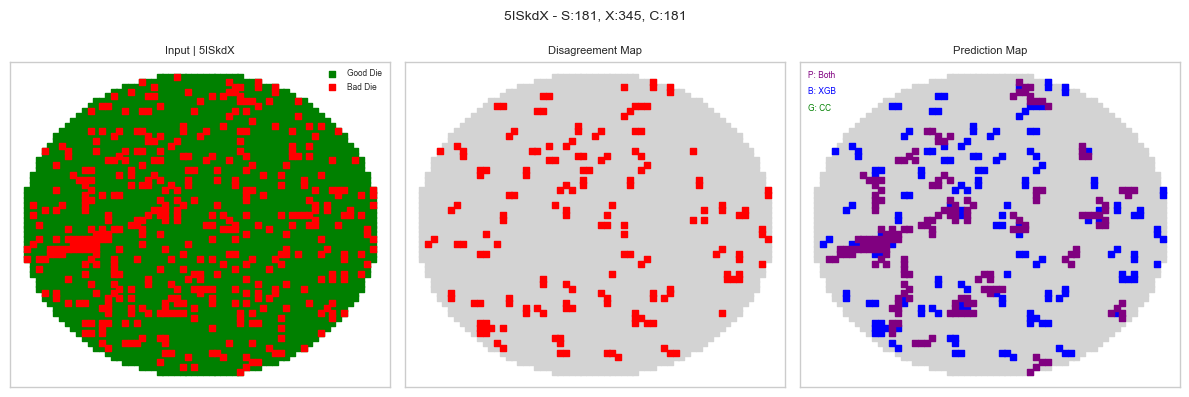

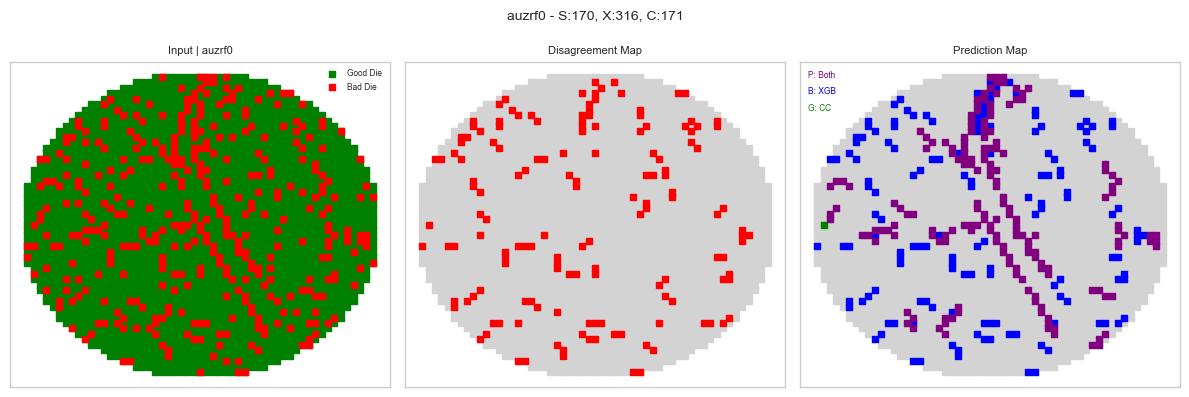

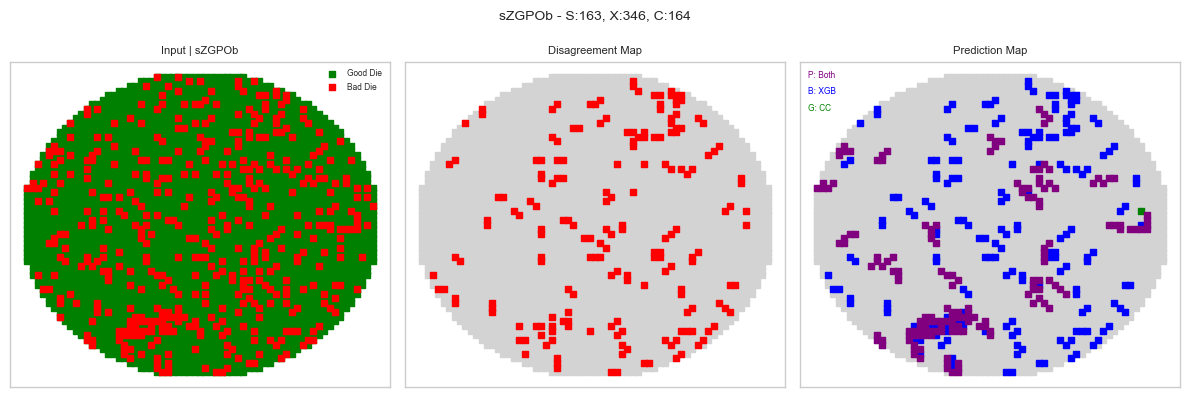

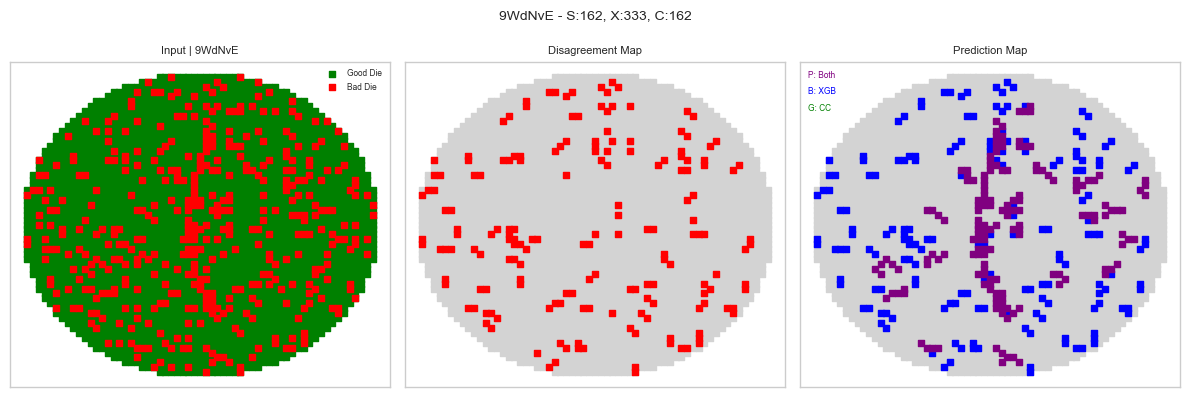

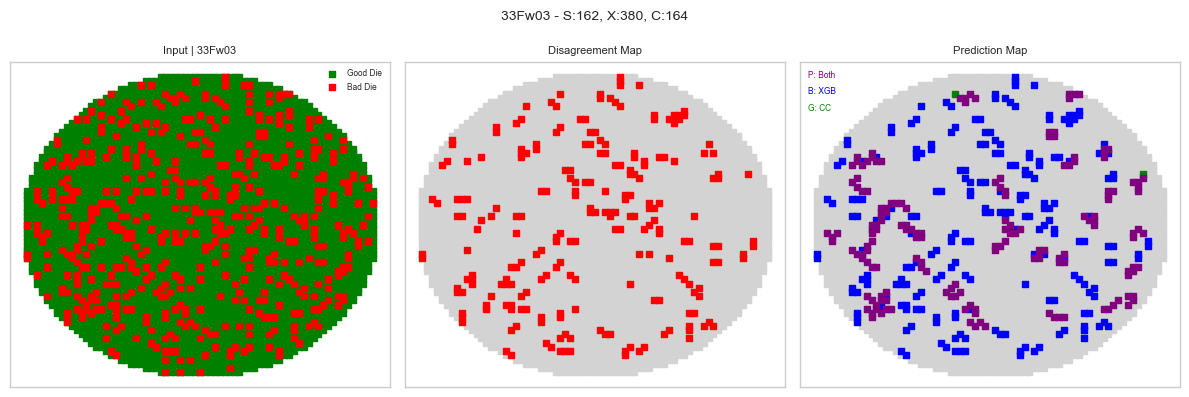

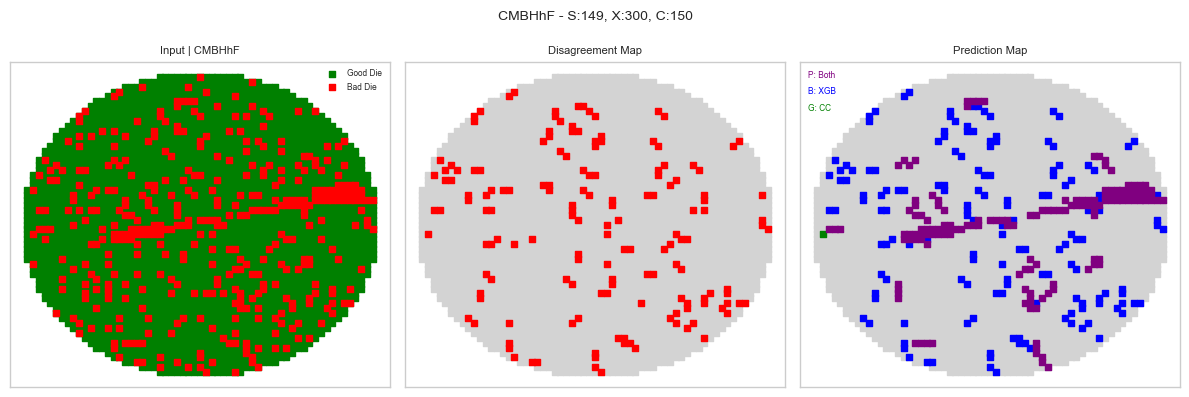

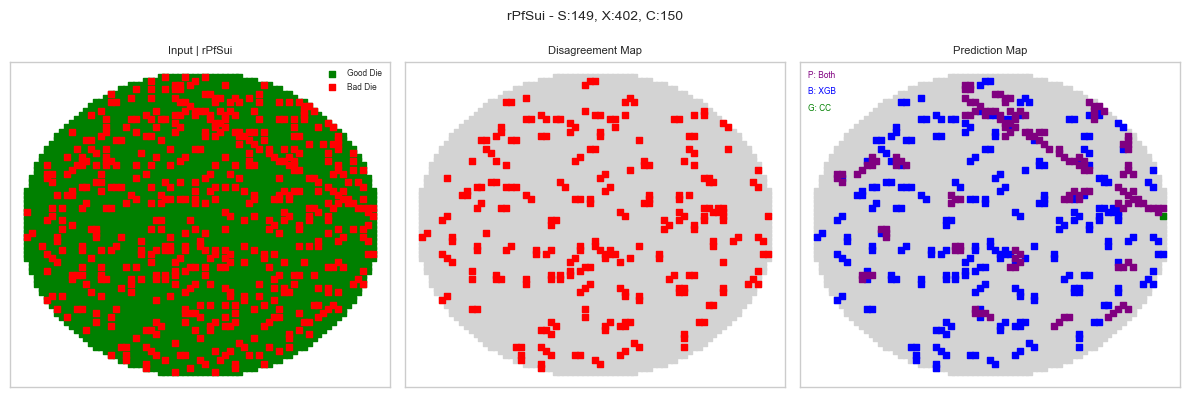

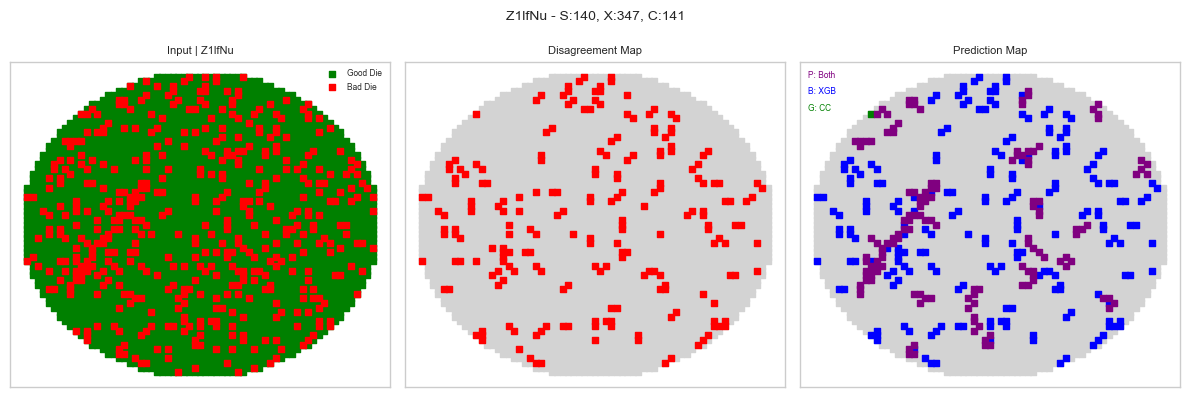


Wafers with Lowest Shared True Predictions:


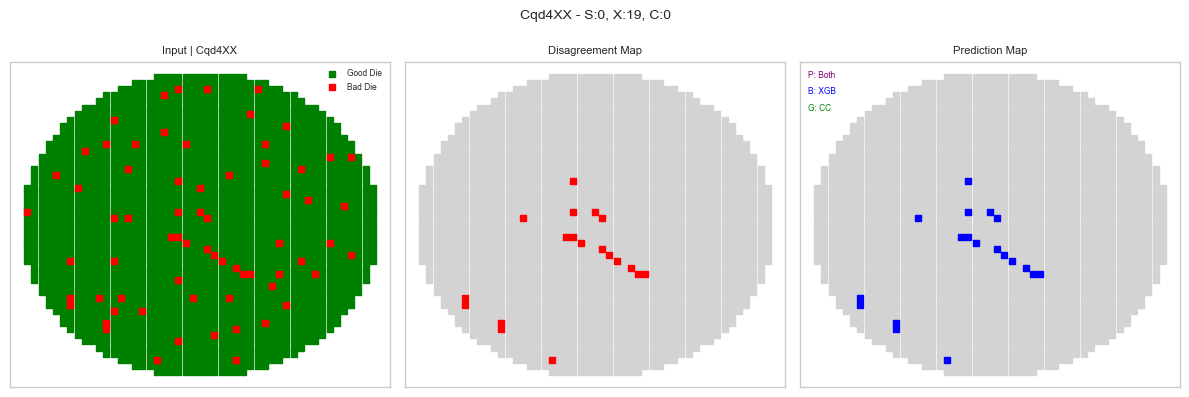

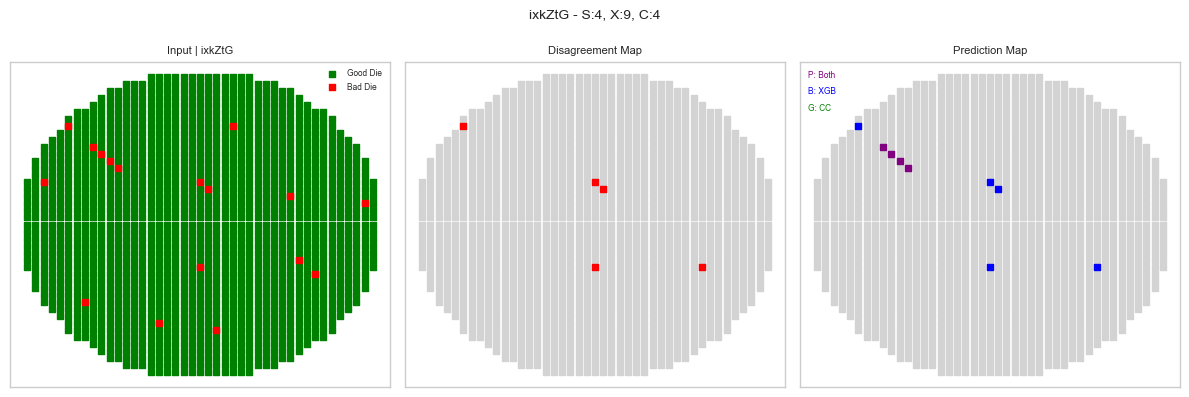

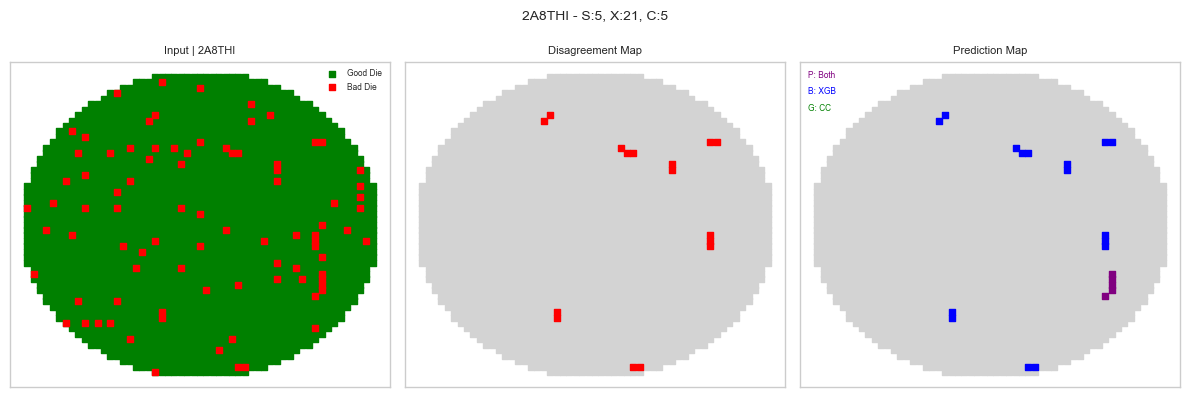

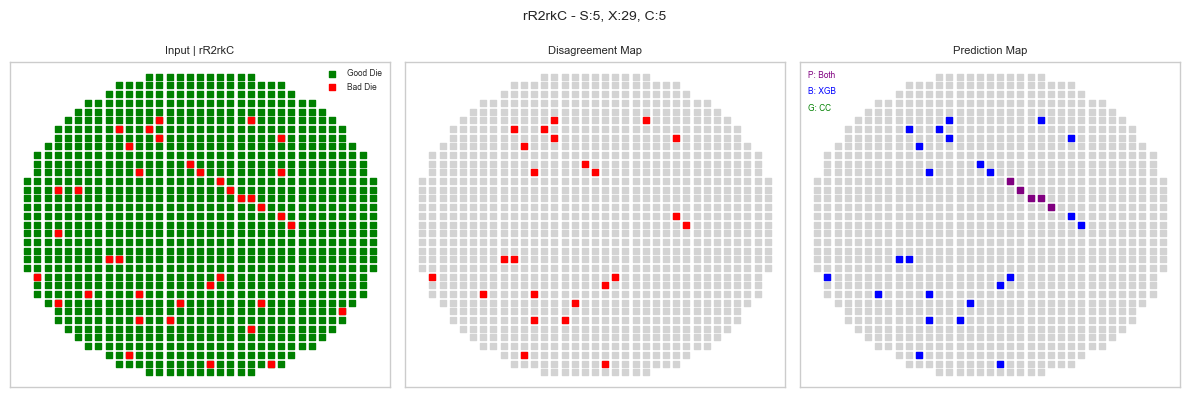

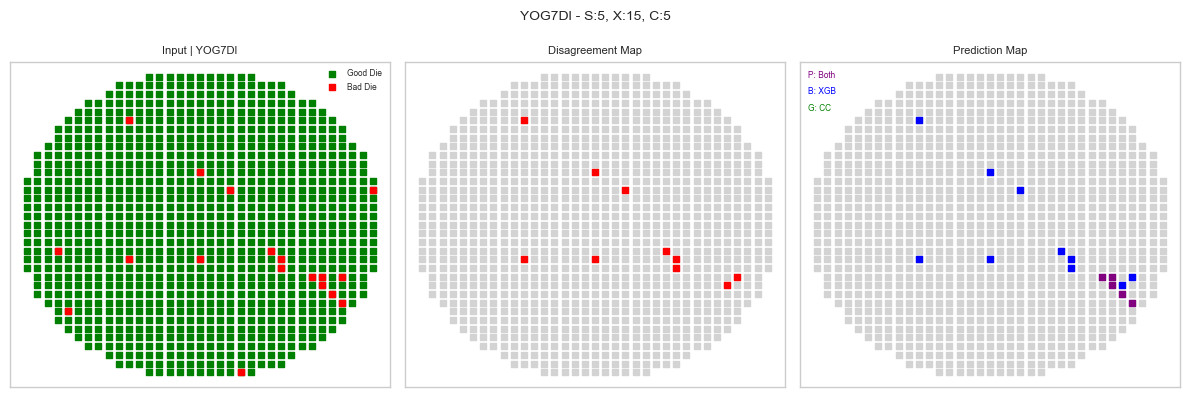

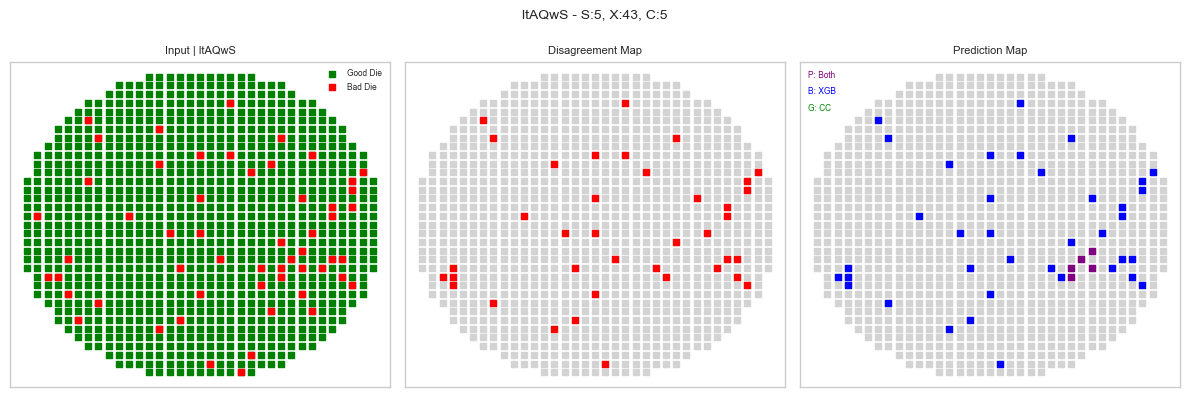

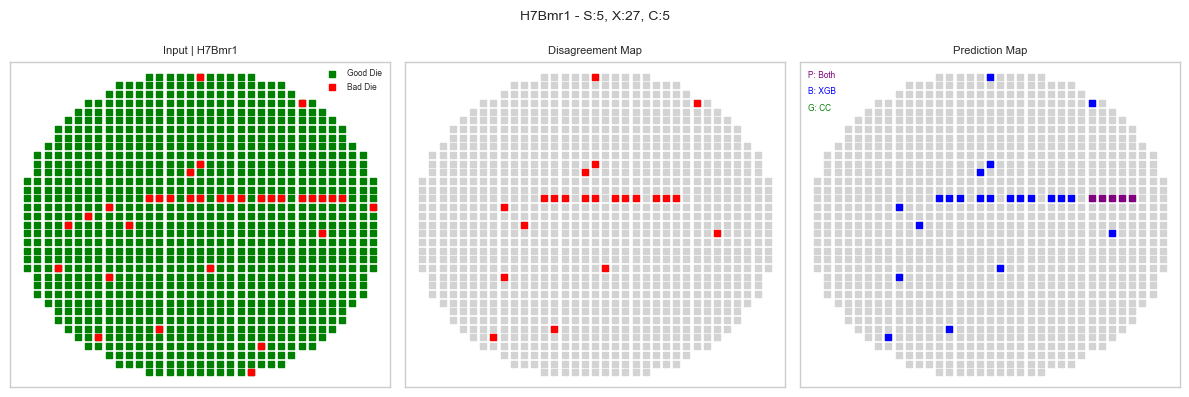

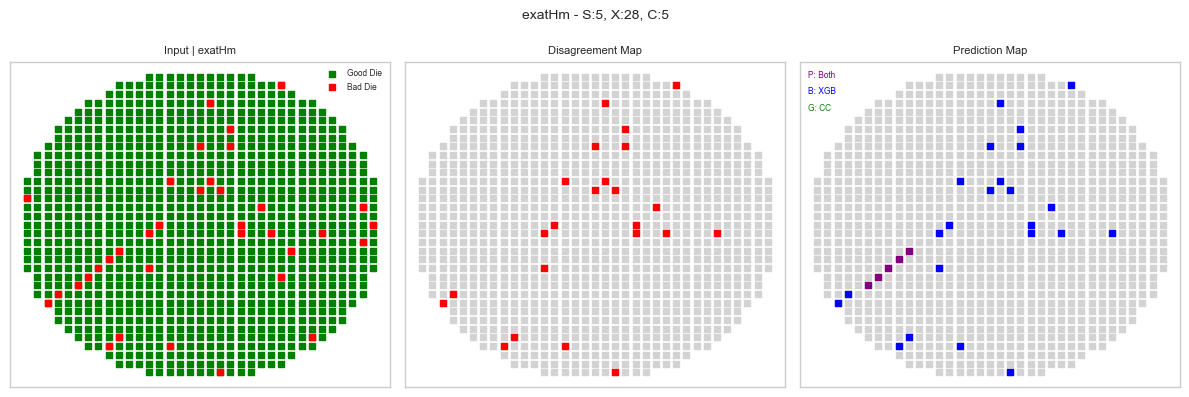

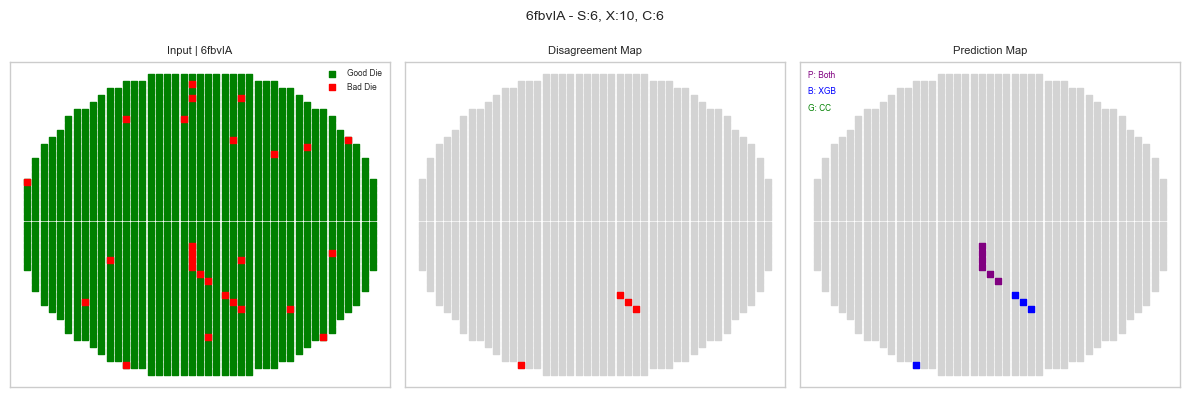

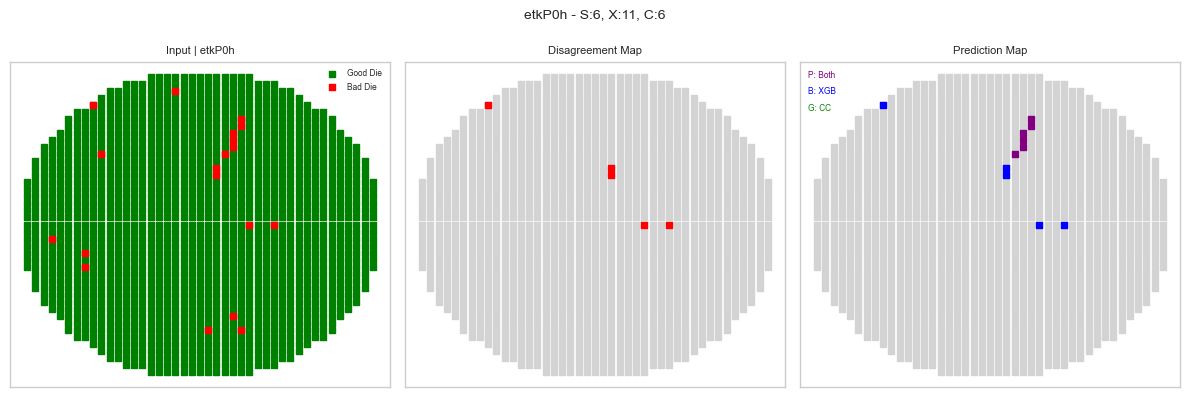

In [99]:
def plot_agreement_comparison_both_models(df_wafers_test, df_predictions_test, num_samples=50, figsize=4):
    """
    Plot wafers with highest and lowest shared true predictions between two models.
    Shows only three plots: input map, disagreement map, and prediction comparison.
    Ensures wafers with lowest agreement have at least one model predicting a scratched die.
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        """Helper function to plot a single wafer map"""
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)  # Adjust size based on wafer
        s = min(s, 20)  # Cap maximum size to keep plots small
        
        if map_type == 'Input':
            mes = f'Yield: {round((wafer_df["IsGoodDie"]).sum()/(wafer_df["IsGoodDie"]).count(), 2)}'
            ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color='green', marker='s', s=s)
            bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
            ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color='red', marker='s', s=s)
            ax.legend(['Good Die', 'Bad Die'], fontsize=6)
        
        ax.set_title(f'{map_type} | {wafer_df["WaferName"].iloc[0]}', fontsize=8)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

    # Calculate shared true predictions for each wafer
    wafer_data = []
    for wafer_name in df_wafers_test['WaferName'].unique():
        wafer_df_1 = df_wafers_test[df_wafers_test['WaferName'] == wafer_name]
        wafer_df_2 = df_predictions_test[df_predictions_test['WaferName'] == wafer_name]
        
        # Calculate scratch predictions by each model
        xgboost_scratches = wafer_df_1['IsScratchDie_Predicted'].sum()
        cc_scratches = wafer_df_2['IsScratchDie_Predicted'].sum()
        
        # Calculate shared true predictions (both models predict die as scratched)
        shared_true = ((wafer_df_1['IsScratchDie_Predicted'] == True) & 
                       (wafer_df_2['IsScratchDie_Predicted'] == True)).sum()
        
        wafer_data.append({
            'WaferName': wafer_name,
            'Shared_True_Predictions': shared_true,
            'XGBoost_Scratches': xgboost_scratches,
            'CC_Scratches': cc_scratches,
            'Has_Any_Scratches': xgboost_scratches > 0 or cc_scratches > 0
        })
    
    # Create DataFrame with shared predictions and sort
    shared_df = pd.DataFrame(wafer_data)
    
    # For highest shared predictions
    high_shared_df = shared_df.sort_values('Shared_True_Predictions', ascending=False)
    high_shared_wafers = high_shared_df.head(num_samples)['WaferName'].tolist()
    
    # For lowest shared predictions - filter to only include wafers where at least one model found scratched dies
    low_shared_df = shared_df[shared_df['Has_Any_Scratches'] == True].sort_values('Shared_True_Predictions')
    low_shared_wafers = low_shared_df.head(num_samples)['WaferName'].tolist()
    
    # Process each group of wafers
    for title, wafer_list, df_subset in [("Highest Shared True Predictions", high_shared_wafers, high_shared_df), 
                                       ("Lowest Shared True Predictions", low_shared_wafers, low_shared_df)]:
        print(f"\nWafers with {title}:")
        
        for wafer_name in wafer_list:
            # Create figure with subplots - just 3 plots in a row
            fig, axes = plt.subplots(1, 3, figsize=(figsize*3, figsize))
            
            # Get data for both models
            wafer_df_1 = df_wafers_test[df_wafers_test['WaferName'] == wafer_name].copy()
            wafer_df_2 = df_predictions_test[df_predictions_test['WaferName'] == wafer_name].copy()
            
            # Plot input map
            plot_wafer_map(wafer_df_1, axes[0], 'Input')
            
            # Plot difference map (disagreement)
            difference = wafer_df_1['IsScratchDie_Predicted'] != wafer_df_2['IsScratchDie_Predicted']
            disagreement_df = wafer_df_1[difference].copy()
            axes[1].scatter(wafer_df_1['DieX'], wafer_df_1['DieY'], color='lightgray', marker='s', s=15)
            axes[1].scatter(disagreement_df['DieX'], disagreement_df['DieY'], color='red', marker='s', s=15)
            axes[1].set_title('Disagreement Map', fontsize=8)
            axes[1].axes.get_xaxis().set_visible(False)
            axes[1].axes.get_yaxis().set_visible(False)
            
            # Plot shared true predictions map
            shared_true = (wafer_df_1['IsScratchDie_Predicted'] == True) & (wafer_df_2['IsScratchDie_Predicted'] == True)
            shared_true_df = wafer_df_1[shared_true].copy()
            model1_only = (wafer_df_1['IsScratchDie_Predicted'] == True) & (wafer_df_2['IsScratchDie_Predicted'] == False)
            model2_only = (wafer_df_1['IsScratchDie_Predicted'] == False) & (wafer_df_2['IsScratchDie_Predicted'] == True)
            
            # Plot the base wafer in light gray
            axes[2].scatter(wafer_df_1['DieX'], wafer_df_1['DieY'], color='lightgray', marker='s', s=15)
            
            # Plot model-specific predictions
            model1_only_df = wafer_df_1[model1_only].copy()
            axes[2].scatter(model1_only_df['DieX'], model1_only_df['DieY'], color='blue', marker='s', s=15)
            
            model2_only_df = wafer_df_1[model2_only].copy()
            axes[2].scatter(model2_only_df['DieX'], model2_only_df['DieY'], color='green', marker='s', s=15)
            
            # Plot shared predictions
            axes[2].scatter(shared_true_df['DieX'], shared_true_df['DieY'], color='purple', marker='s', s=15)
            
            # Add mini-legend
            axes[2].set_title('Prediction Map', fontsize=8)
            axes[2].text(0.02, 0.95, 'P: Both', color='purple', transform=axes[2].transAxes, fontsize=6)
            axes[2].text(0.02, 0.90, 'B: XGB', color='blue', transform=axes[2].transAxes, fontsize=6)
            axes[2].text(0.02, 0.85, 'G: CC', color='green', transform=axes[2].transAxes, fontsize=6)
            axes[2].axes.get_xaxis().set_visible(False)
            axes[2].axes.get_yaxis().set_visible(False)
            
            # Get stats for this wafer
            wafer_stats = shared_df[shared_df['WaferName'] == wafer_name].iloc[0]
            shared_count = wafer_stats['Shared_True_Predictions']
            xgboost_count = wafer_stats['XGBoost_Scratches']
            cc_count = wafer_stats['CC_Scratches']
            
            plt.suptitle(f"{wafer_name} - S:{shared_count}, X:{xgboost_count}, C:{cc_count}", fontsize=10)
            plt.tight_layout()
            plt.subplots_adjust(top=0.85)  # Adjust to make room for suptitle
            plt.show()
            

# Call the function
plot_agreement_comparison_both_models(df_wafers_test, df_predictions_test, num_samples=10, figsize=4)

We can observe how each model predicts scratches. 

Both models show a relatively good understanding of what constitutes a scratch, but each has its limitations: 

the XGBoost model introduces a lot of noise, often misclassifying adjacent bad dies as part of a scratch, while the Connected Components model struggles with "skipped scratches"—patterns where gaps of up to two dies appear within an otherwise continuous scratch.

# Conclusions 
The final model is the connected components algorithm with a minimum size of 4 as the parameter, which yields the highest F1 score. However, there is a side effect of using a small threshold: it classifies small clusters of bad dies that are not necessarily scratches (imagine a plus sign). As you can see in the examples above, some clusters do not match the definition of a scratch, yet the presence of bad dies is something to consider and may reflect another type of manufacturing error.

The comparison between the XGBoost model and the connected components approach is not technically correct. The XGBoost model is a row-level model, with some wafer area features in the version that includes adjacent neighbors. It is split into train, test, and holdout sets. In contrast, the connected components approach is not split because it is not a machine learning method; it’s a classic computer science problem solved by creating a graph for each individual wafer.

Even though both solutions are valid in my opinion, there are some drawbacks to using the connected components algorithm. It is more compute-demanding and requires more resources. While it processes a wafer in 0.7 - 1.2 seconds, the time adds up when processing many wafers. This contrasts with the XGBoost model, which is much faster but less accurate.


# Additional thoughts

## Inking and add ons 
One limitation of the connected componenets approach is that it does not directly identify inked dies — good dies that are manually inked because they lie along the path of a scratch. This gap could be addressed by a complementary algorithm that searches for shortest paths between the edges of connected components (i.e., between groups of scratched dies).

The idea would be to first detect the edges of each connected component (scratched region) and then attempt to find plausible paths from edge to edge. These paths would represent the likely physical continuation of a scratch. The goal is to catch good dies that should be inked but currently go undetected.

This method would naturally involve a trade-off: it may increase false positives by incorrectly inking good dies, but it would reduce manual inking efforts — an important practical gain. Care must be taken to avoid over-inking, possibly by penalizing overly long or unnatural paths, or setting strict criteria for which paths are accepted.



## Metrics and the real world 
The balance between metrics like precision, recall, and F1-score directly reflects the business problem we are trying to solve. In this case, the trade-offs between different models define the optimal model not just statistically, but based on the actual cost of each classification error.

There is a high cost associated with a scratched die that goes undetected (false negative), as it could cause product failures or yield loss. On the other hand, misclassifying a good die as scratched (false positive) also has a significant cost, as it unnecessarily wastes valuable, functional dies.

Because of these opposing costs, I selected the F1-score as the primary evaluation metric — it balances precision and recall, providing a good measure of the model’s ability to minimize both types of critical errors. However, I still closely monitor precision and recall separately, because the final model choice must be tuned according to the specific business priorities:

If missing scratches is worse → favor higher recall.

If wasting good dies is worse → favor higher precision.

This framework ensures that the model selection is aligned with the real-world impact and not just based on abstract performance numbers.




## In the real world

Step 1: Wafer Map Input
The system receives a wafer map containing information about die locations, test results, and initial die statuses (pass/fail).

Step 2: Run Scratch Detection Model
The wafer map is processed by the scratch detection model, which identifies individual scratched dies based on spatial patterns, defect clustering, and yield information. An could additional algorithm simulates inking behavior by detecting extended scratch paths and potential inked dies.

Step 3: Generate Outputs
The outputs branch into several structured tables:

* Scratched Dies Table: List of dies identified as scratched or inked.

* Low Yield Wafers Table: Wafers flagged as having a global yield below a threshold (e.g., 80%).

* Summary Table: Wafer-level overview showing counts of good, bad, scratched, and inked dies, plus overall yield.



# Submission

In [ ]:
# The chosen  model is the one with min_size = 4 and we will use it to predict on the test set
avg_metrics_test, wafer_results_test, df_predictions_test, scratch_stats_test = analyze_all_wafers(df_wafers_test ,min_size= 4 )
df_wafers_test['IsScratchDie'] = df_predictions_test['IsScratchDie_Predicted']


#TODO Fill in your name and email
name = 'Alon Bar Koter'
email = 'alonbar321@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)

Starting analysis of 455 wafers with min_size=4
Skipping wafer: WpfSfc | Low yield rate: 0.29
Skipping wafer: RGKRdQ | Low yield rate: 0.64
Processed: 10/455 wafers | Elapsed: 0.66s | Avg time: 0.0664s per wafer
Skipping wafer: GAX02p | Low yield rate: 0.66
Processed: 20/455 wafers | Elapsed: 1.31s | Avg time: 0.0656s per wafer
Skipping wafer: cgiCXI | Low yield rate: 0.50
Skipping wafer: GxicUQ | Low yield rate: 0.63
Processed: 30/455 wafers | Elapsed: 1.93s | Avg time: 0.0645s per wafer
Skipping wafer: DBmOko | Low yield rate: 0.64
Processed: 40/455 wafers | Elapsed: 2.58s | Avg time: 0.0645s per wafer
Processed: 50/455 wafers | Elapsed: 3.27s | Avg time: 0.0653s per wafer
Skipping wafer: xGsI7M | Low yield rate: 0.65
Processed: 70/455 wafers | Elapsed: 4.60s | Avg time: 0.0657s per wafer
Skipping wafer: ehuVJC | Low yield rate: 0.65
Processed: 80/455 wafers | Elapsed: 5.26s | Avg time: 0.0657s per wafer
Skipping wafer: aDCCUu | Low yield rate: 0.65
Skipping wafer: 5NR3zw | Low yield